In [1]:
import os
os.chdir('..')

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data_preprocessing import datetime_processing, userinput_processing, holiday_processing

In [5]:
df_ct = pd.read_parquet('data/Sessions/caltech/').reset_index(drop=True)
df_jpl = pd.read_parquet('data/Sessions/jpl/').reset_index(drop=True)
df_of = pd.read_parquet('data/Sessions/office001/').reset_index(drop=True)
print(f"Caltech Shape: {df_ct.shape}\nJPL Shape: {df_jpl.shape}\nOffice Shape: {df_of.shape}")

Caltech Shape: (31125, 12)
JPL Shape: (33587, 12)
Office Shape: (1681, 12)


In [6]:
df_ct = userinput_processing(df_ct)
df_ct = datetime_processing(df_ct)
df_ct = holiday_processing(df_ct)

df_of = userinput_processing(df_of)
df_of = datetime_processing(df_of)
df_of = holiday_processing(df_of)



df_jpl = userinput_processing(df_jpl)
df_jpl = datetime_processing(df_jpl)
df_jpl = holiday_processing(df_jpl)


In [26]:
df_of = pd.read_parquet('data/Sessions/office001/').reset_index(drop=True)
df_of = datetime_processing(df_of)
df_of = userinput_processing(df_of)
df_of = holiday_processing(df_of)

tmp = df_of.copy()
tmp.set_index('connectionTime', inplace=True)
start_date = '2019-03-20'; end_date = '2021-09-14'
tmp = tmp.sort_index().loc[start_date:end_date,:]

space_cols = tmp.spaceID.unique()
space_cols = (list(space_cols.astype('str')))

y = pd.DataFrame(index=pd.date_range(start_date,end_date, inclusive='both', freq='h', tz=0),columns=space_cols)
y[space_cols] = 1
for i in range(len(tmp)):
    start_ = tmp.index[i]
    end_ = tmp.loc[start_,'disconnectTime'] 
    session_ = tmp.loc[start_,'sessionID']
    space_ = tmp.loc[start_,'spaceID']
    print(start_,'\t', end_,'\t', session_, '\t', space_)
    y.loc[start_:end_,space_] = 0

2019-03-25 16:24:42+00:00 	 2019-03-26 01:32:12+00:00 	 19_102_260_1633_2019-03-25 16:24:42.408146 	 02
2019-03-25 17:19:27+00:00 	 2019-03-26 00:38:50+00:00 	 19_102_260_1634_2019-03-25 17:19:26.896309 	 03
2019-03-25 21:27:32+00:00 	 2019-03-26 03:32:03+00:00 	 19_102_260_1640_2019-03-25 21:27:32.338192 	 08
2019-03-26 18:33:56+00:00 	 2019-03-27 00:45:33+00:00 	 19_102_260_1640_2019-03-26 18:33:56.204855 	 08
2019-03-27 18:28:01+00:00 	 2019-03-28 00:37:47+00:00 	 19_102_260_1640_2019-03-27 18:28:00.642220 	 08
2019-03-28 00:32:33+00:00 	 2019-03-28 03:26:12+00:00 	 19_102_260_1635_2019-03-28 00:32:32.796410 	 01
2019-03-29 16:30:38+00:00 	 2019-03-29 20:03:10+00:00 	 19_102_260_1634_2019-03-29 16:30:37.914117 	 03
2019-03-29 18:26:24+00:00 	 2019-03-30 00:08:16+00:00 	 19_102_260_1636_2019-03-29 18:26:24.250355 	 06
2019-03-29 20:21:24+00:00 	 2019-03-30 03:12:29+00:00 	 19_102_260_1640_2019-03-29 20:21:24.158802 	 08
2019-03-29 20:49:21+00:00 	 2019-03-30 00:56:22+00:00 	 19_102_2

In [27]:
y

02  03  08  01  06  04  05  07
2019-03-20 00:00:00+00:00   1   1   1   1   1   1   1   1
2019-03-20 01:00:00+00:00   1   1   1   1   1   1   1   1
2019-03-20 02:00:00+00:00   1   1   1   1   1   1   1   1
2019-03-20 03:00:00+00:00   1   1   1   1   1   1   1   1
2019-03-20 04:00:00+00:00   1   1   1   1   1   1   1   1
...                        ..  ..  ..  ..  ..  ..  ..  ..
2021-09-13 20:00:00+00:00   1   1   1   1   1   1   1   1
2021-09-13 21:00:00+00:00   1   1   1   1   1   1   1   1
2021-09-13 22:00:00+00:00   1   1   1   1   1   1   1   1
2021-09-13 23:00:00+00:00   1   1   1   1   1   1   1   1
2021-09-14 00:00:00+00:00   1   1   1   1   1   1   1   1

[21817 rows x 8 columns]

_id                               sessionID  \
0  5bc9160af9af8b0dad3c0690   2_39_95_27_2018-05-01 13:23:18.374684   
1  5bc9160af9af8b0dad3c0691  2_39_79_380_2018-05-01 13:54:33.599590   
2  5bc9160af9af8b0dad3c0692  2_39_139_28_2018-05-01 14:46:04.441389   
3  5bc9160af9af8b0dad3c0693  2_39_79_378_2018-05-01 14:56:28.908623   
4  5bc9160af9af8b0dad3c0694   2_39_88_24_2018-05-01 15:14:50.443137   

     stationID spaceID  siteID  clusterID            connectionTime  \
0   2-39-95-27  CA-319       2         39 2018-05-01 13:23:18+00:00   
1  2-39-79-380  CA-489       2         39 2018-05-01 13:54:34+00:00   
2  2-39-139-28  CA-303       2         39 2018-05-01 14:46:04+00:00   
3  2-39-79-378  CA-326       2         39 2018-05-01 14:56:29+00:00   
4   2-39-88-24  CA-314       2         39 2018-05-01 15:14:50+00:00   

             disconnectTime  kWhDelivered          doneChargingTime  ...  \
0 2018-05-02 01:53:41+00:00        13.410 2018-05-01 17:17:07+00:00  ...   
1 2018-05-01 23:15:35+00:00         8.618 2018-05-01 15:35:39+00:00  ...   
2 2018-05-02 00:54:07+00:00        13.969 2018-05-01 23:57:02+00:00  ...   
3 2018-05-01 21:52:45+00:00         6.914 2018-05-01 16:07:56+00:00  ...   
4 2018-05-01 22:51:30+00:00        13.785 2018-05-01 20:18:12+00:00  ...   

  modifiedAt  paymentRequired  requestedDeparture  kWhRequested  \
0       None             None                None           NaN   
1       None             None                None           NaN   
2       None             None                None           NaN   
3       None             None                None           NaN   
4       None             None                None           NaN   

   connectionTimeHour connectionTimeDay disconnectTimeHour disconnectTimeDay  \
0                  13                 1                  1                 2   
1                  13                 1                 23                 1   
2                  14                 1                  0                 2   
3                  14                 1                 21                 1   
4                  15                 1                 22                 1   

   doneChargingTimeHour  doneChargingTimeDay  
0                  17.0                  1.0  
1                  15.0                  1.0  
2                  23.0                  1.0  
3                  16.0                  1.0  
4                  20.0                  1.0  

[5 rows x 25 columns]

In [35]:
df_ct[['stationID','spaceID']].value_counts()

stationID     spaceID 
2-39-139-28   CA-303      1792
2-39-131-30   CA-305      1399
2-39-129-17   CA-307      1136
2-39-81-4550  11900388    1126
2-39-89-25    CA-315      1086
2-39-125-21   CA-311      1042
2-39-127-19   CA-309      1022
2-39-138-29   CA-304       994
2-39-79-379   CA-327       932
2-39-123-23   CA-313       908
2-39-79-380   CA-489       892
2-39-78-365   CA-321       862
2-39-91-437   CA-317       846
2-39-79-377   CA-325       820
2-39-130-31   CA-306       789
2-39-78-366   CA-323       759
2-39-95-27    CA-319       737
2-39-88-24    CA-314       694
2-39-79-383   CA-492       683
2-39-124-22   CA-312       665
2-39-79-378   CA-326       645
2-39-78-363   CA-320       615
2-39-128-18   CA-308       612
2-39-79-381   CA-490       587
2-39-79-376   CA-324       581
2-39-78-360   CA-322       578
2-39-90-26    CA-316       567
2-39-126-20   CA-310       561
2-39-92-436   CA-318       558
2-39-78-367   CA-494       533
2-39-78-361   CA-493       529
2-39-79-382   CA

In [36]:
ct_ids = df_ct.stationID.unique()
#df_ct.groupby([df_ct['connectionTime'].dt.date]).stationID.value_counts().plot(kind="bar", figsize=(20,5))
#df_ct.groupby(df_ct.stationID).connectionTime.dt.date.value_counts()

In [30]:
ct_ids.shape

(55,)

In [37]:
uses = df_ct.groupby([df_ct['connectionTime'].dt.date], as_index=False).stationID.value_counts()

In [38]:
uses["stationID"].unique()
print(uses.head())

  connectionTime    stationID  count
0     2018-05-01  2-39-123-23      2
1     2018-05-01  2-39-125-21      2
2     2018-05-01   2-39-88-24      2
3     2018-05-01  2-39-89-439      1
4     2018-05-01  2-39-79-383      1


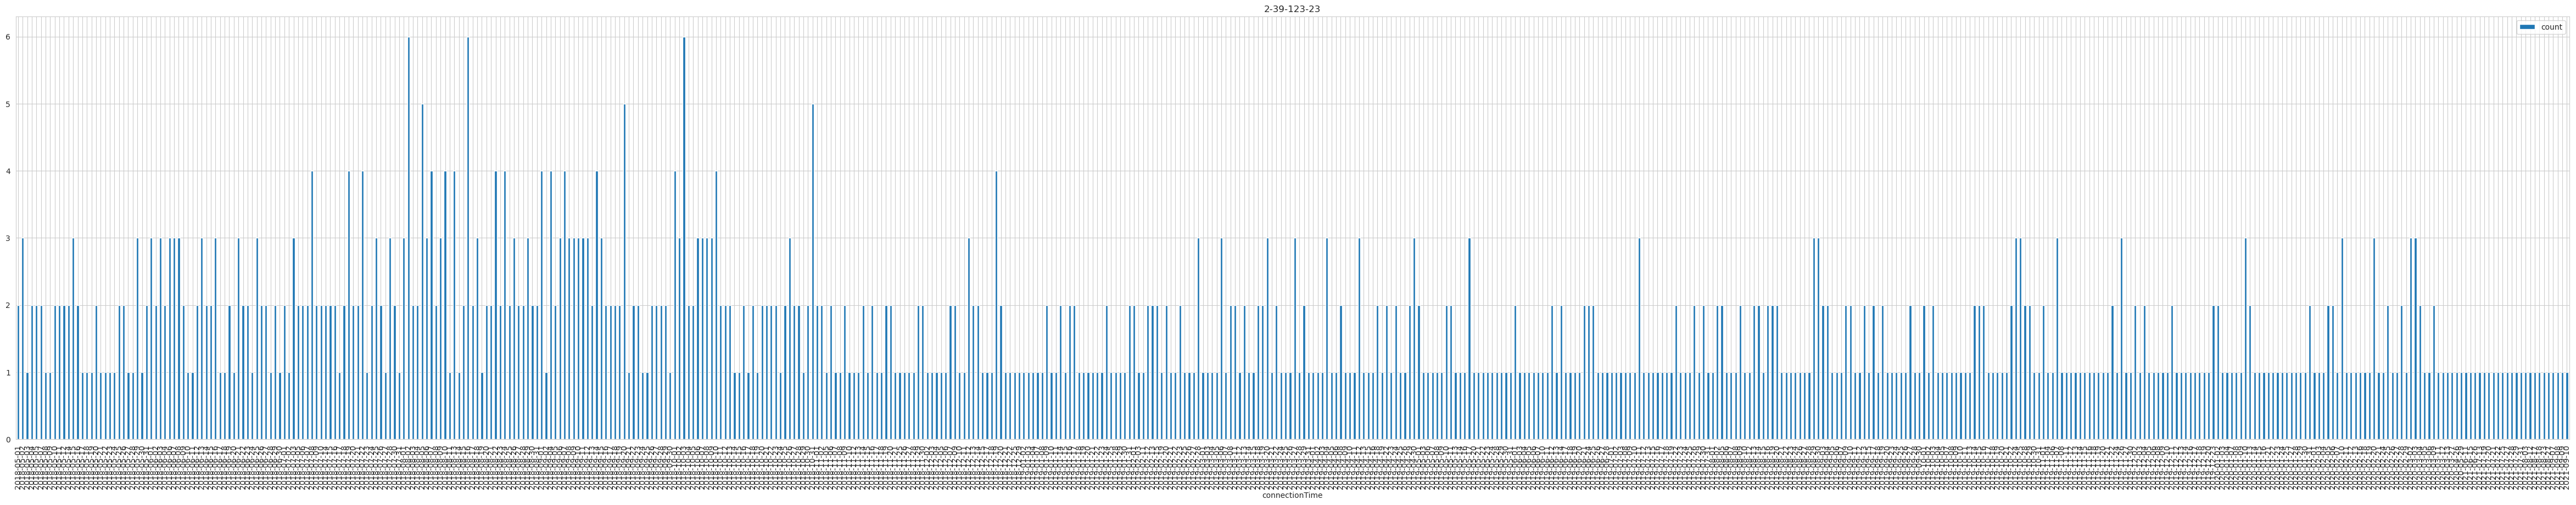

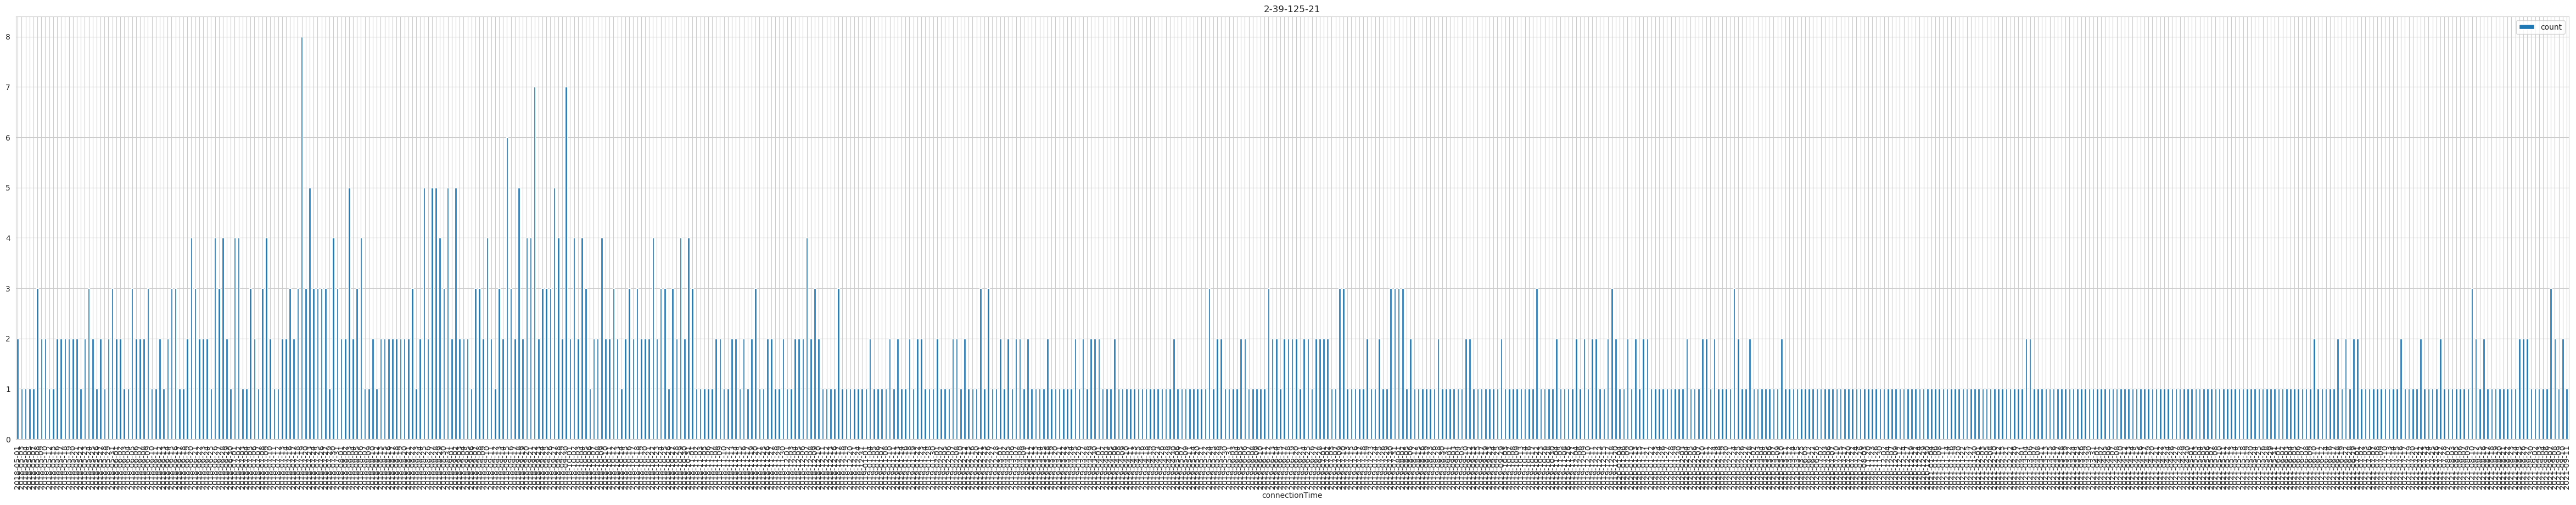

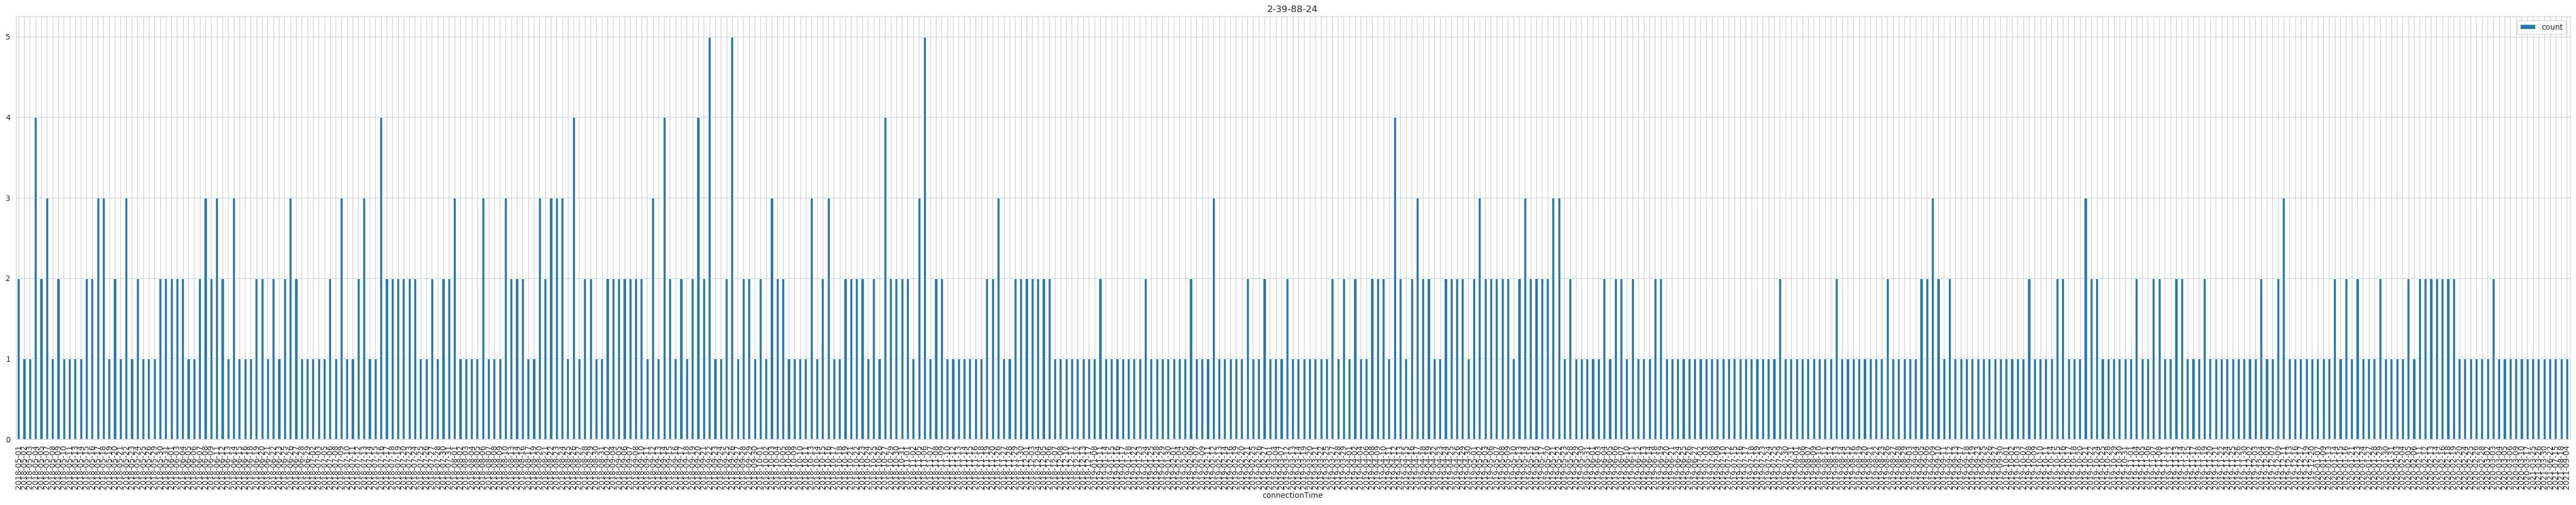

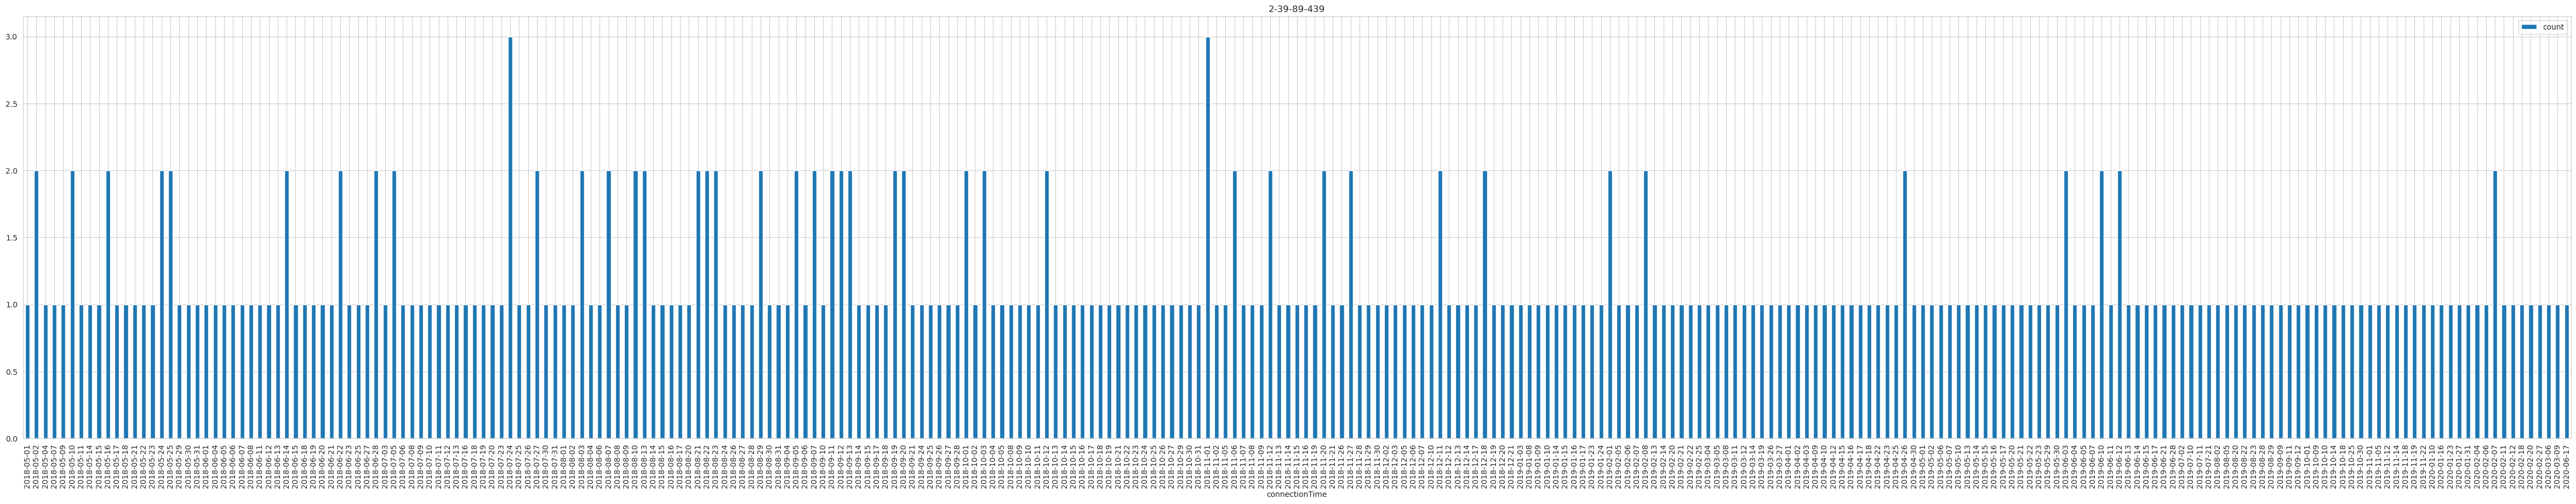

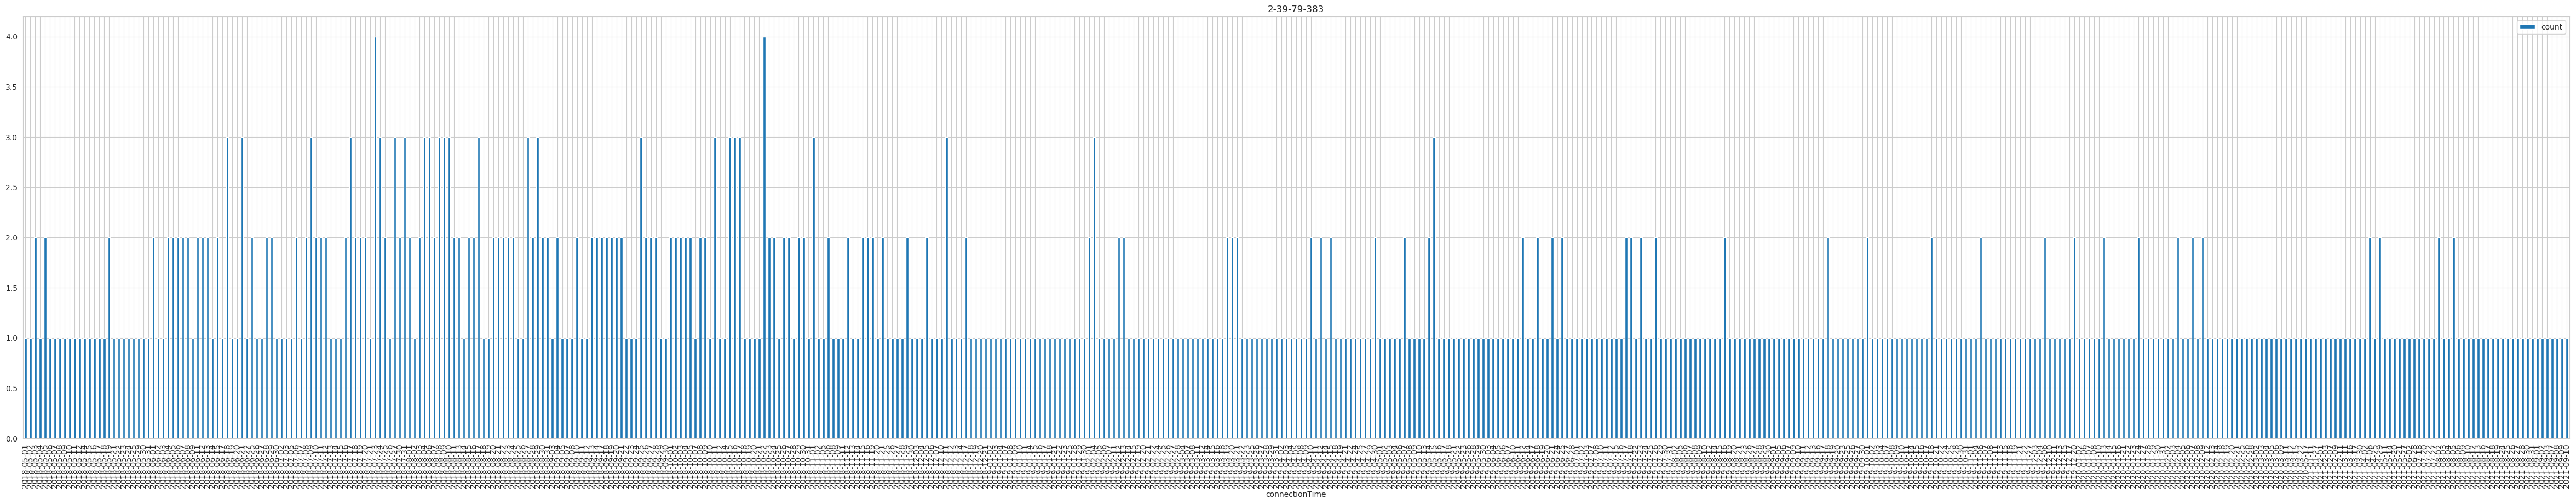

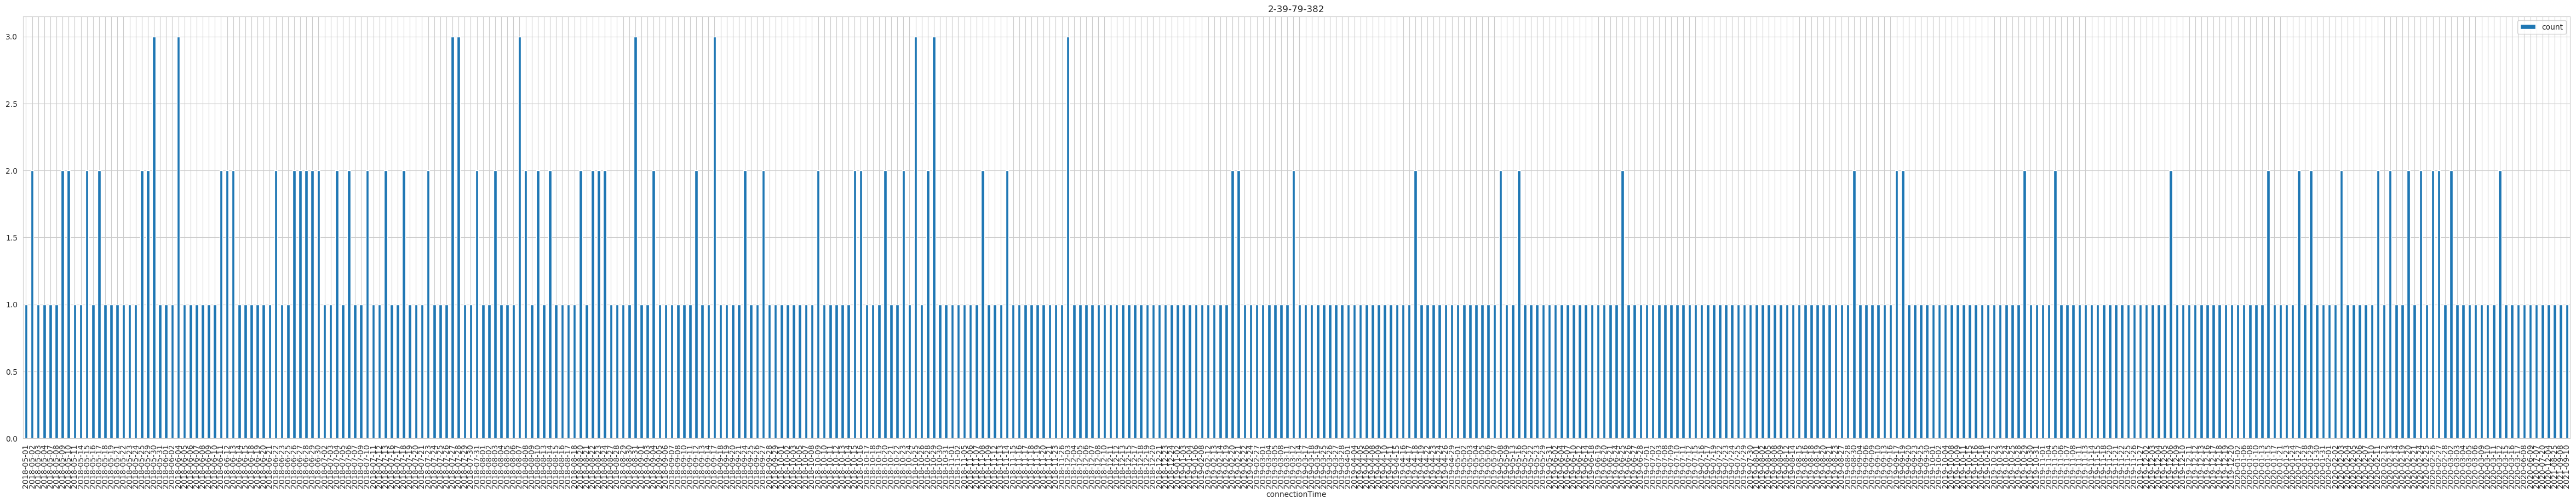

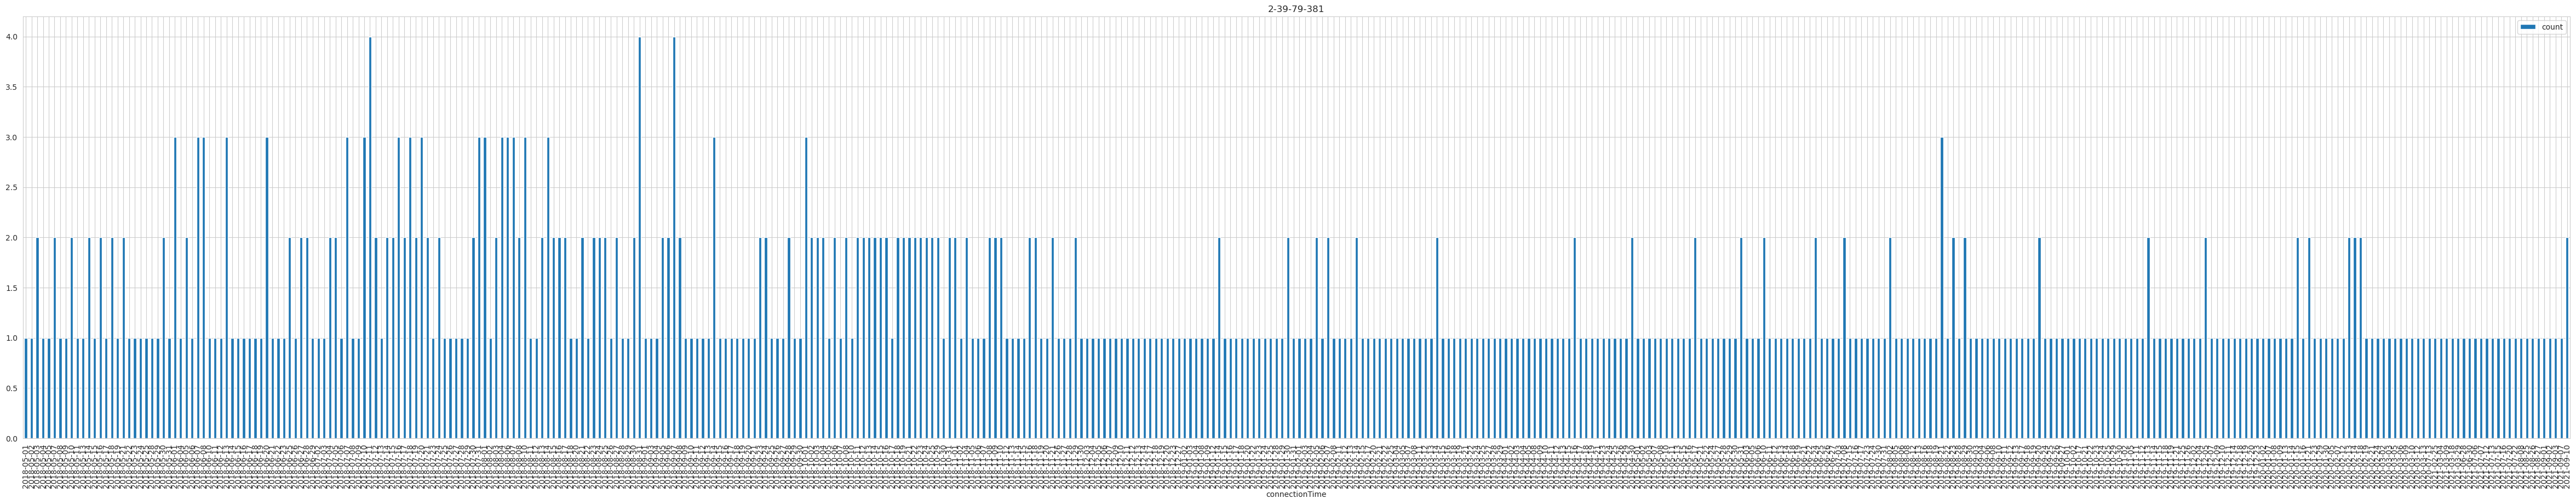

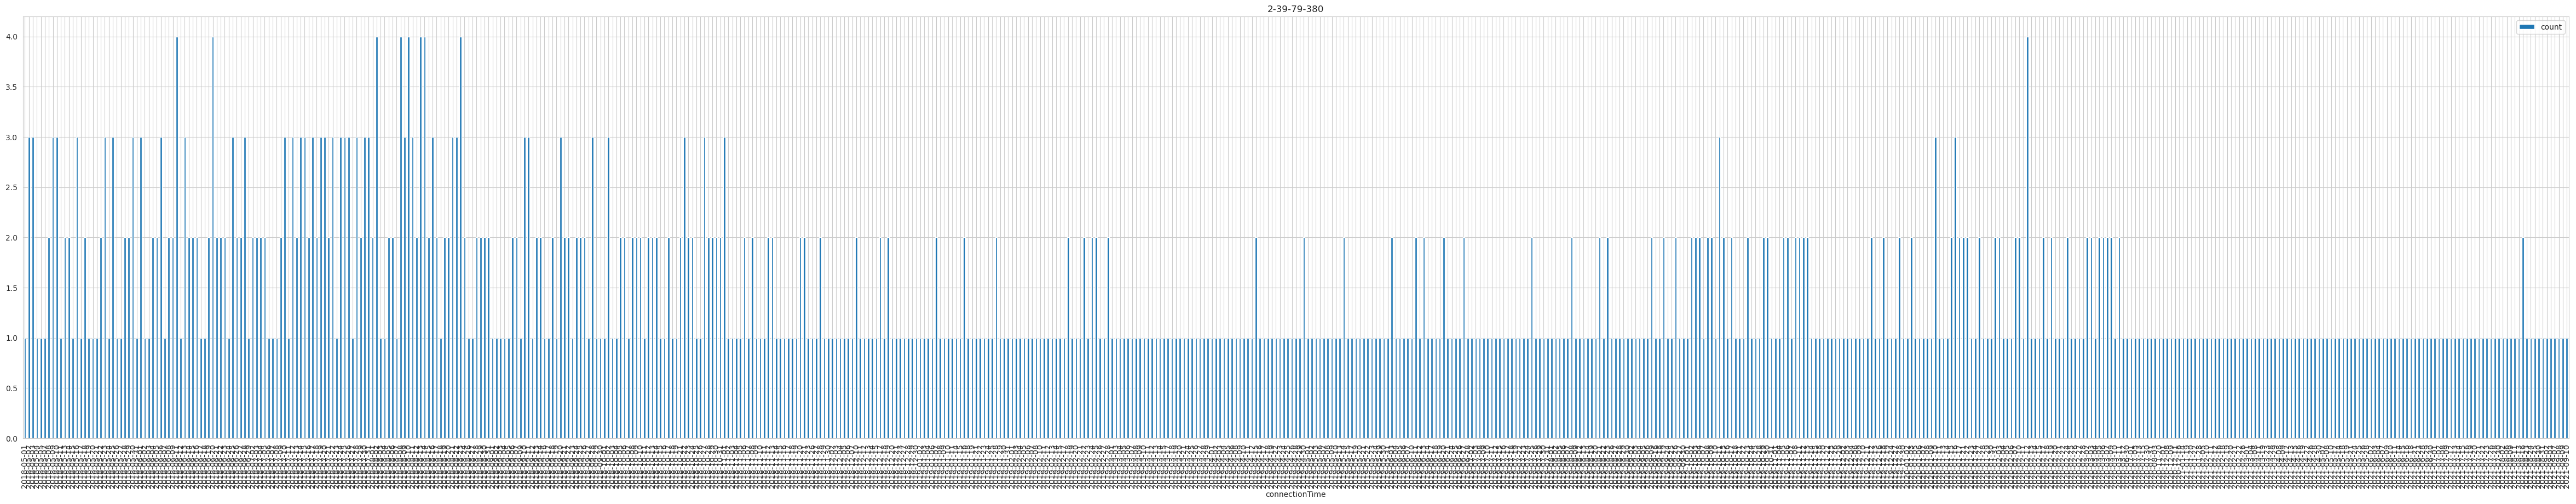

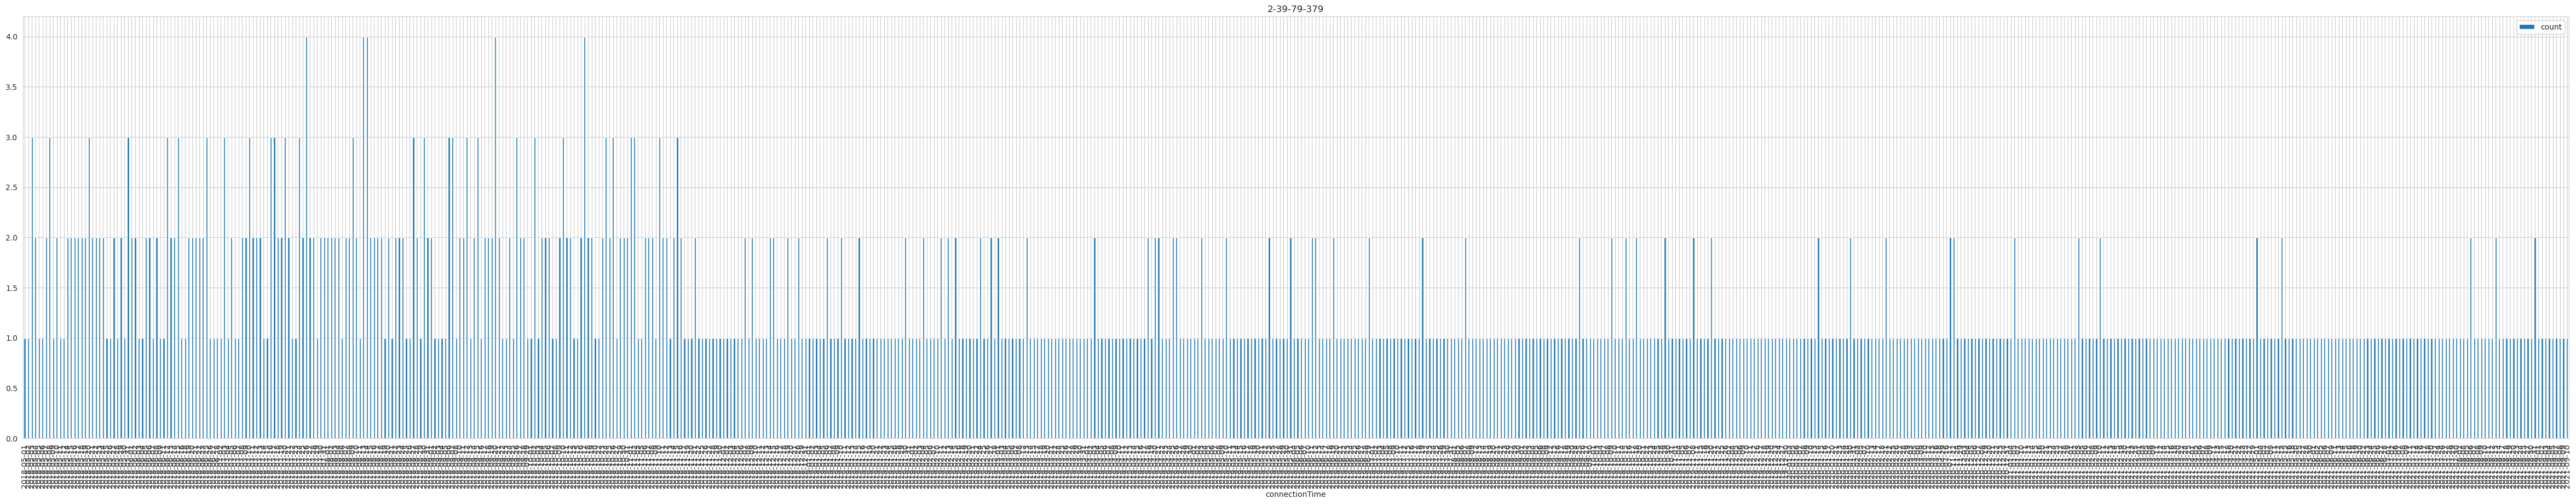

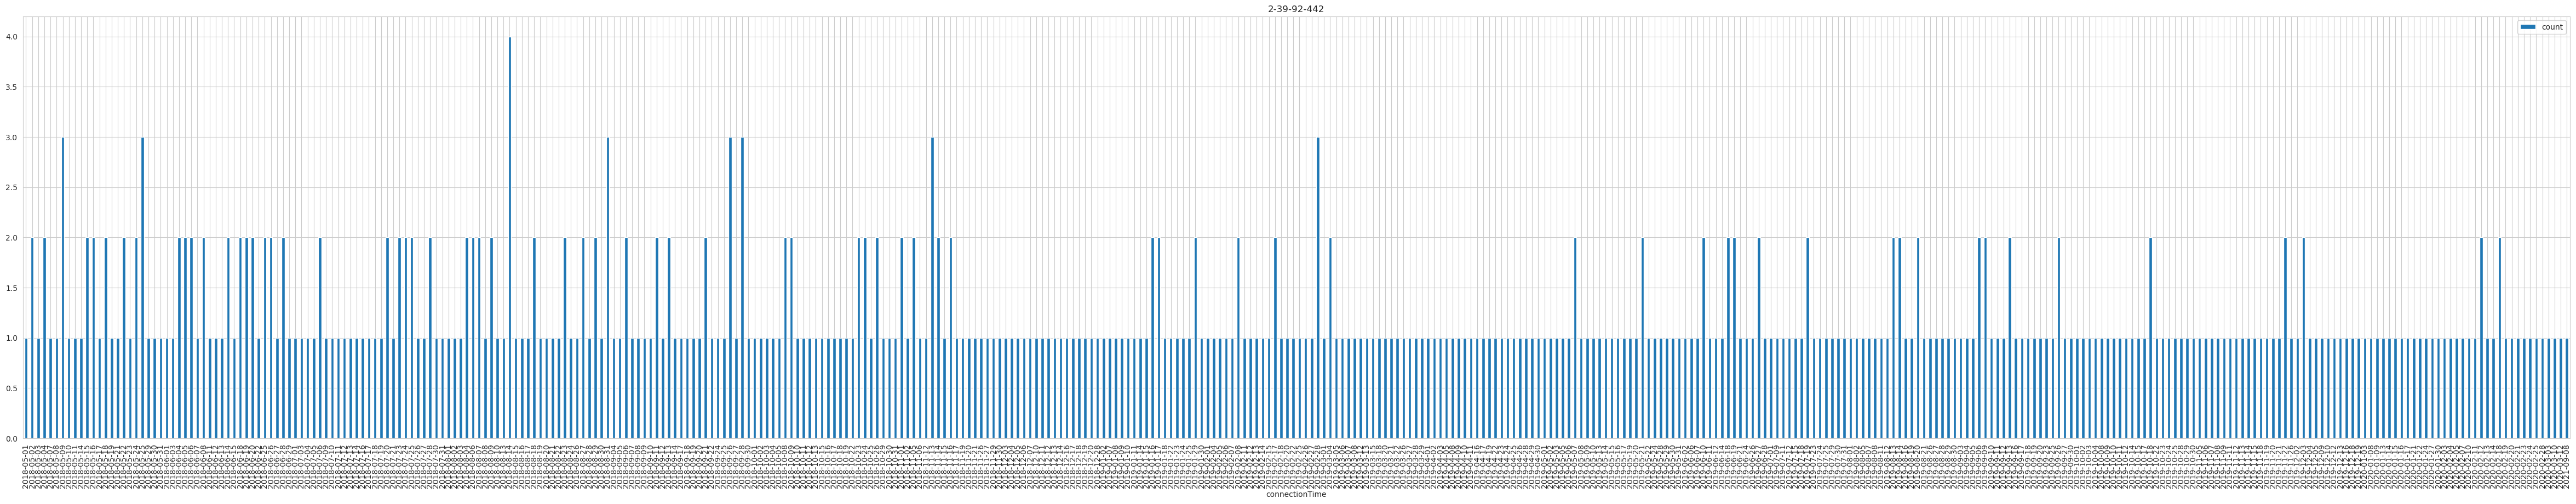

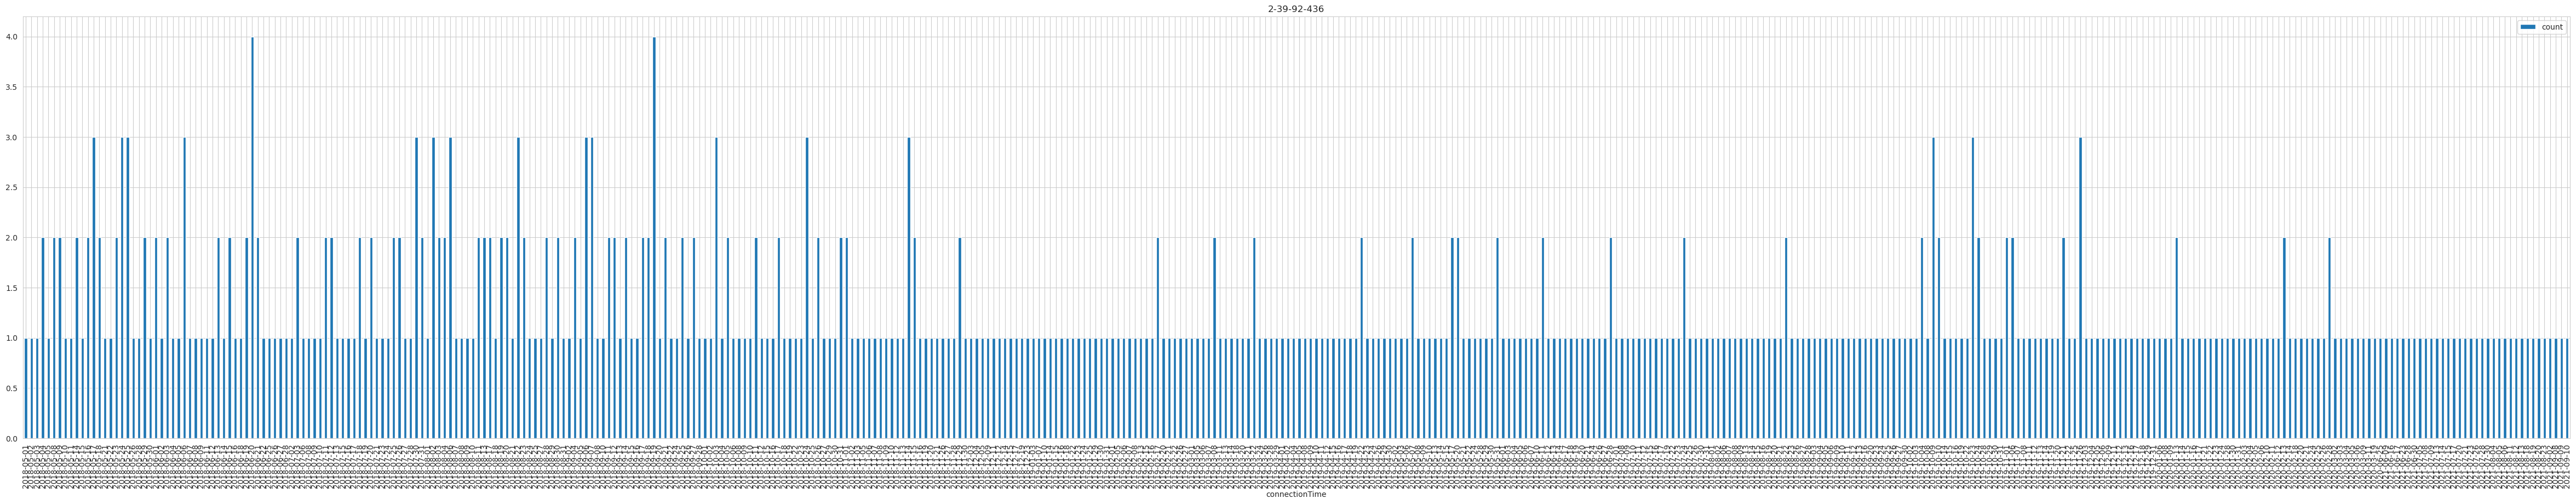

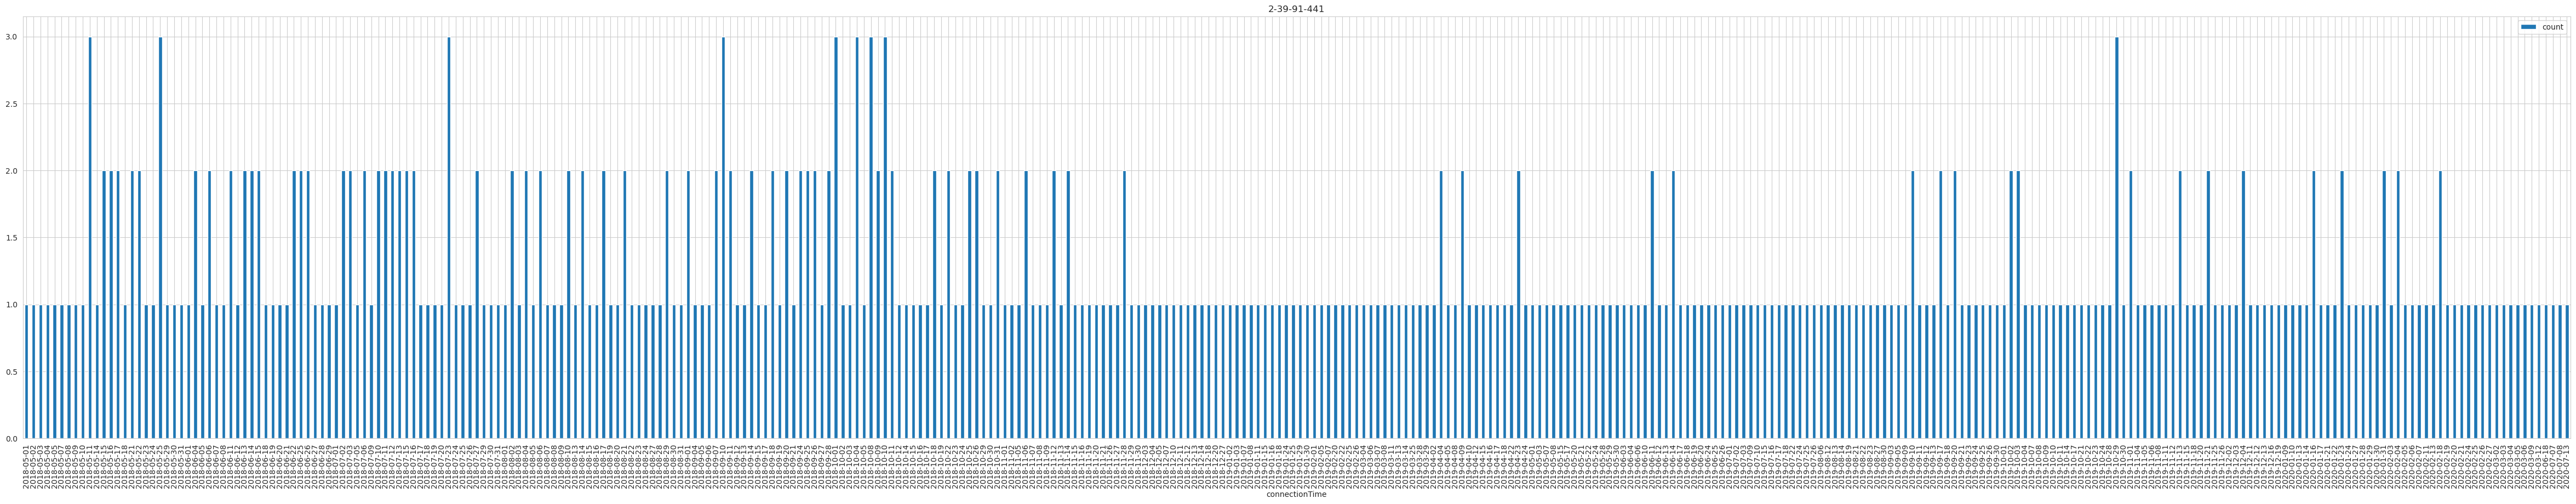

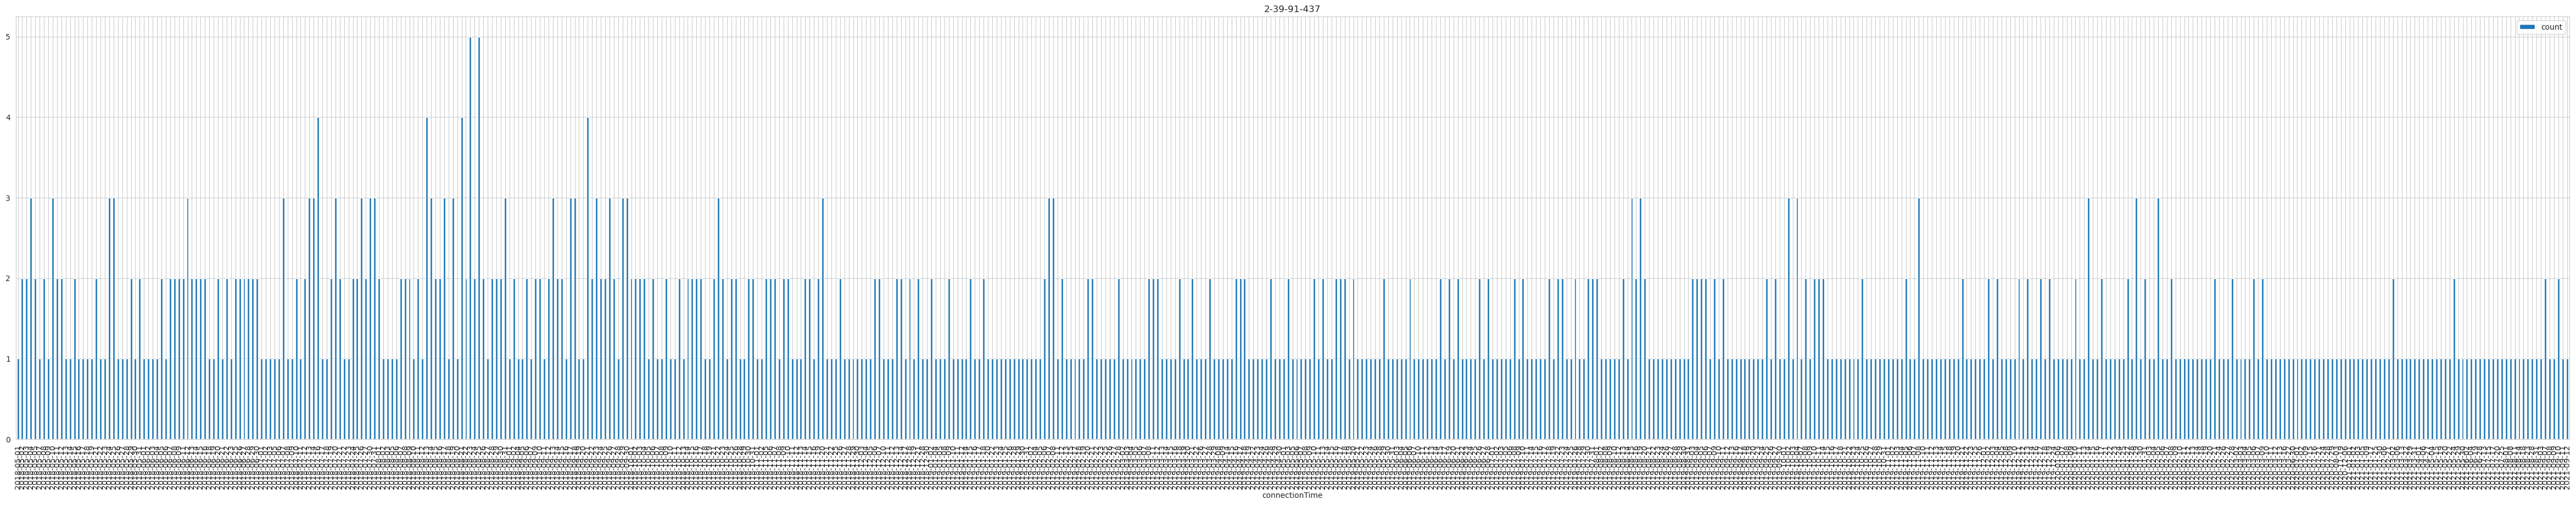

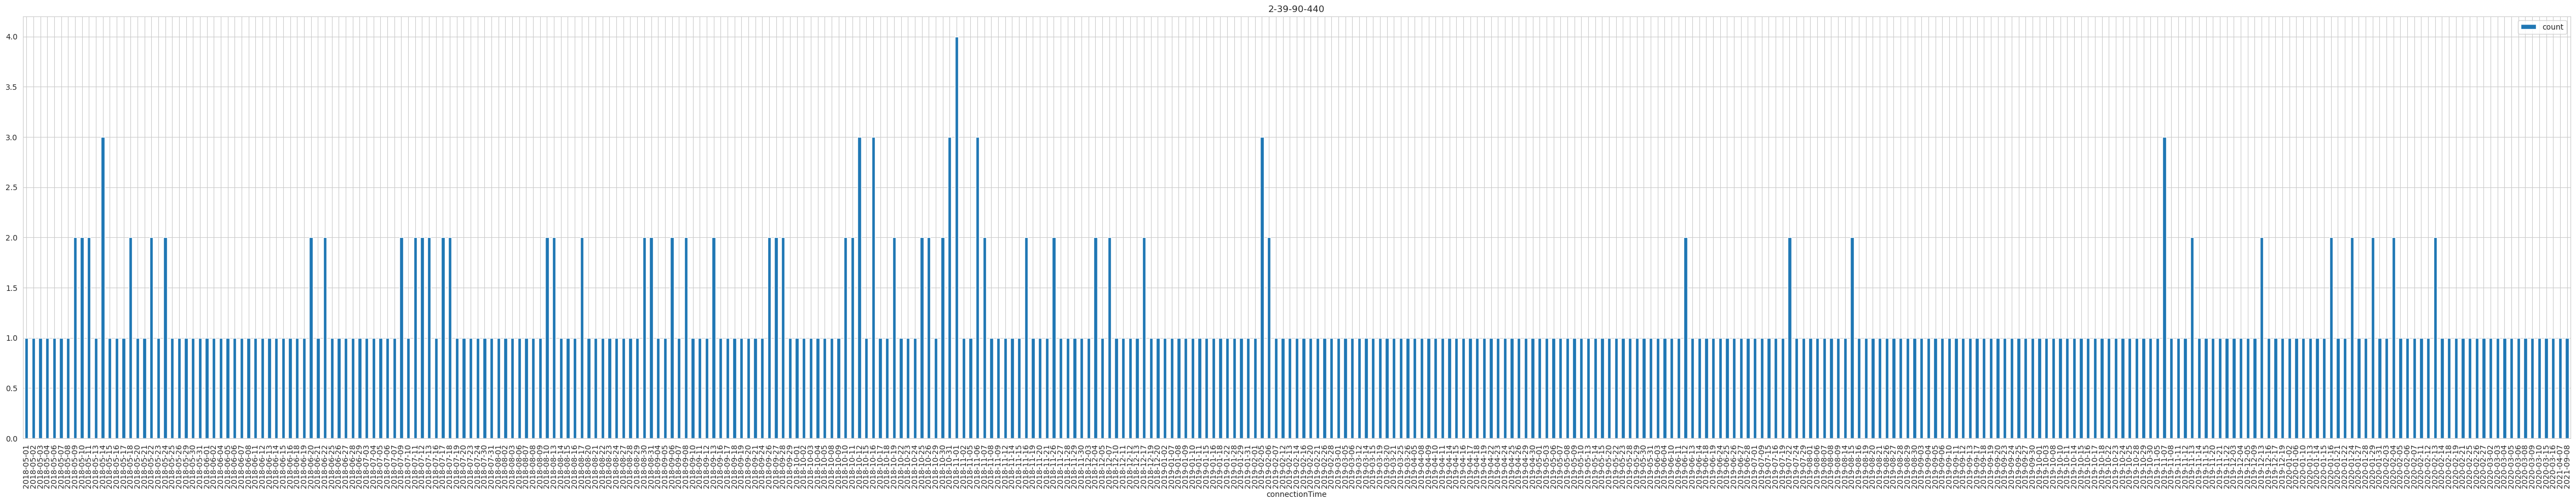

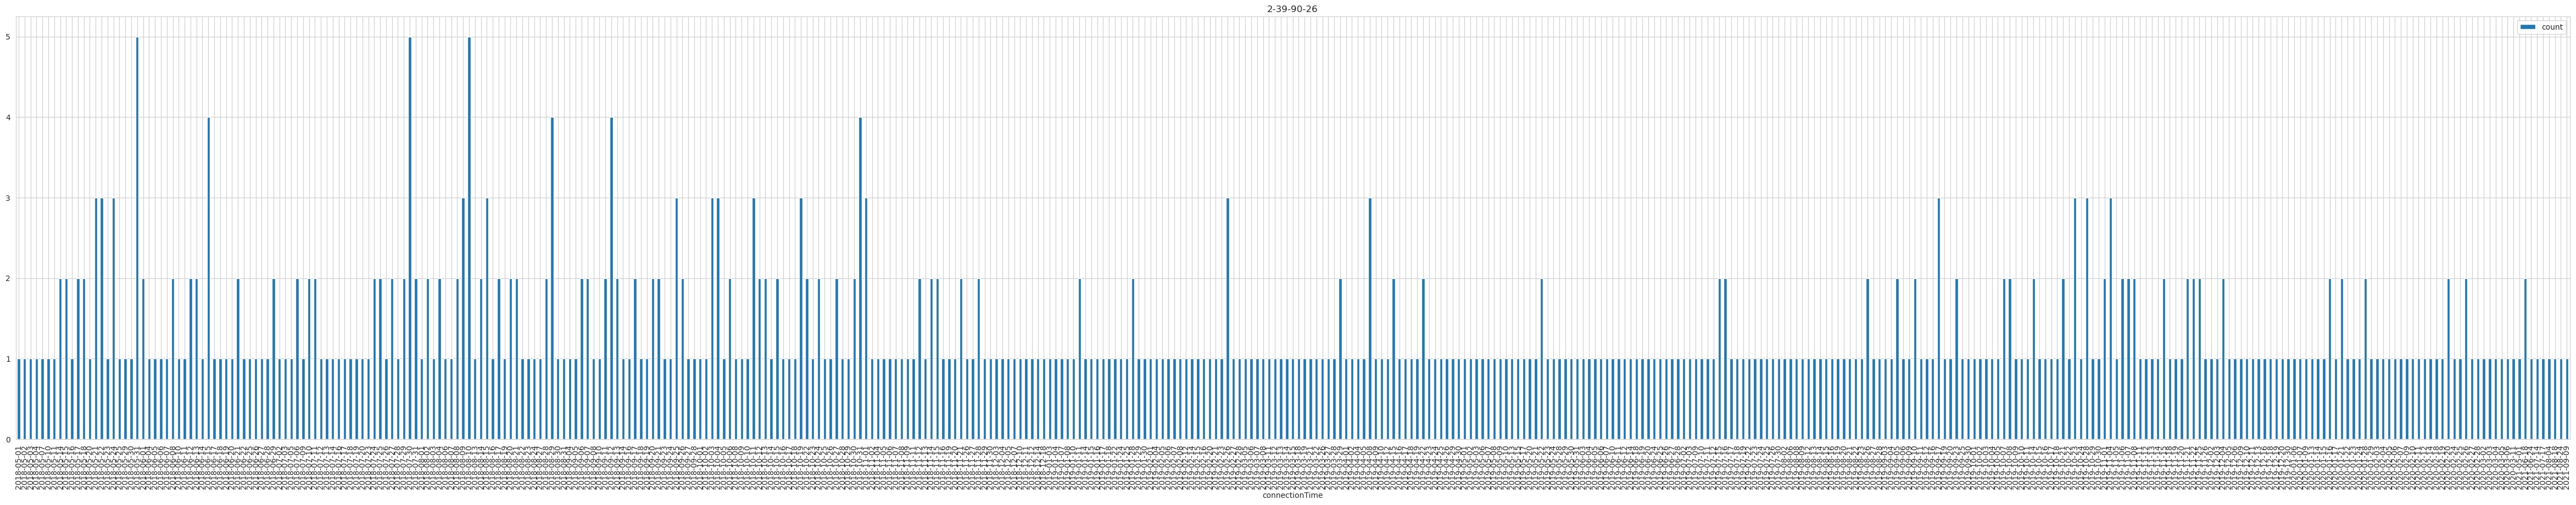

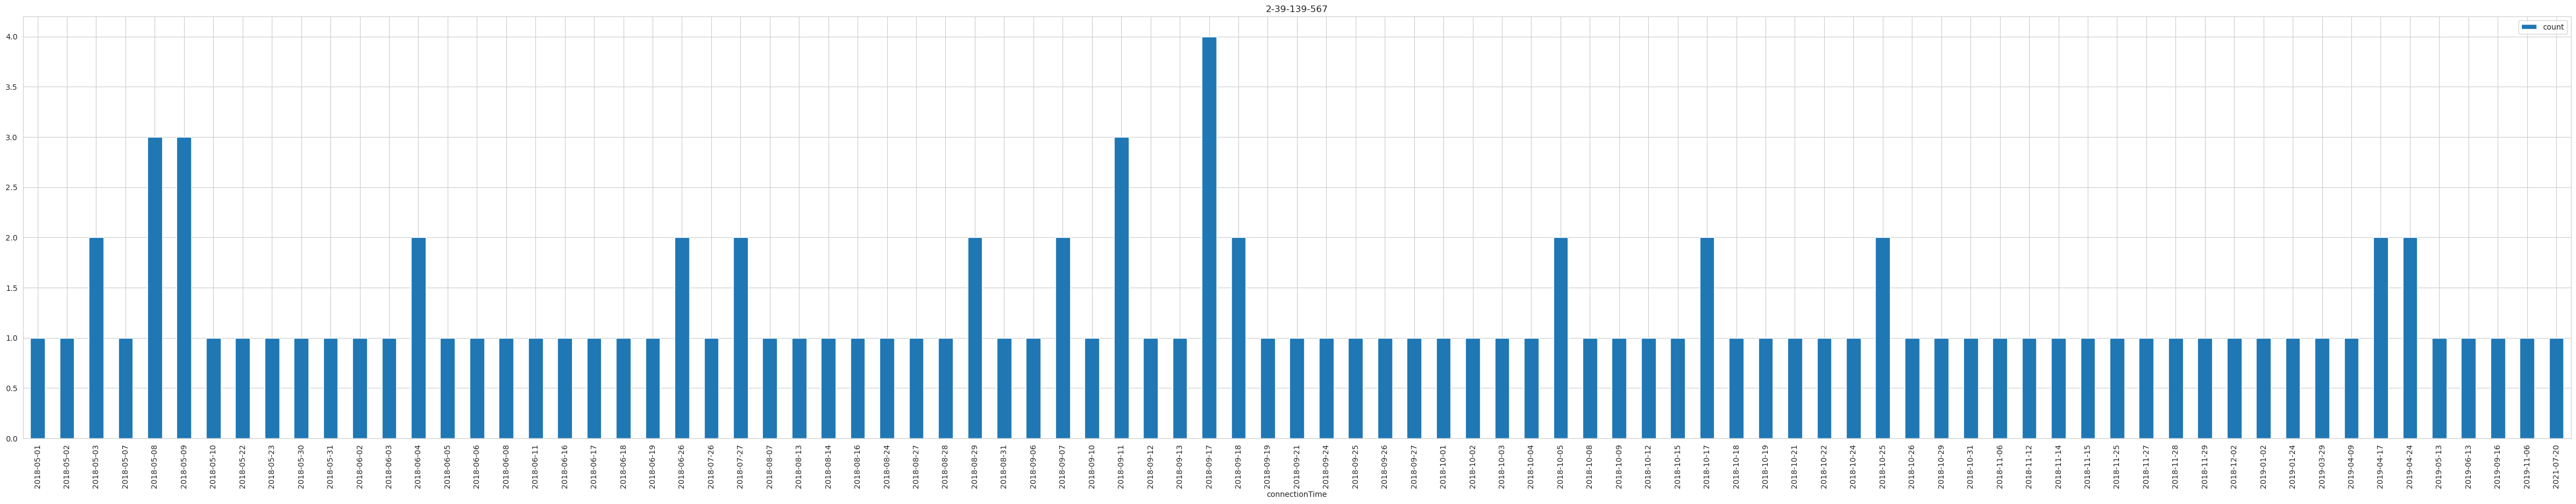

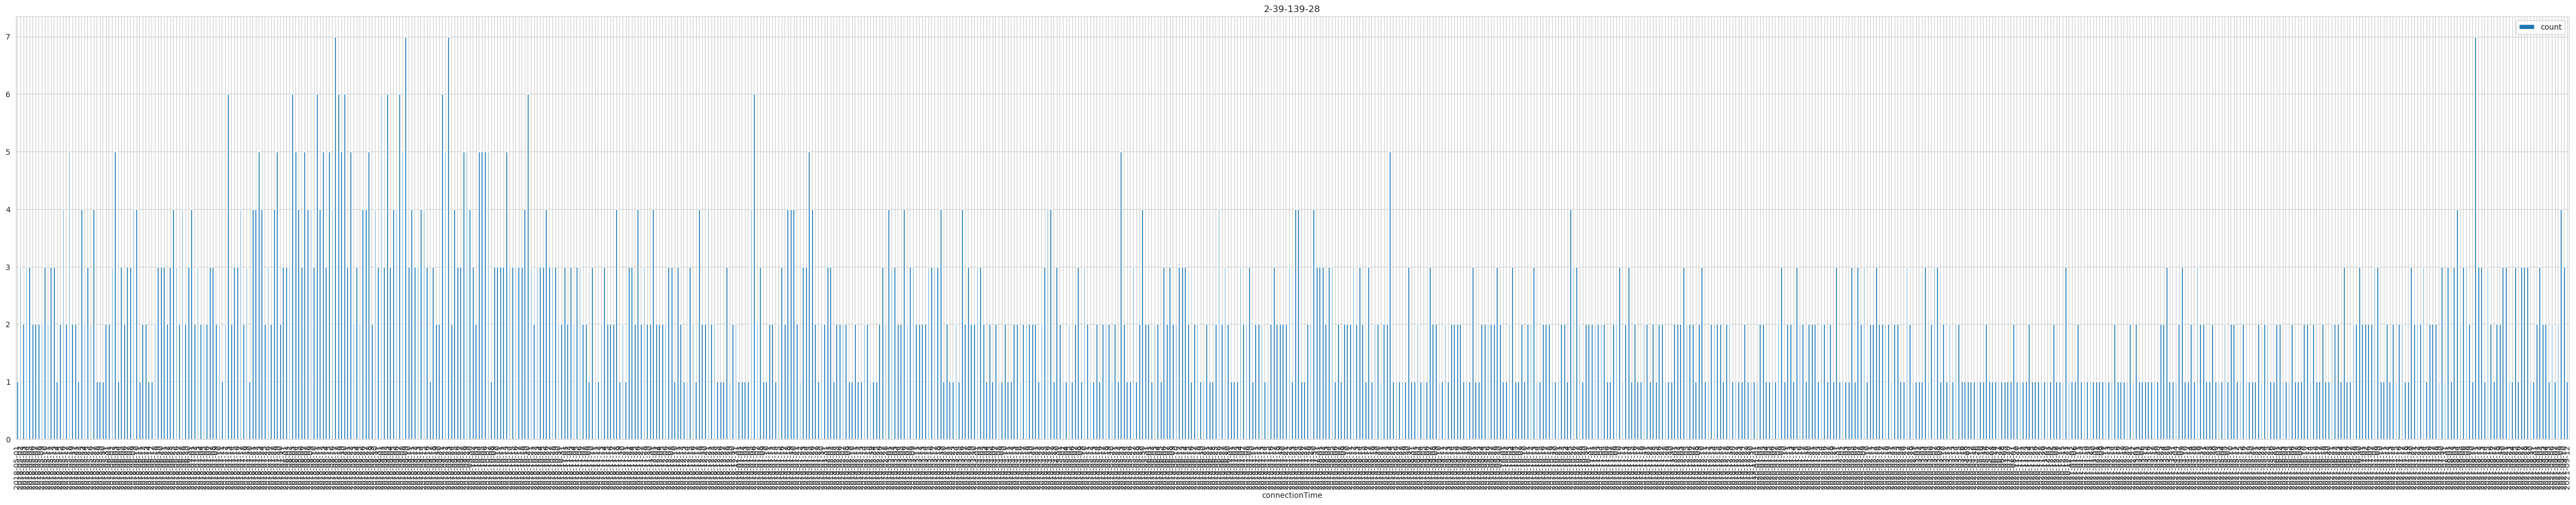

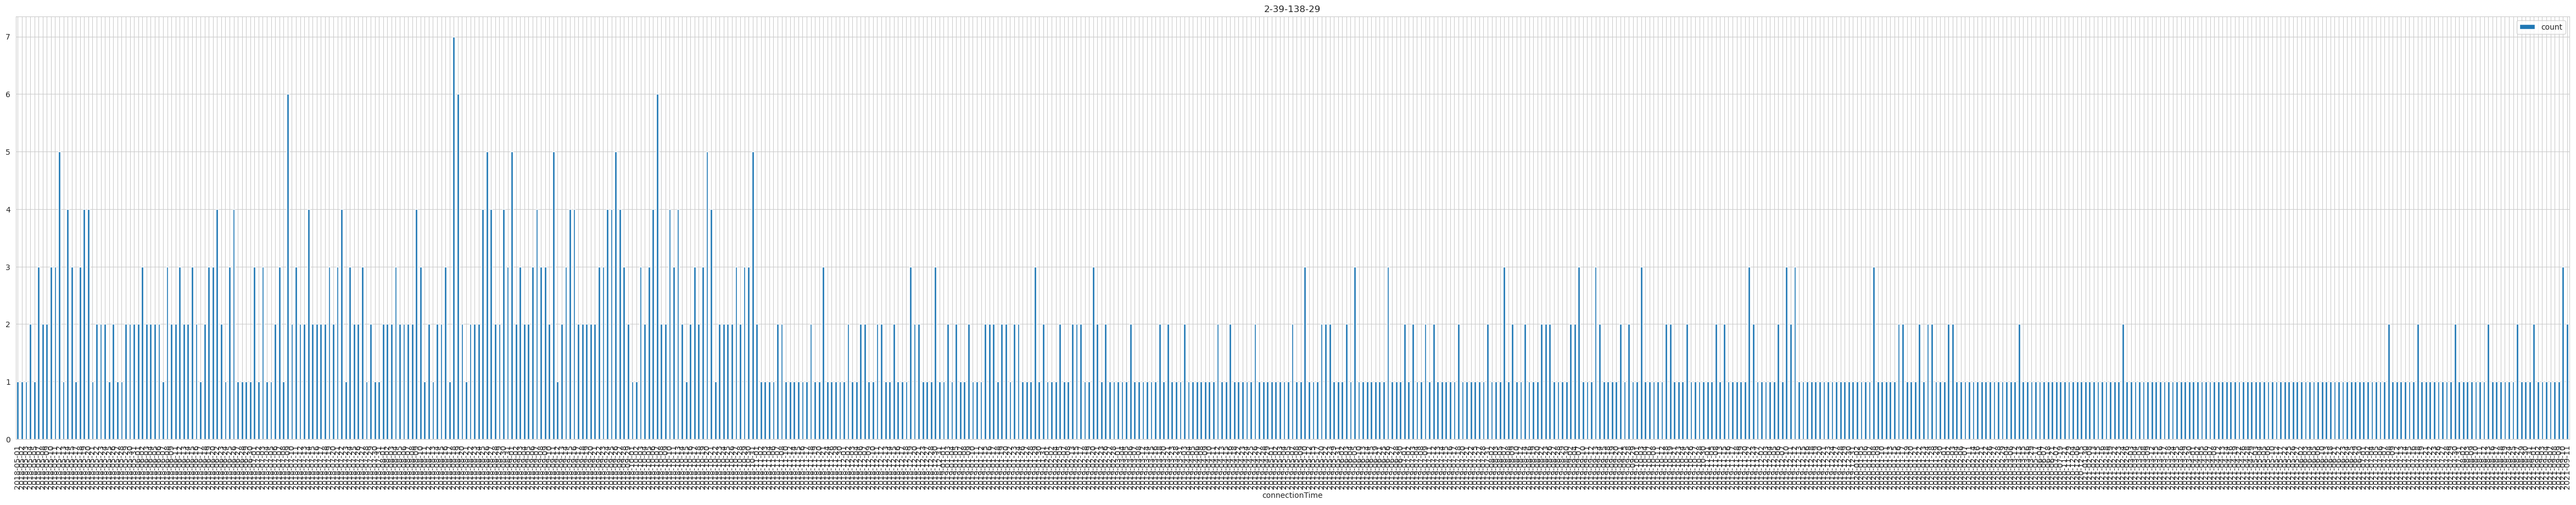

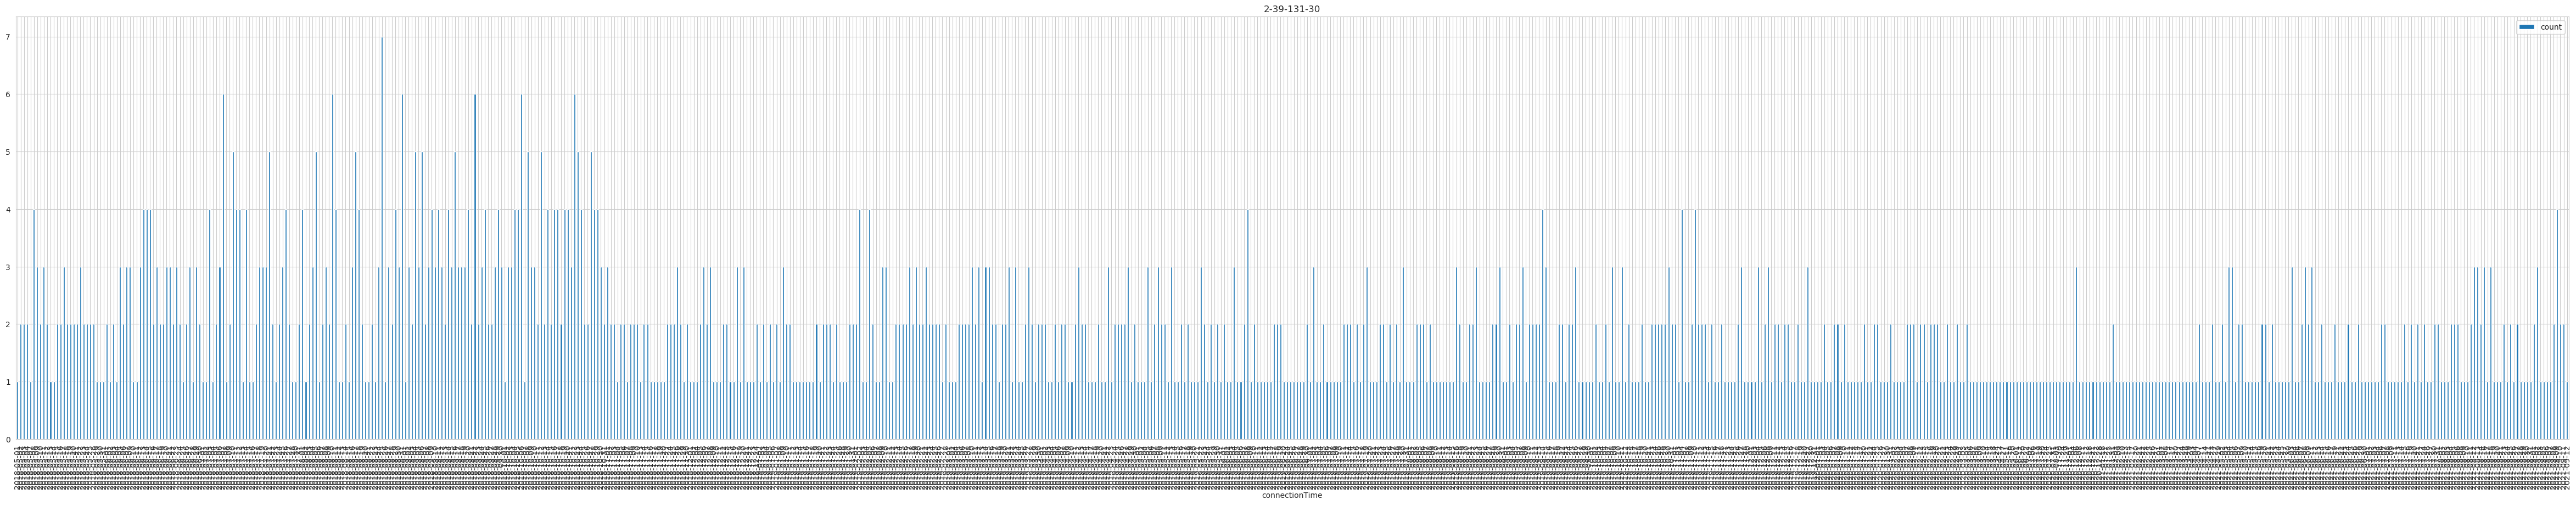

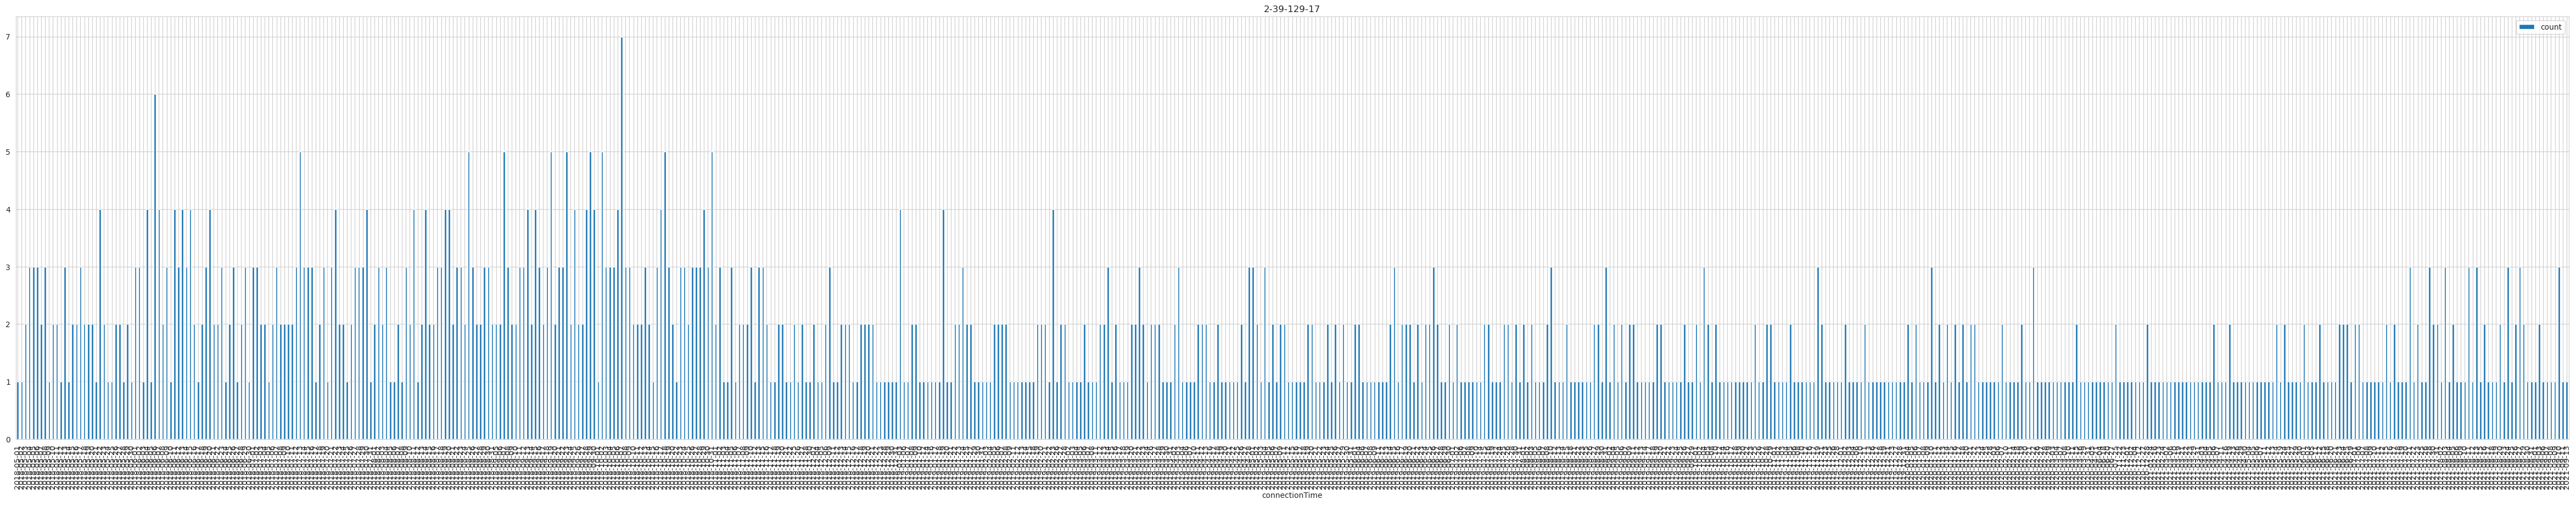

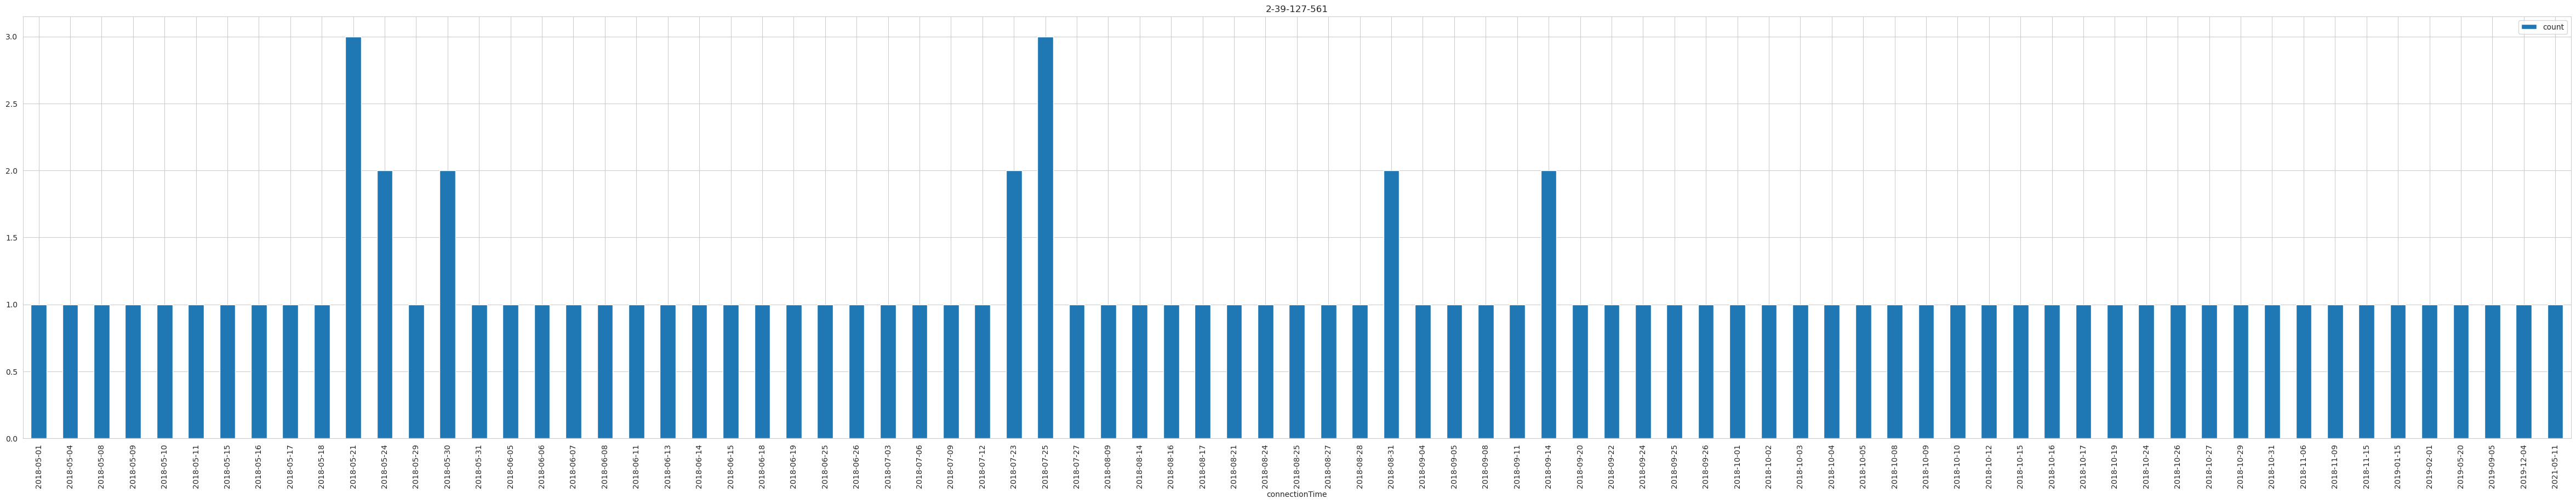

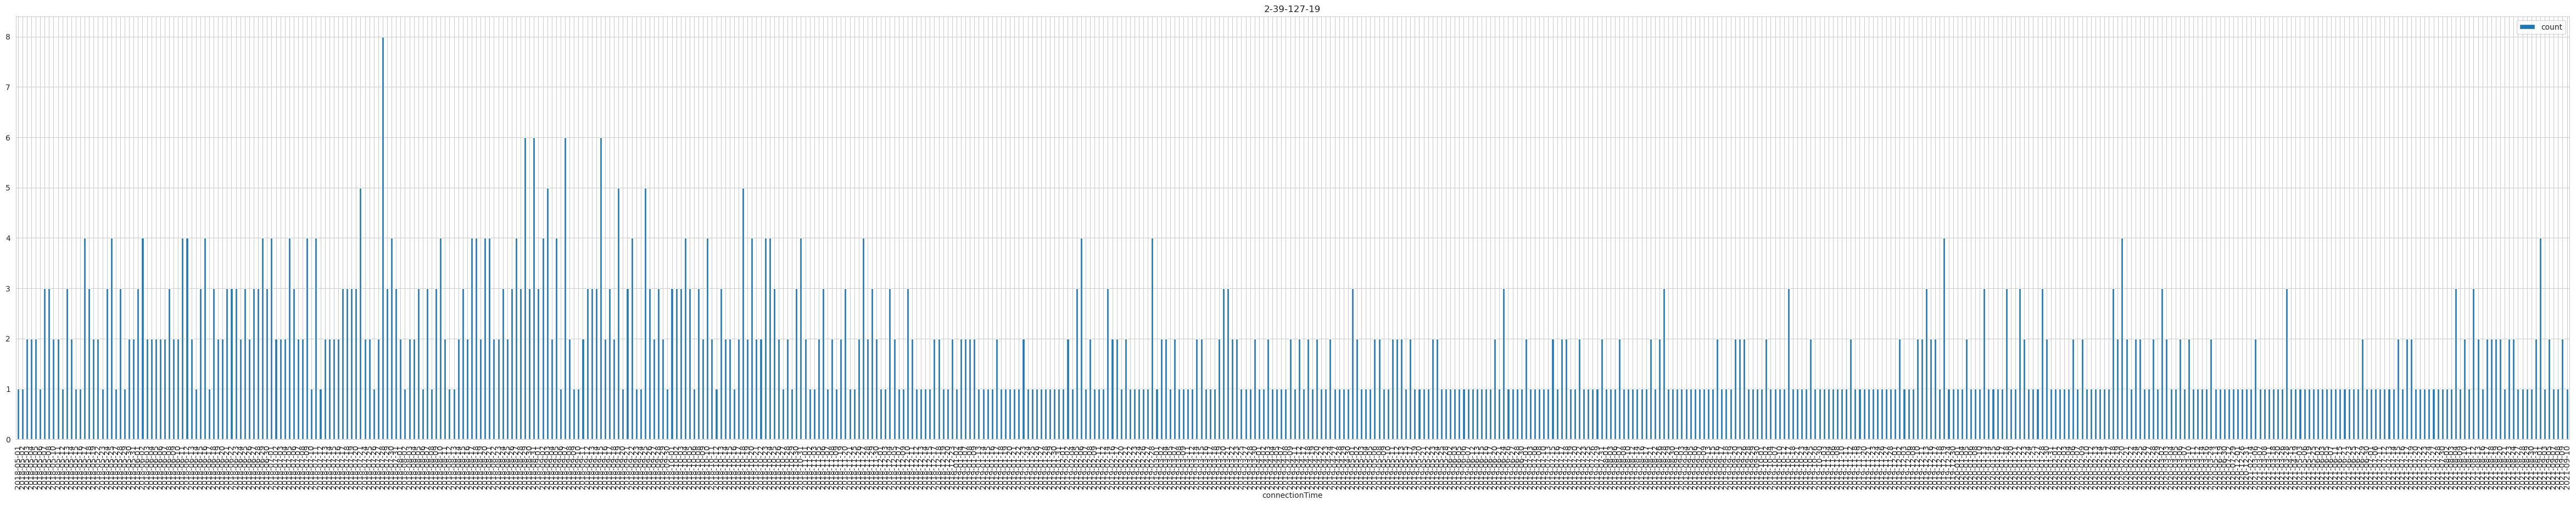

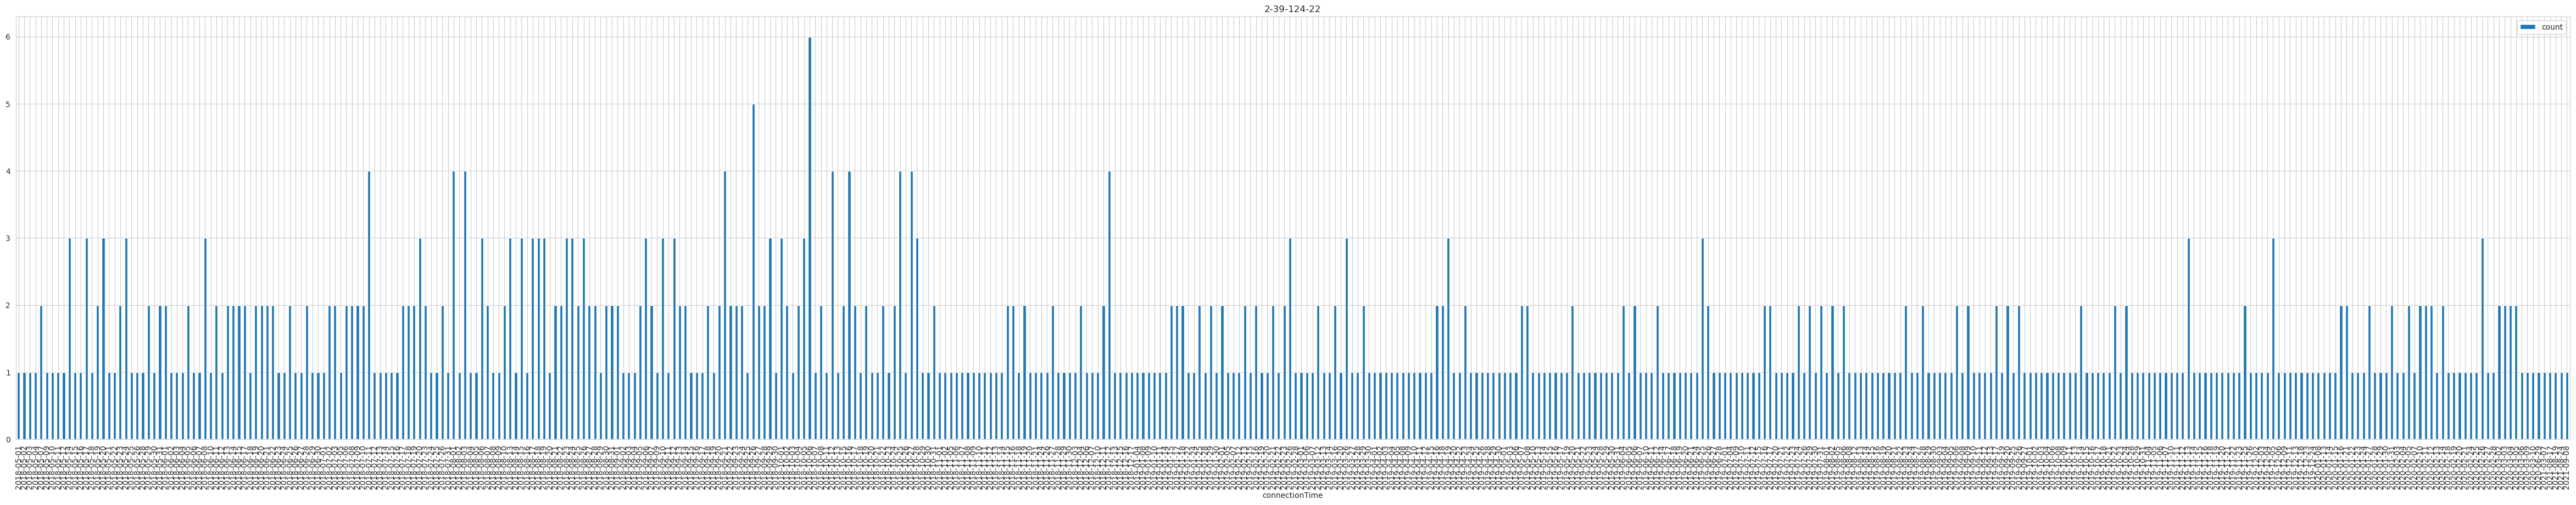

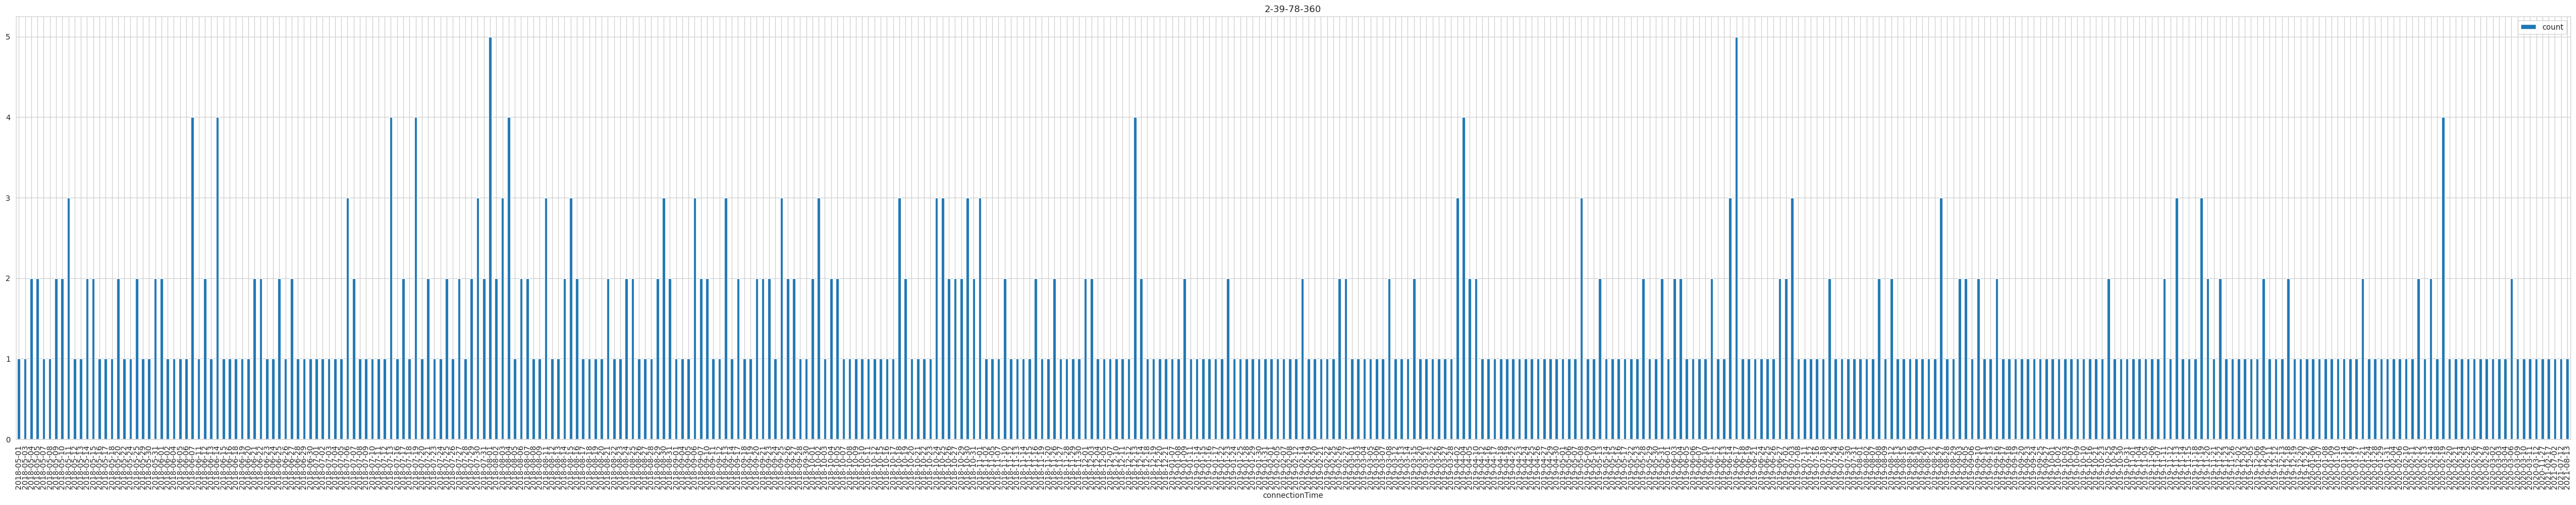

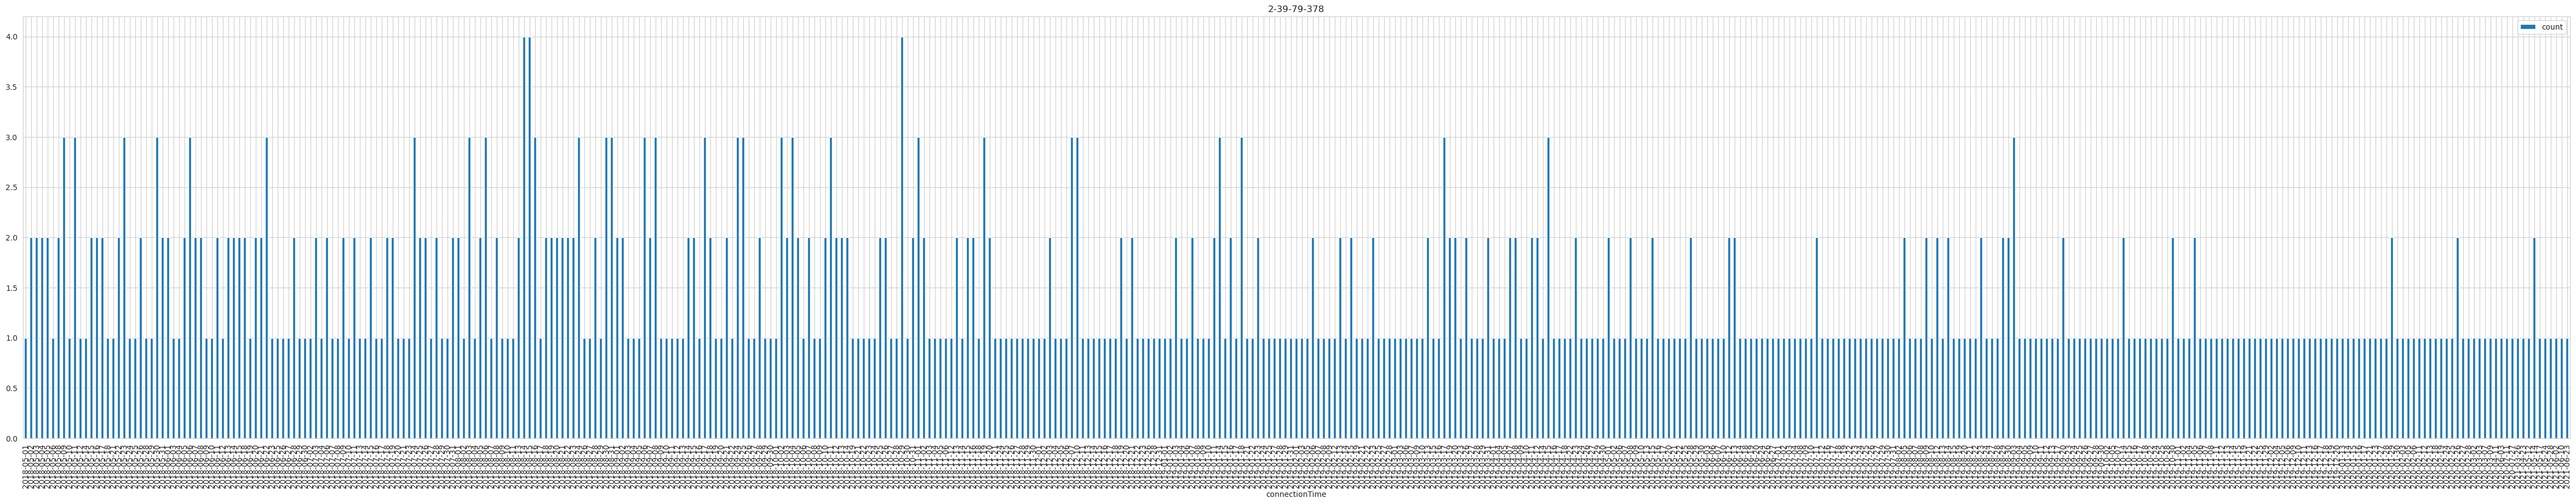

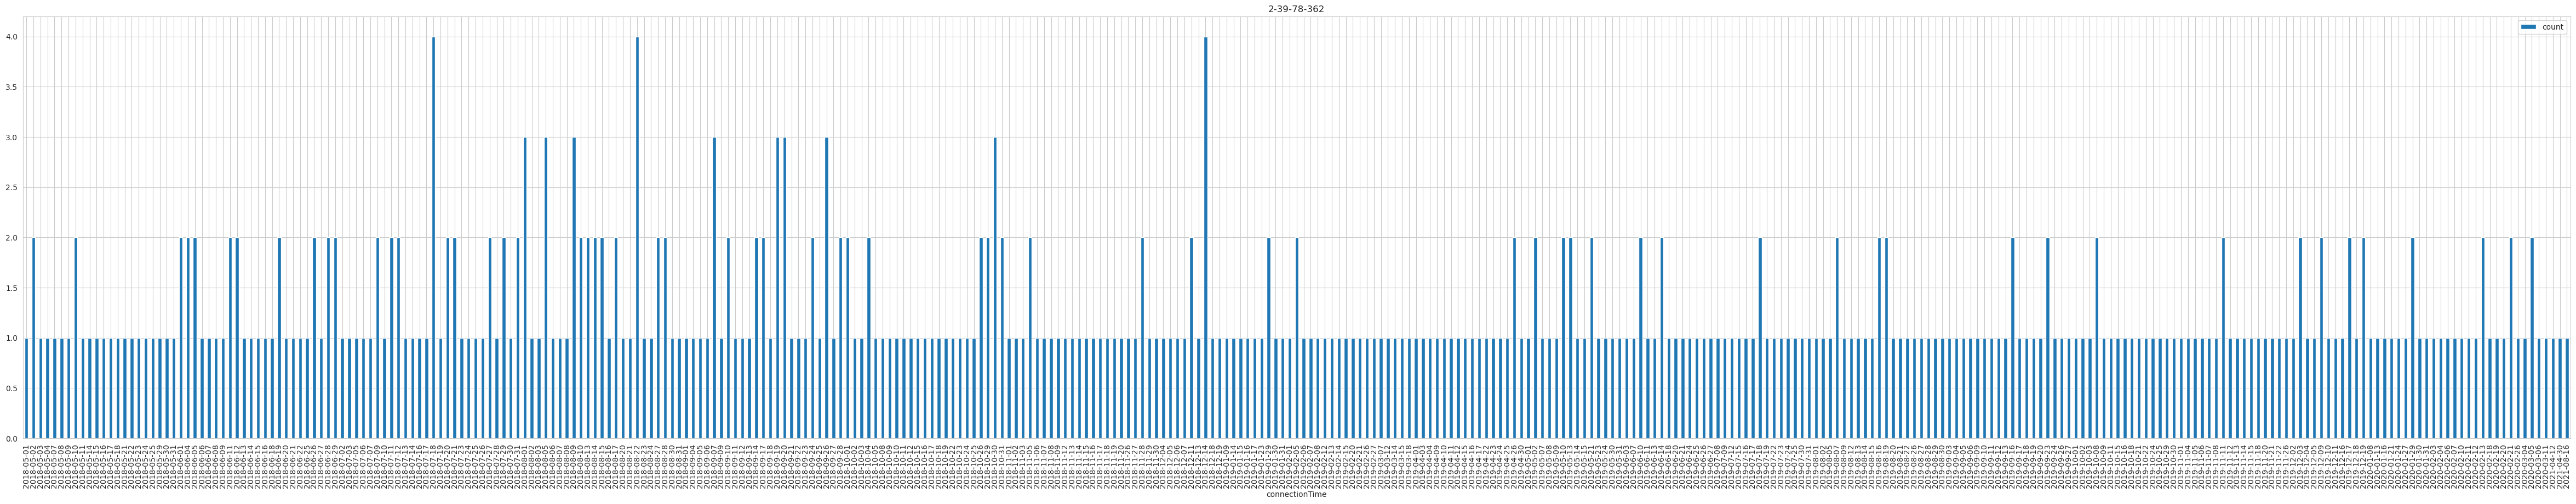

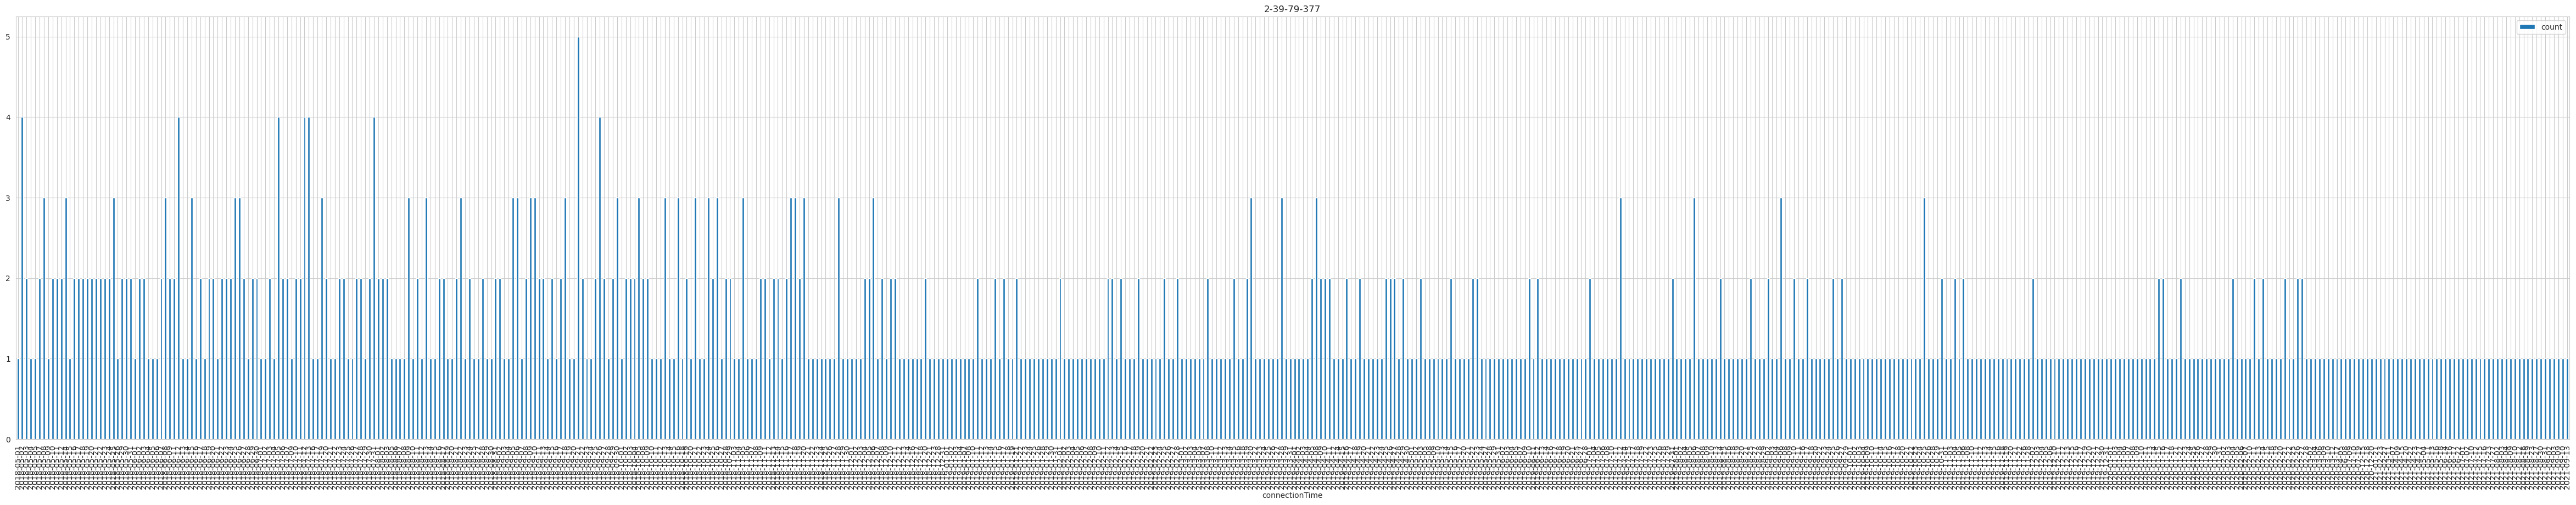

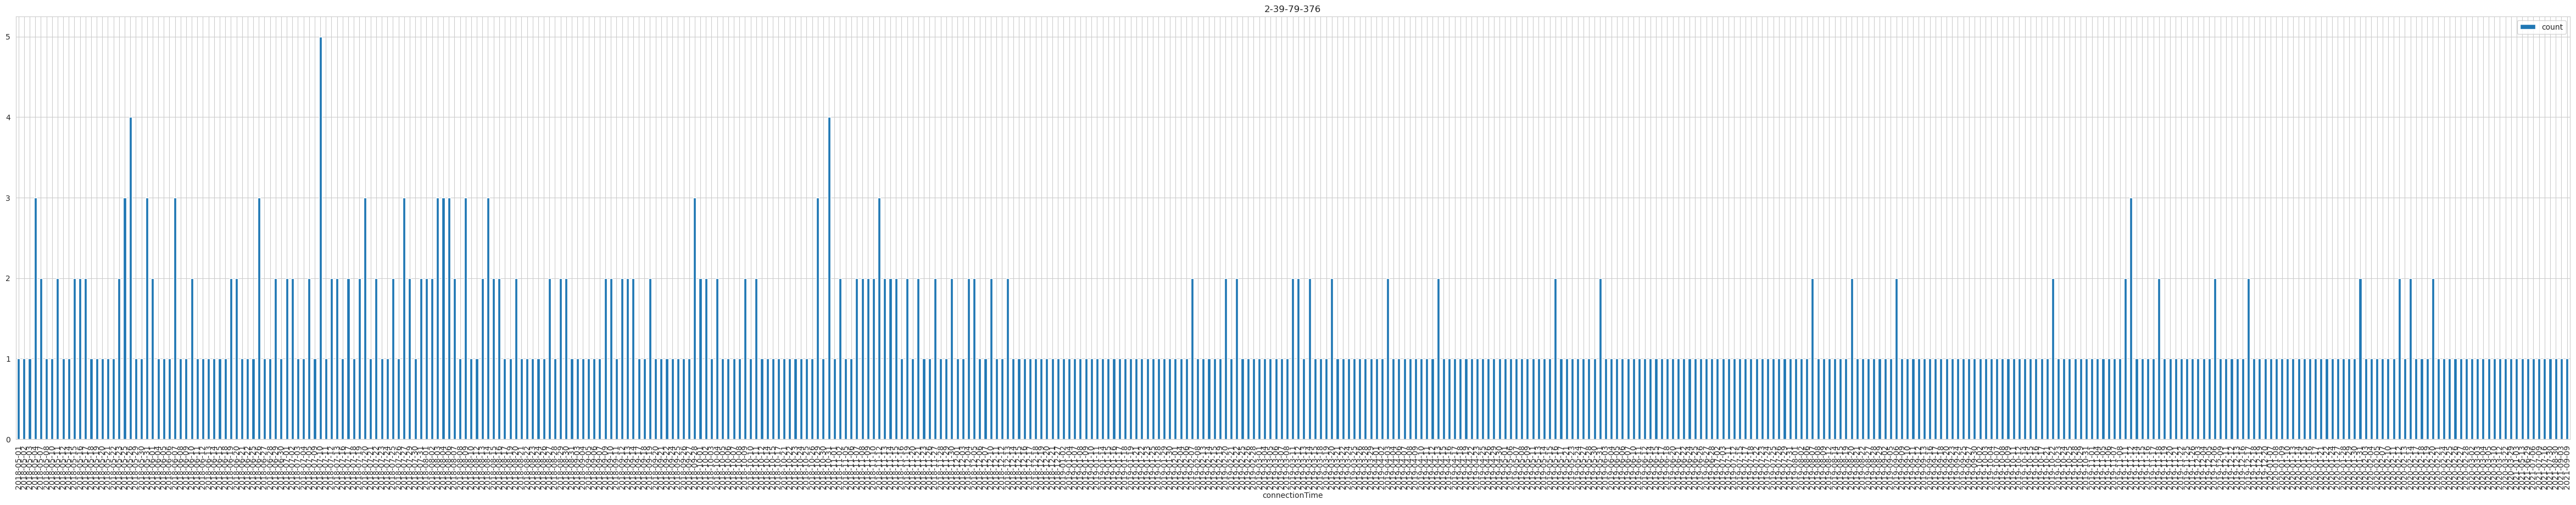

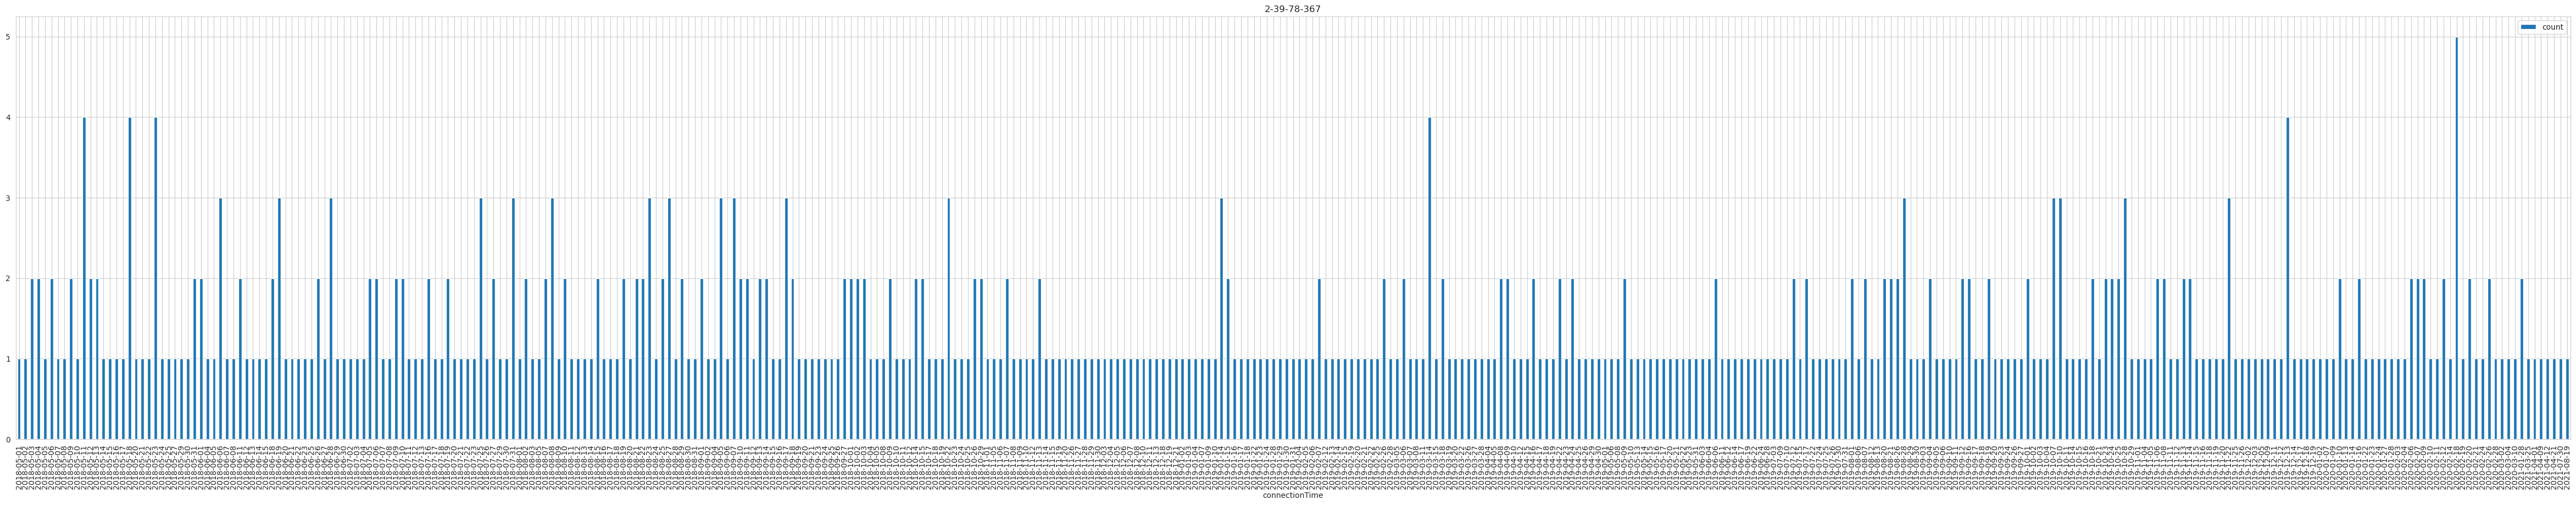

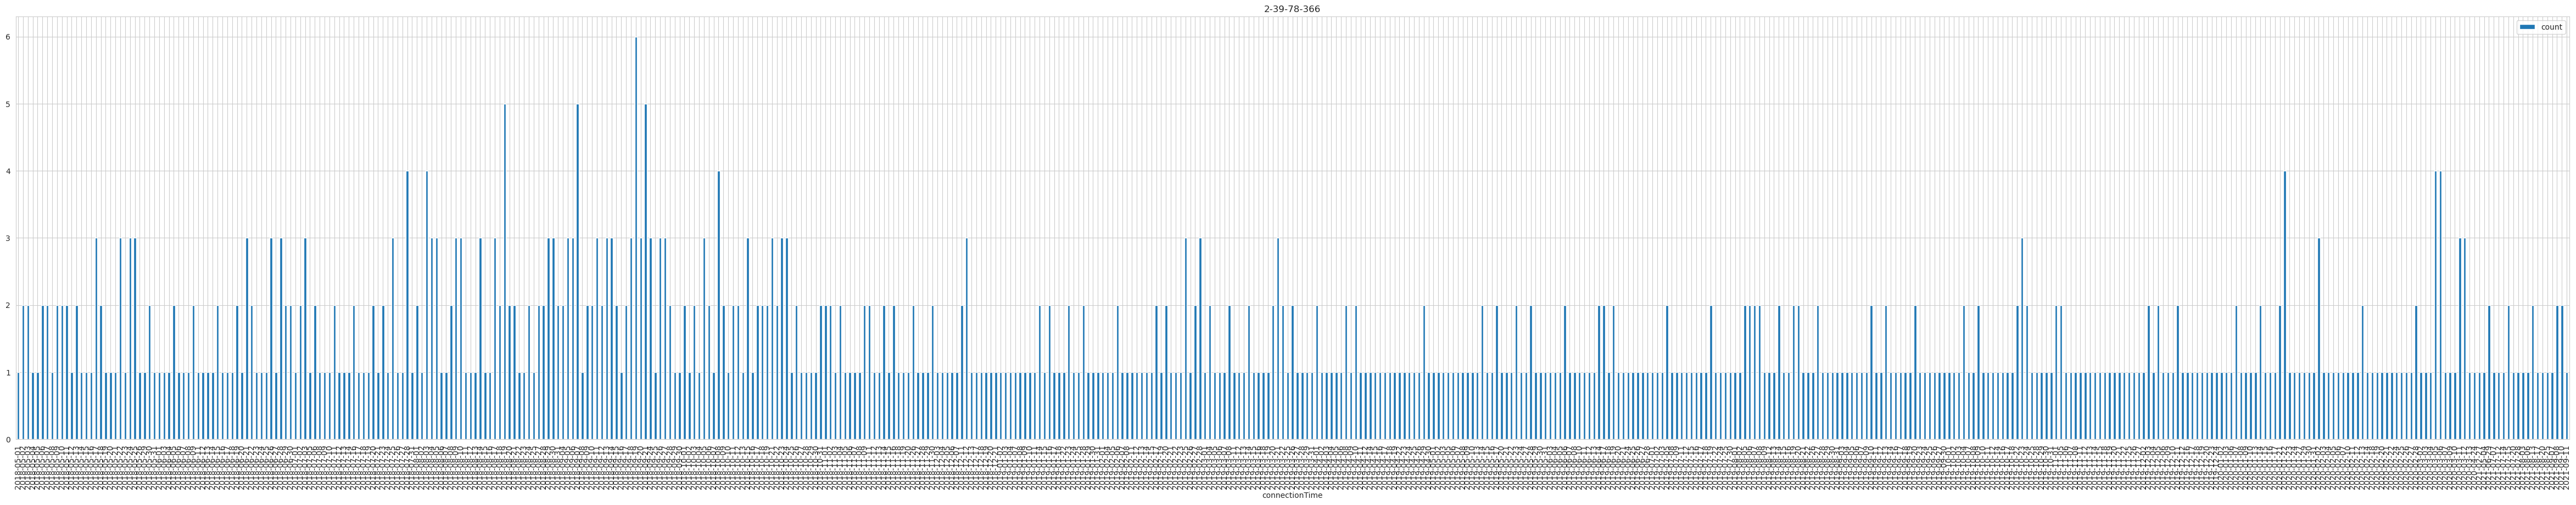

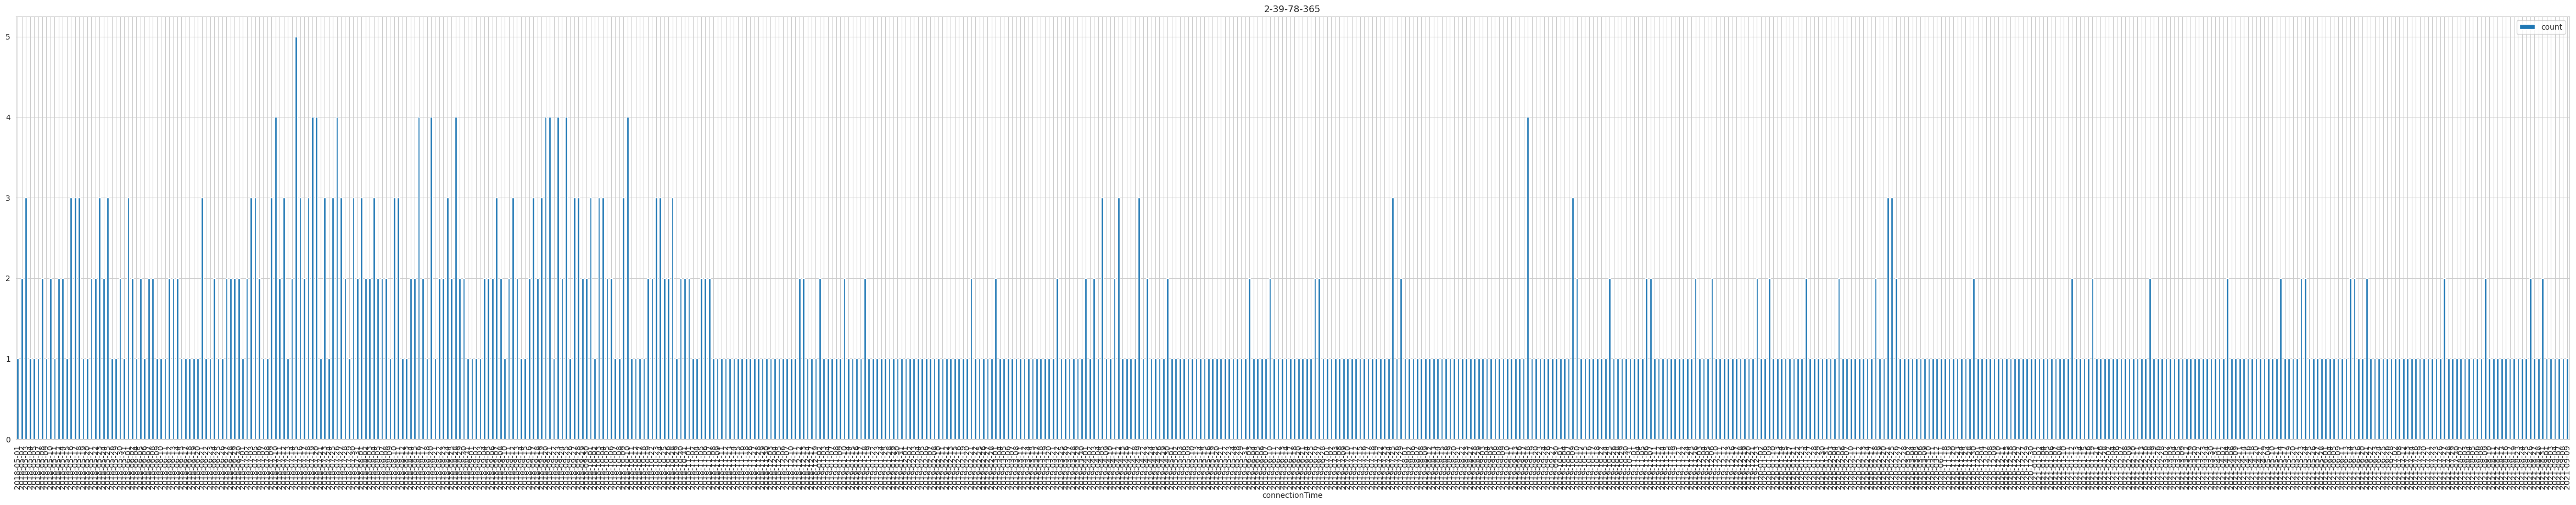

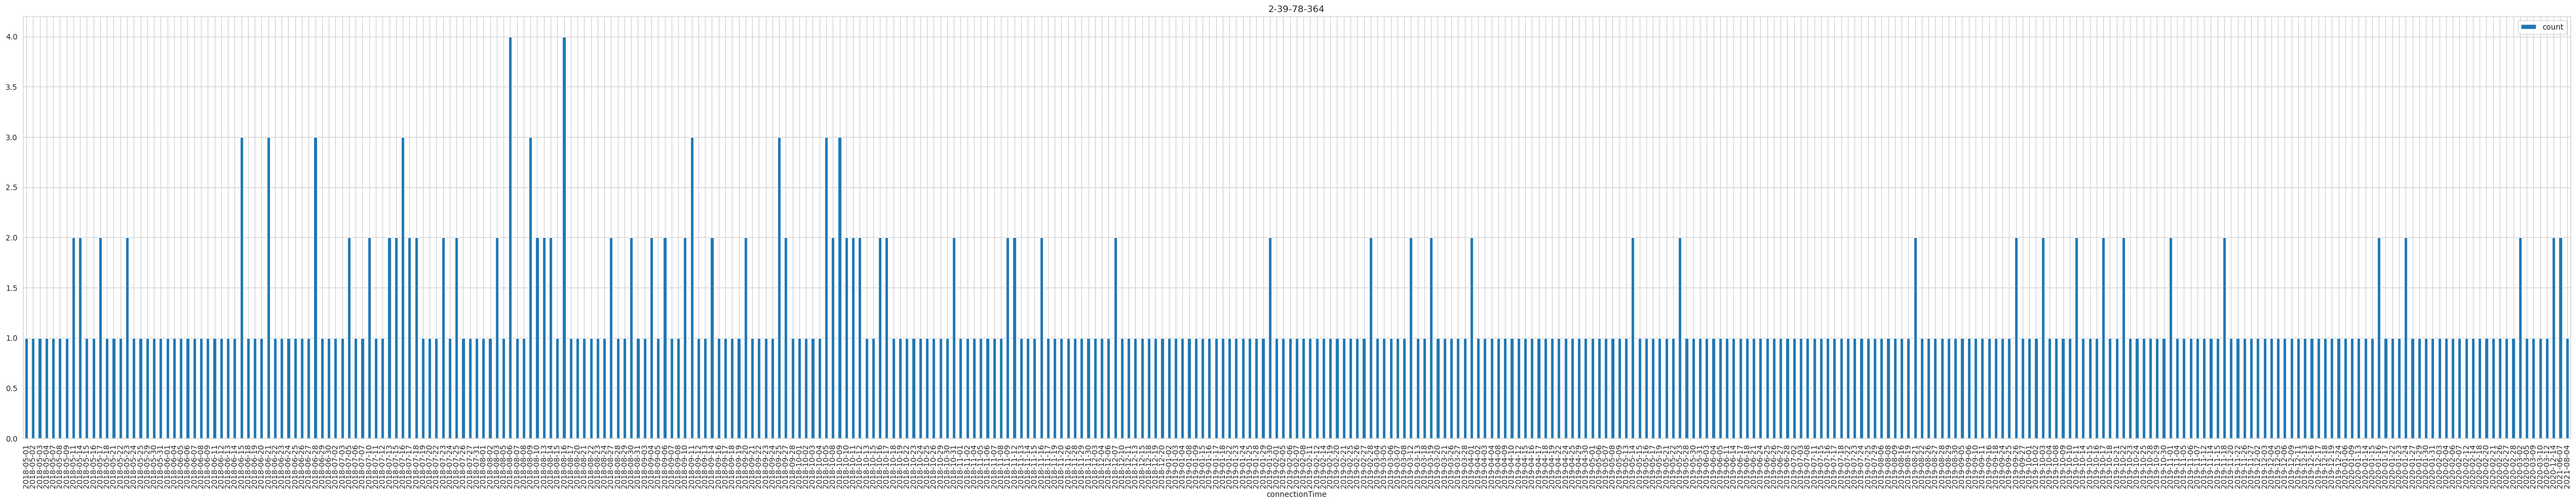

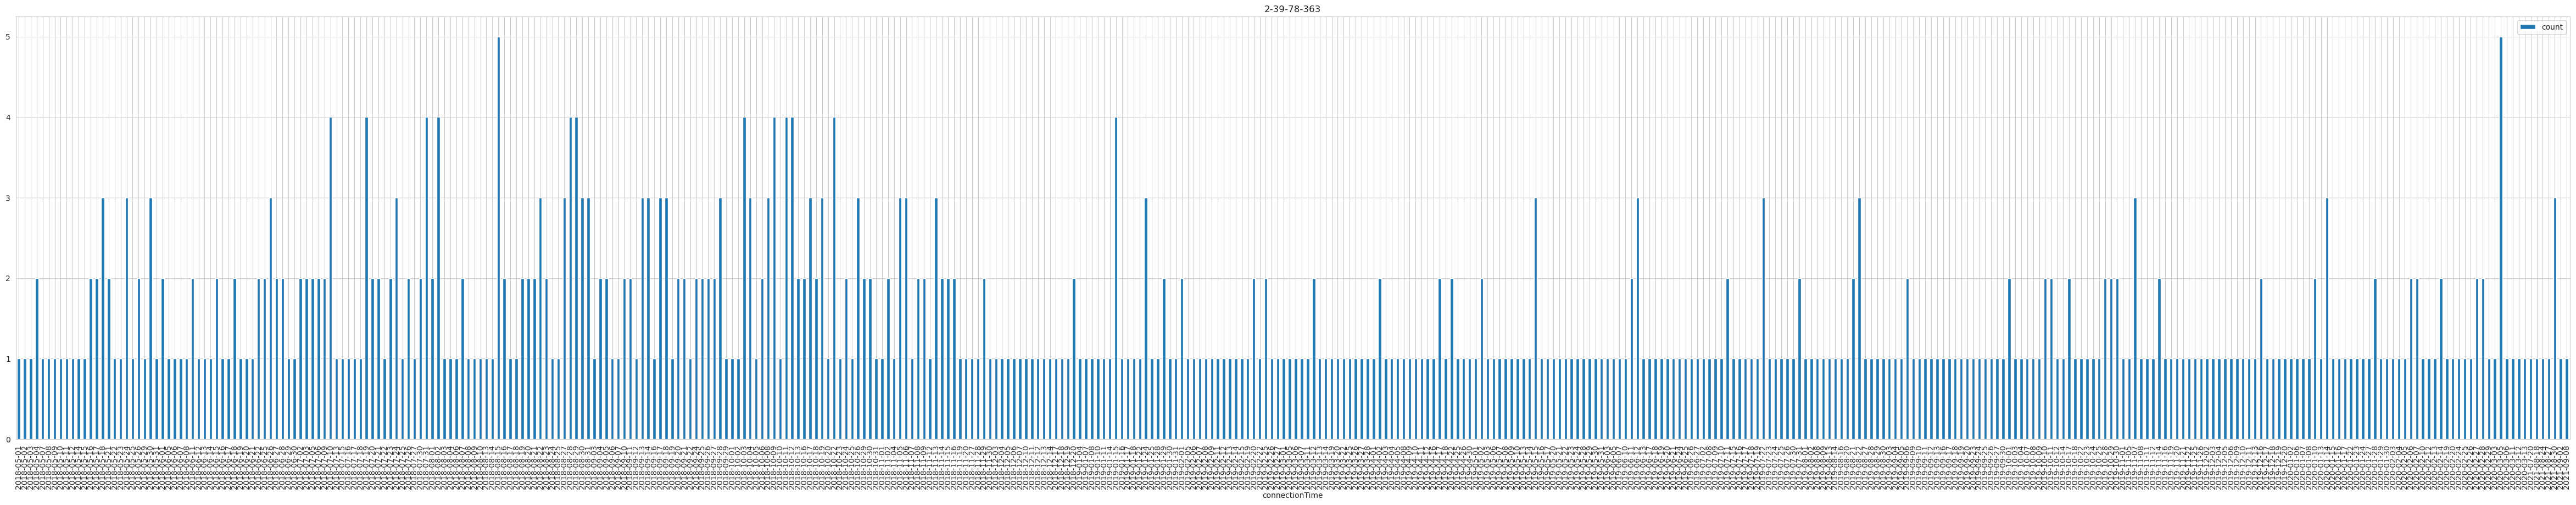

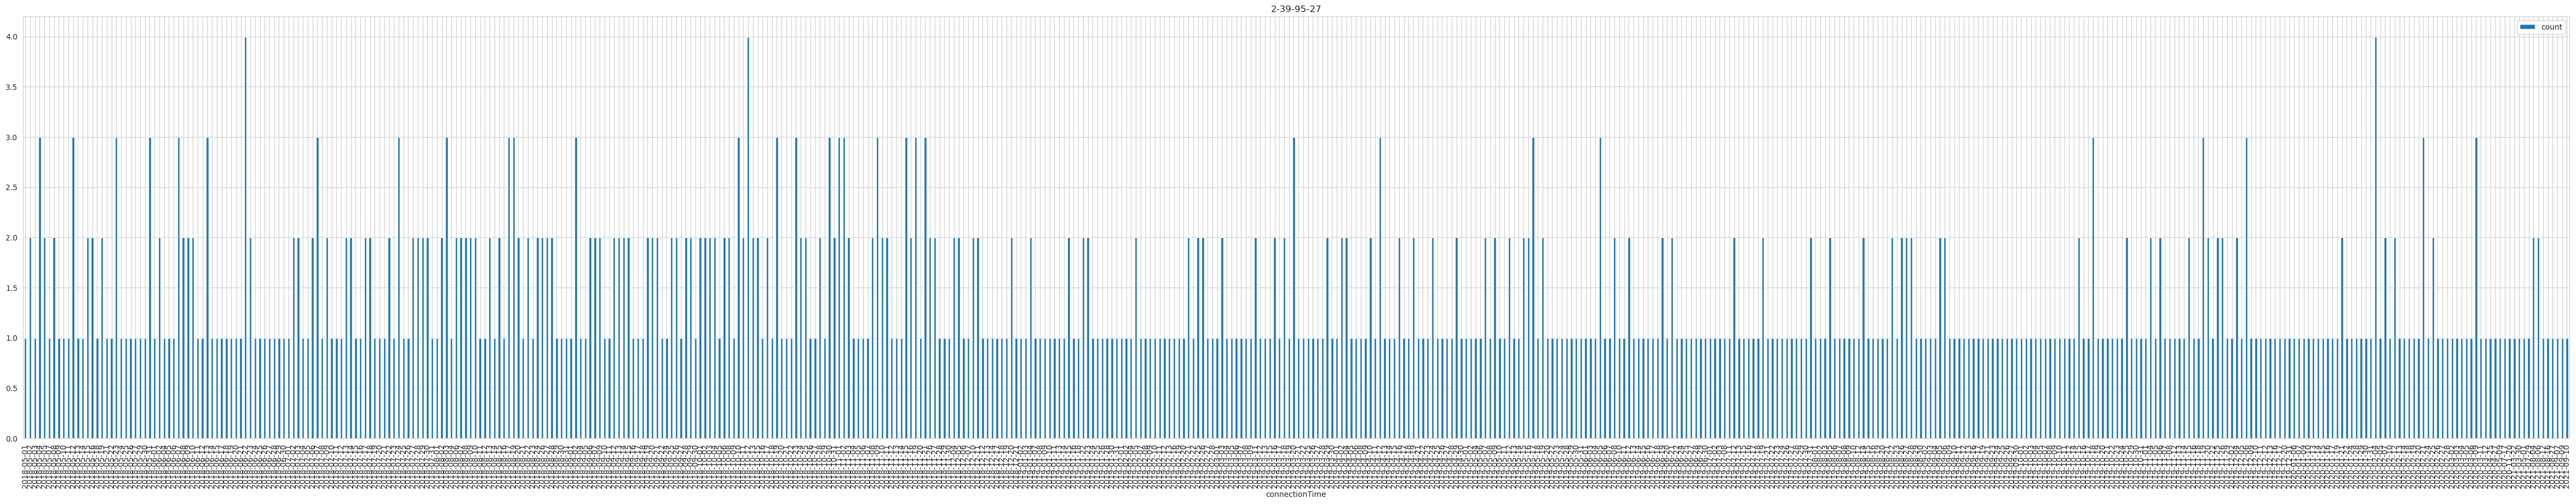

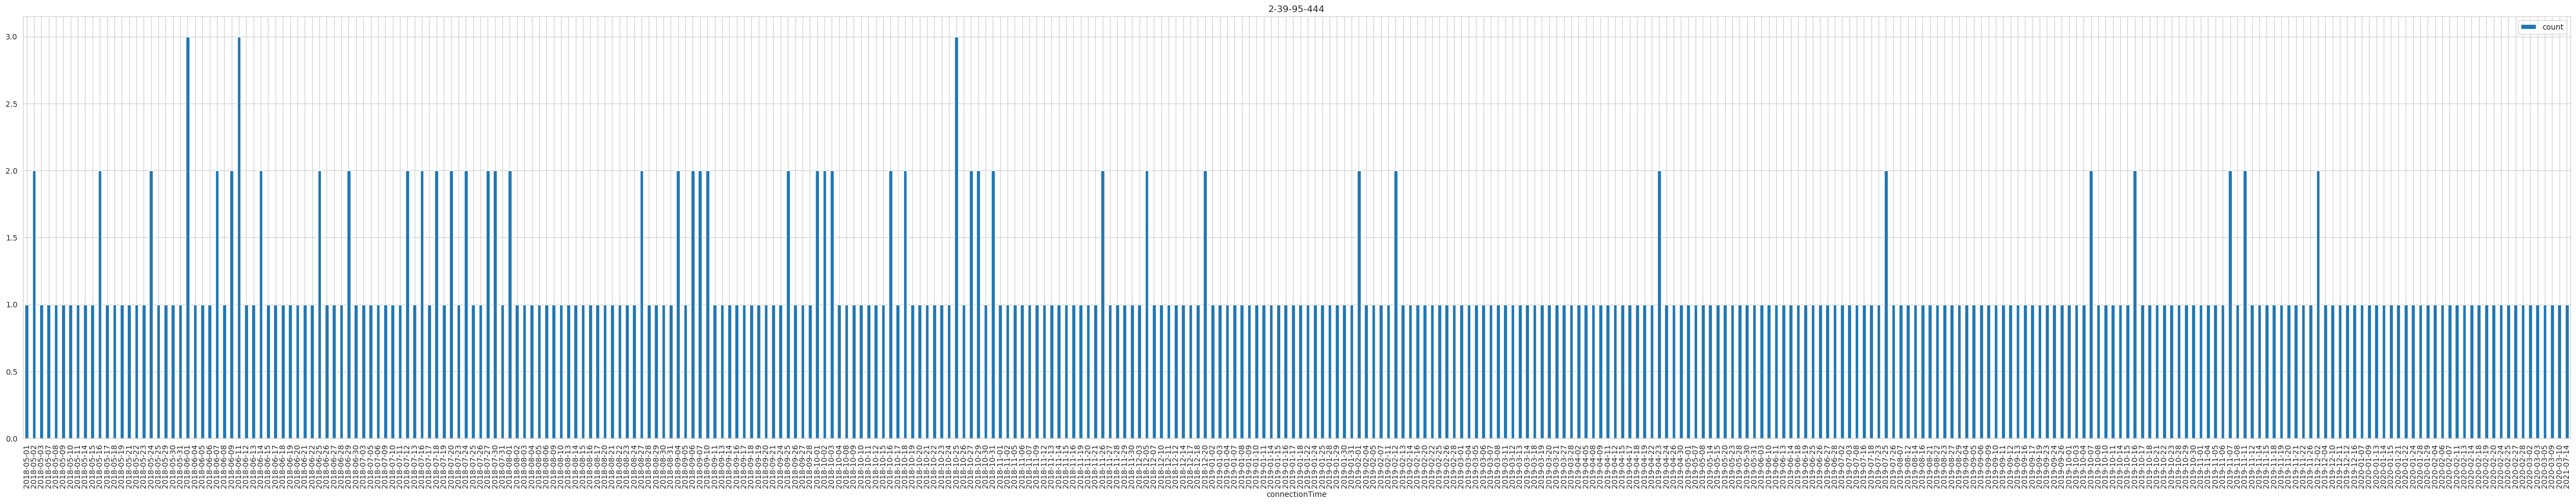

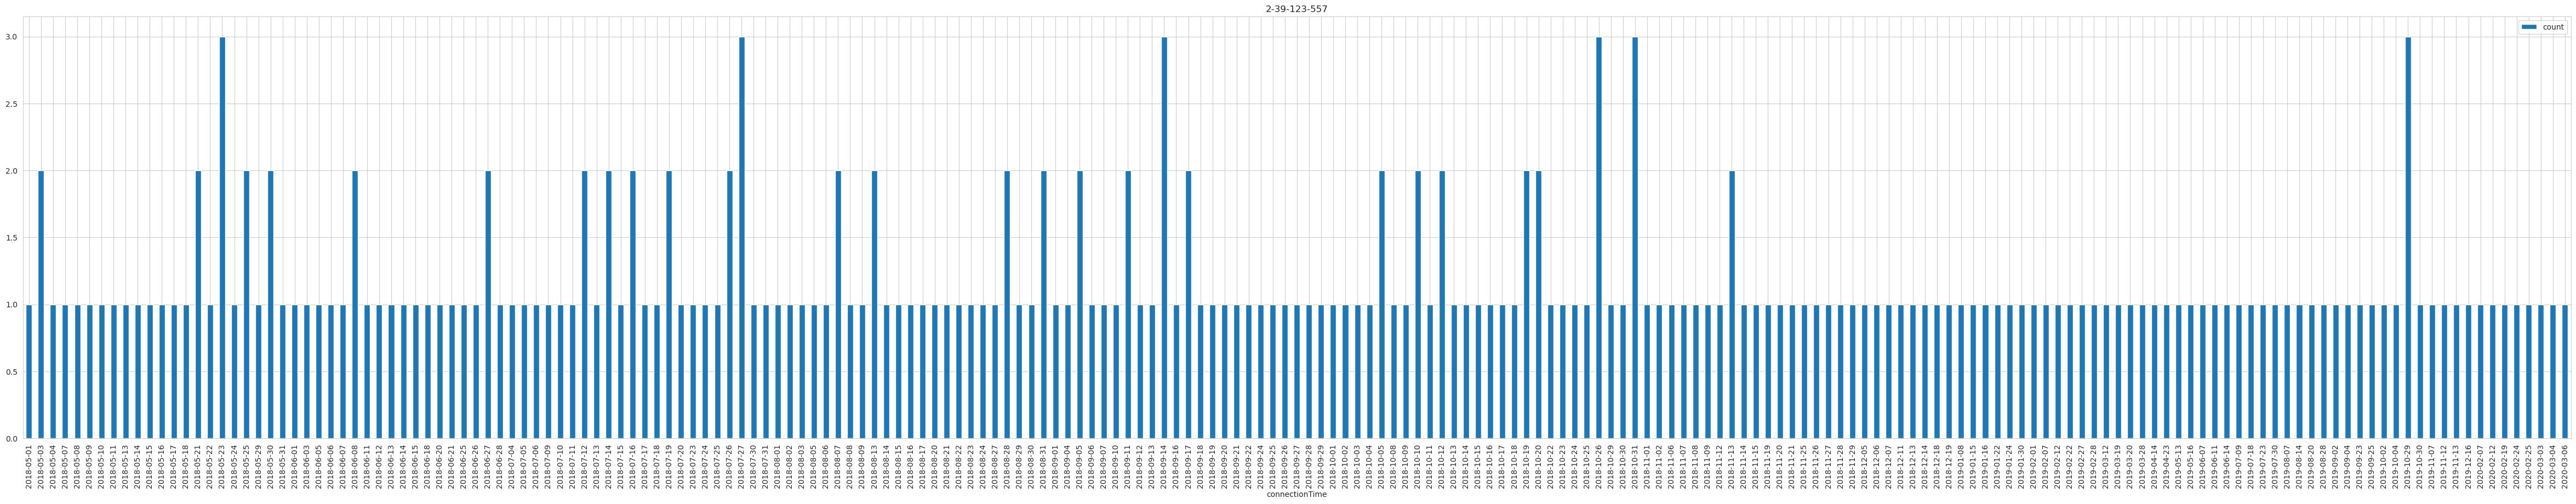

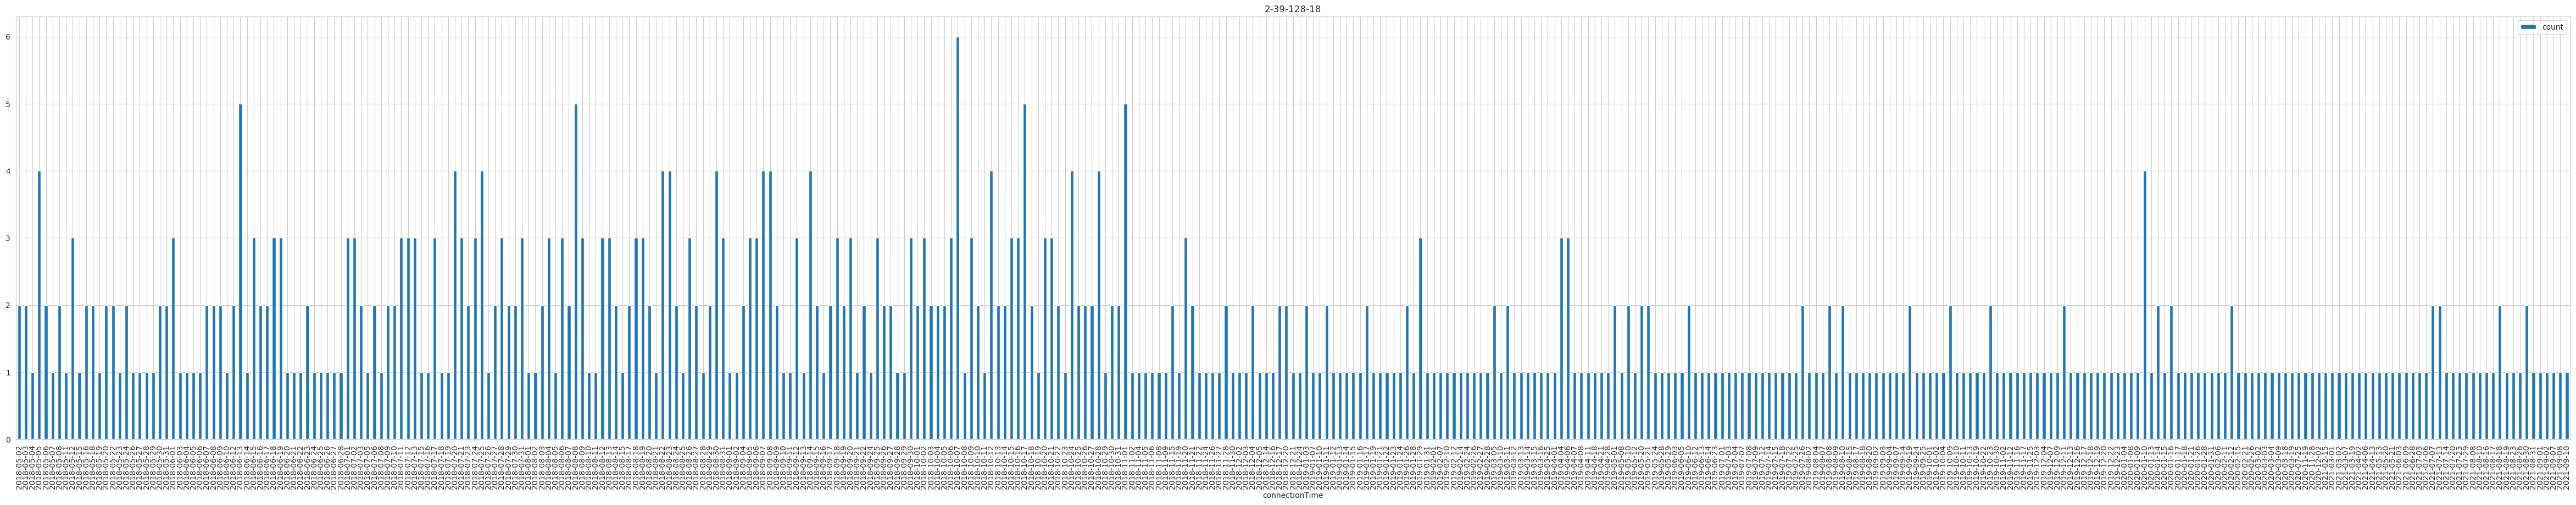

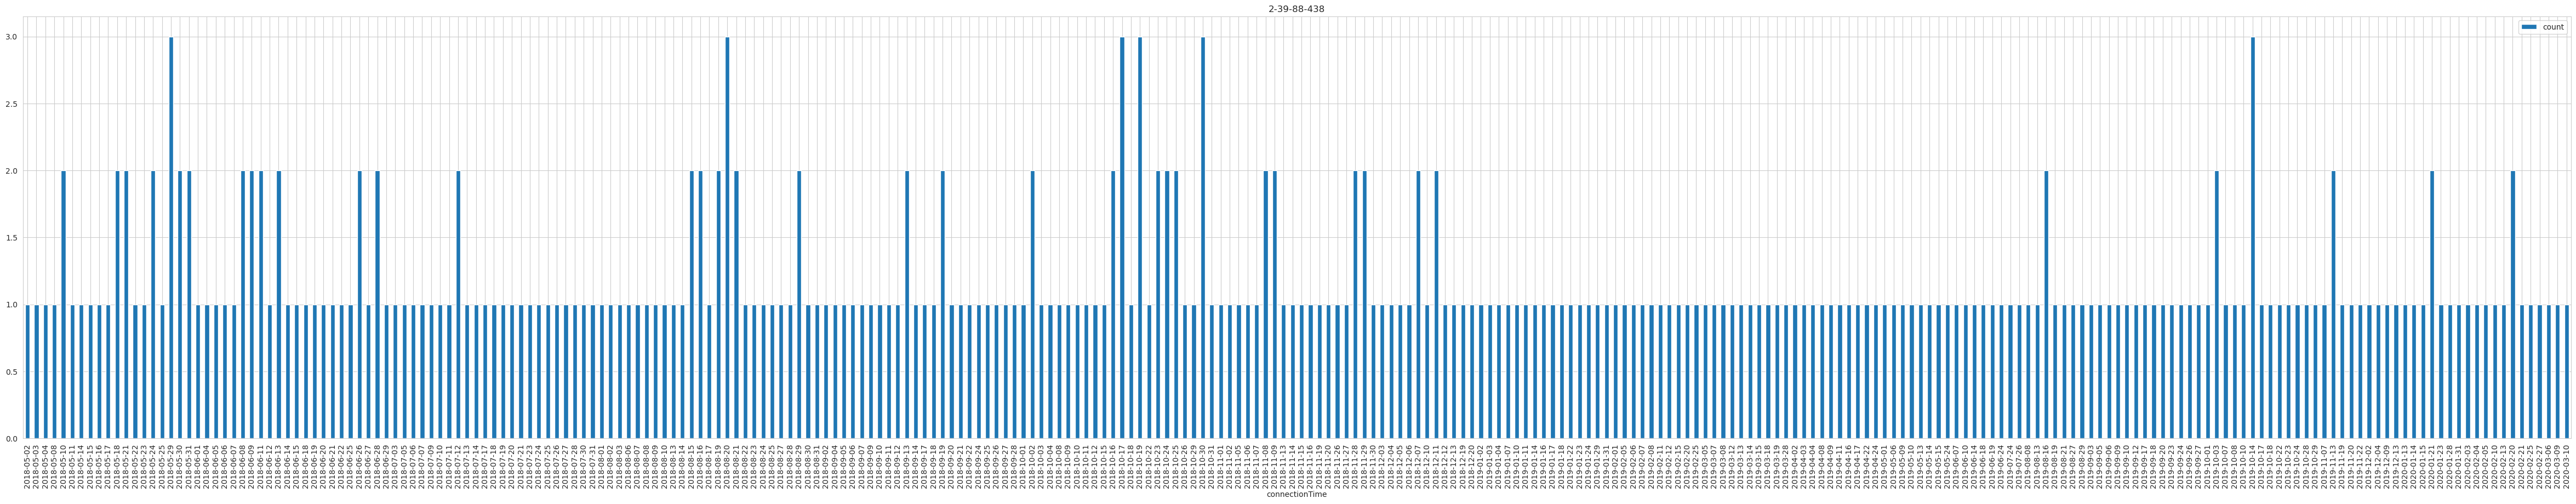

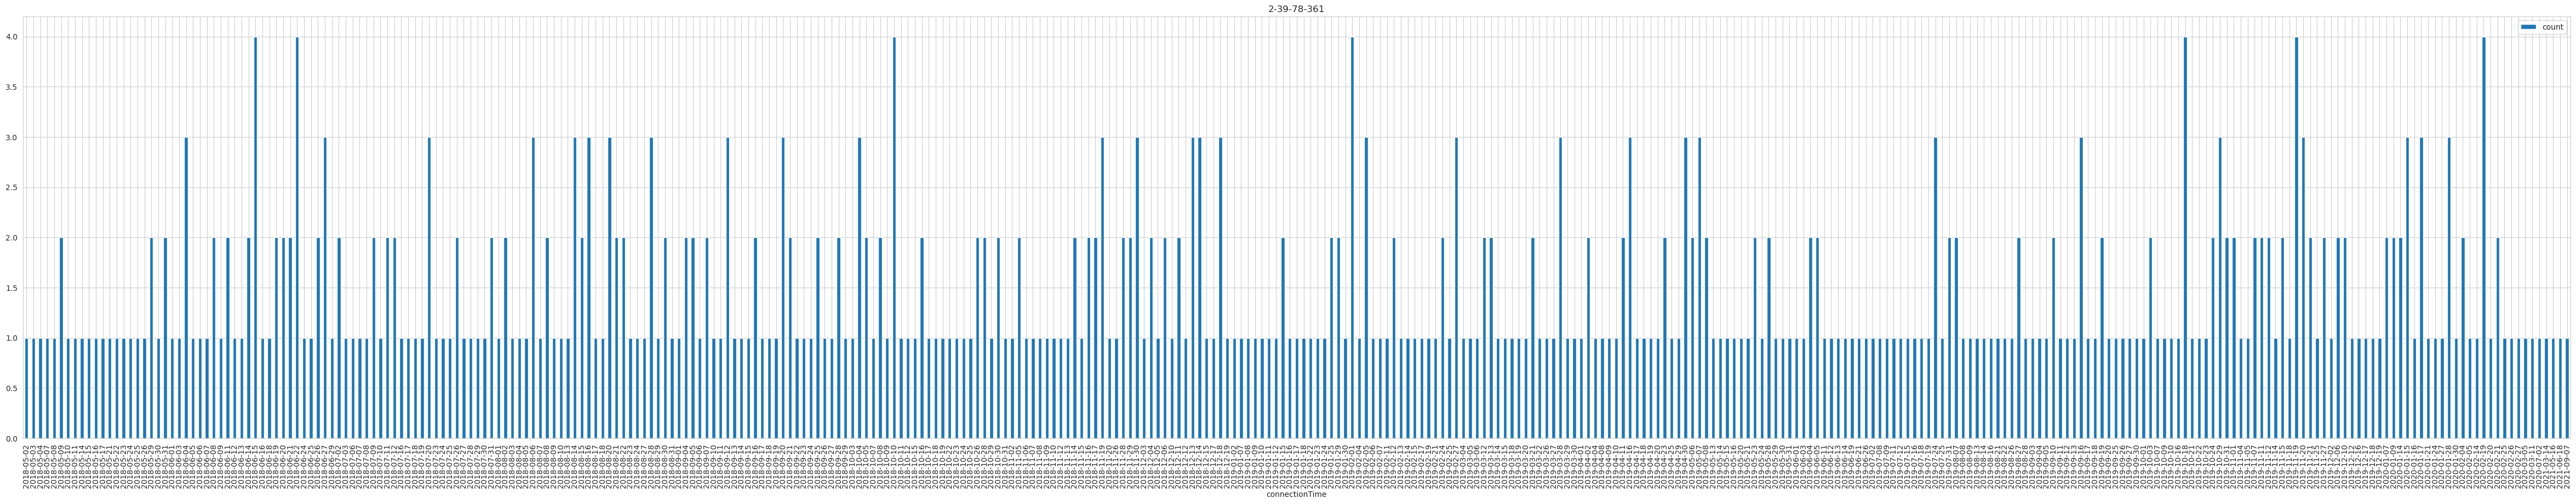

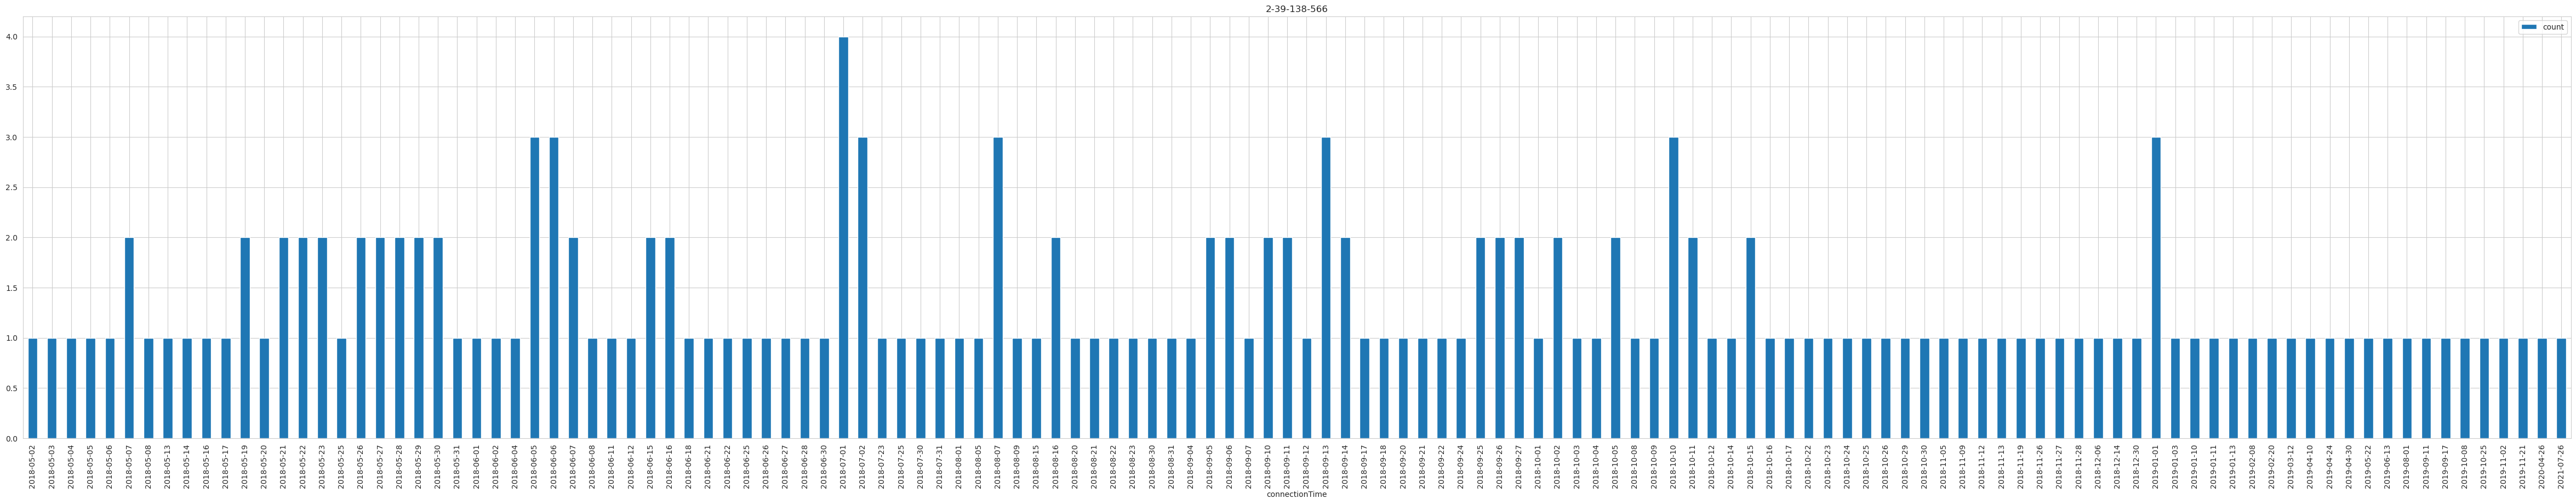

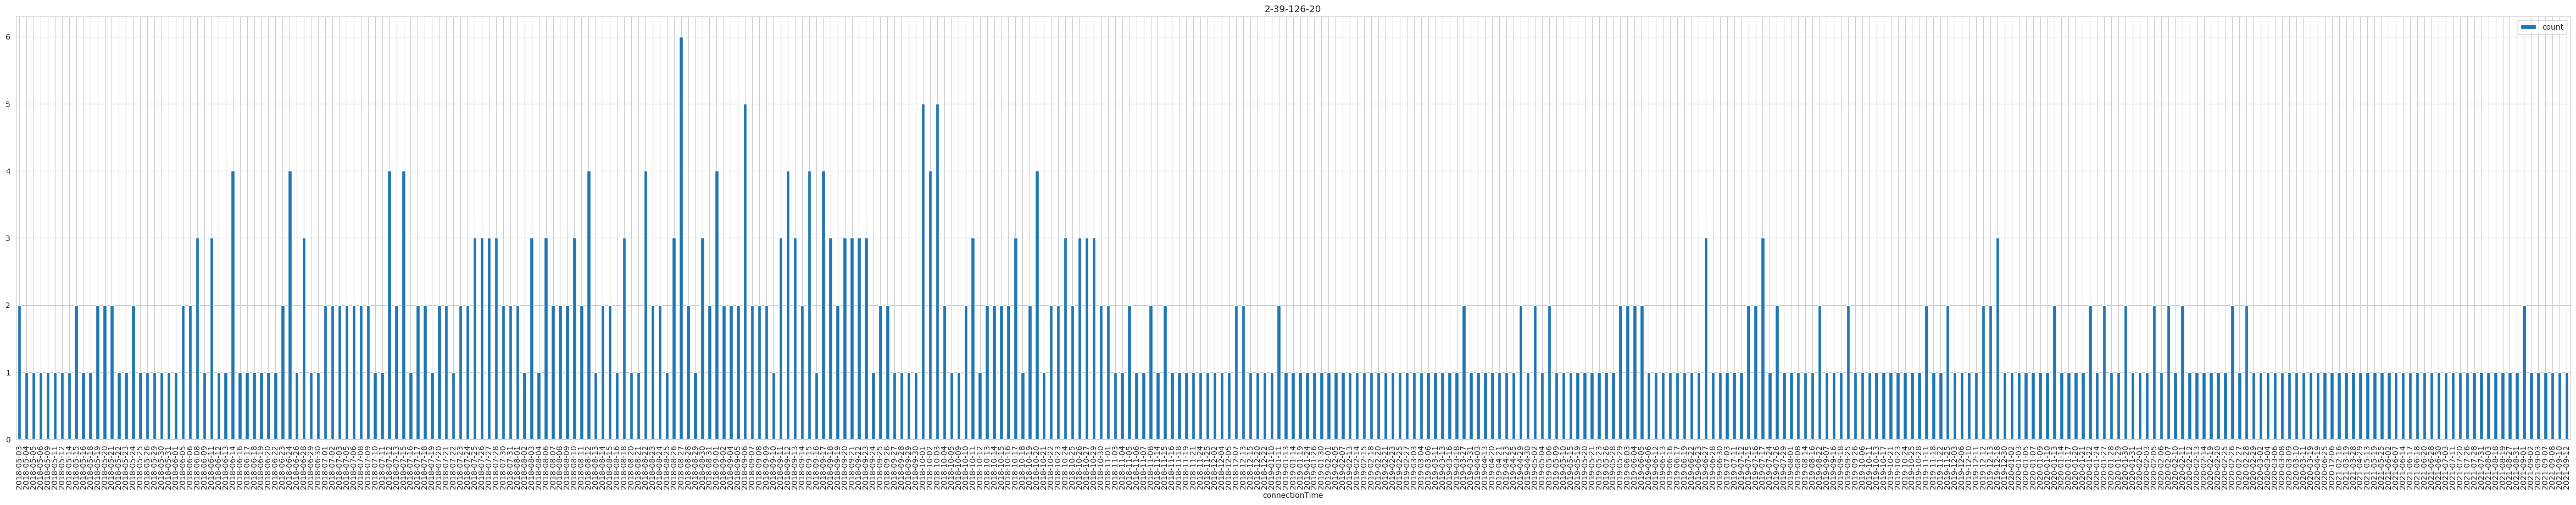

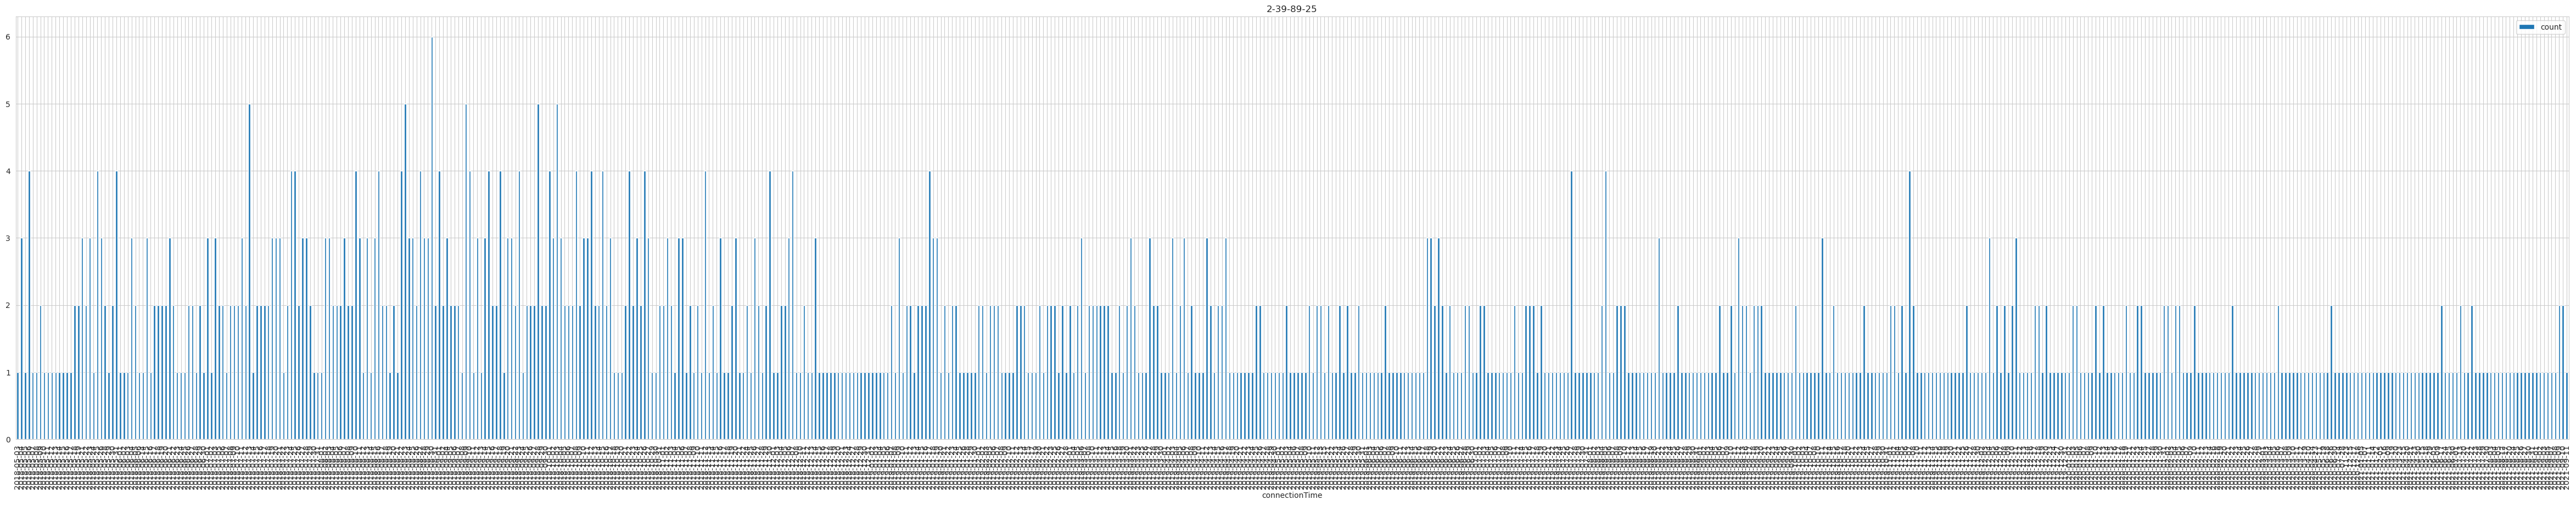

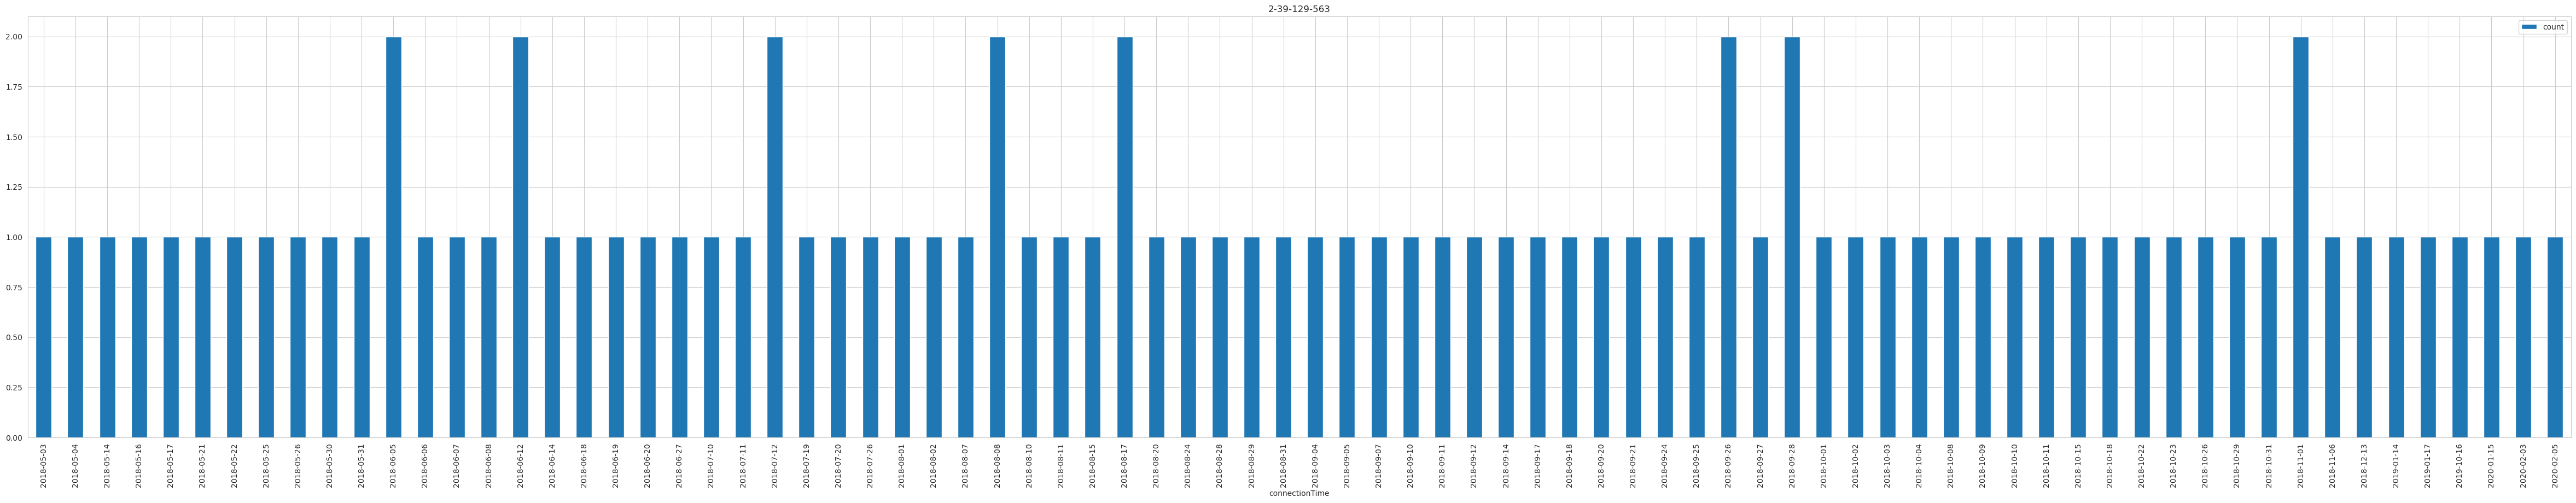

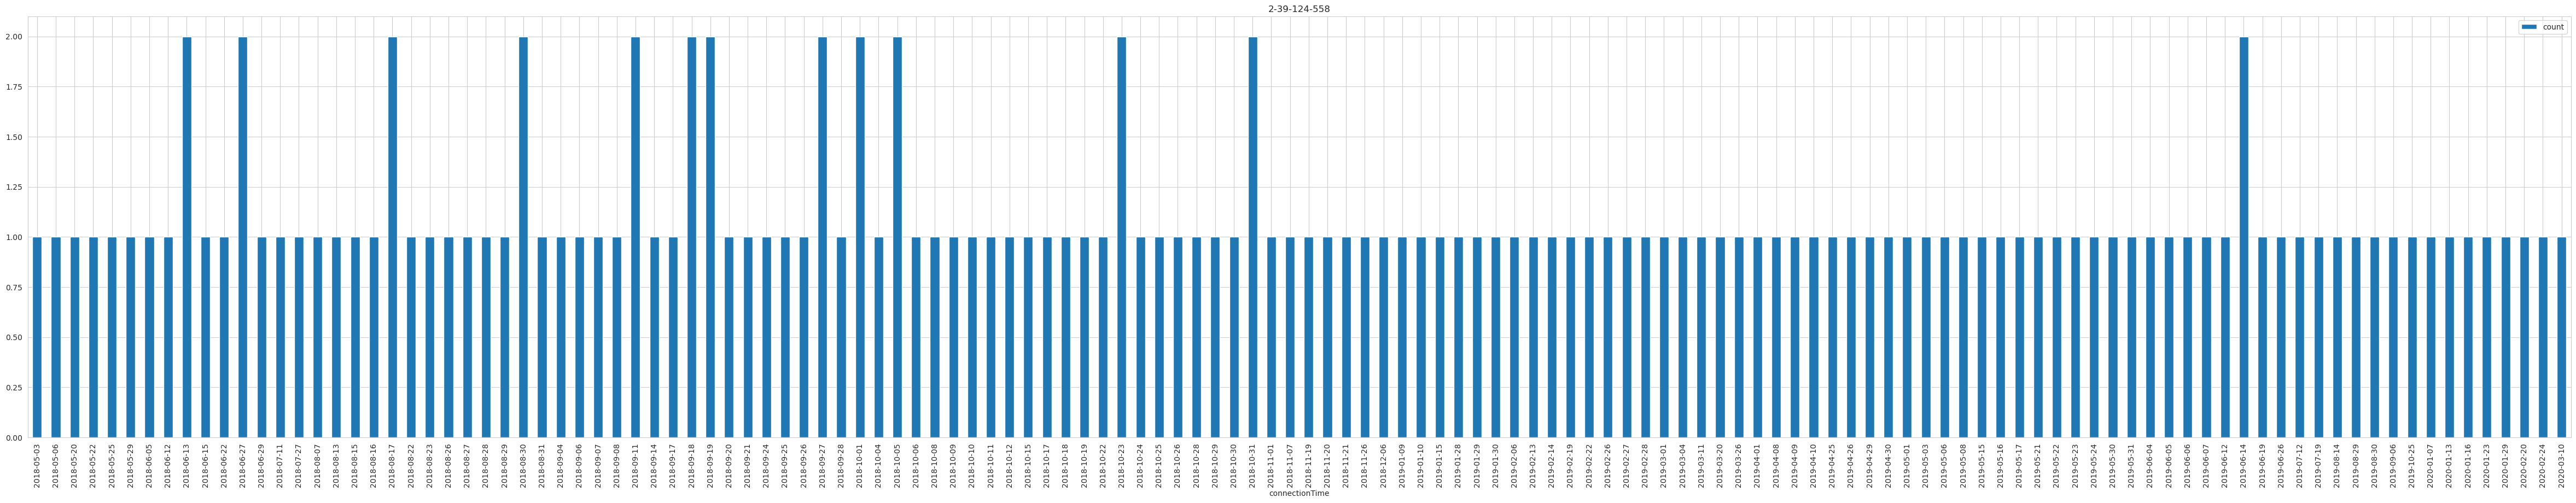

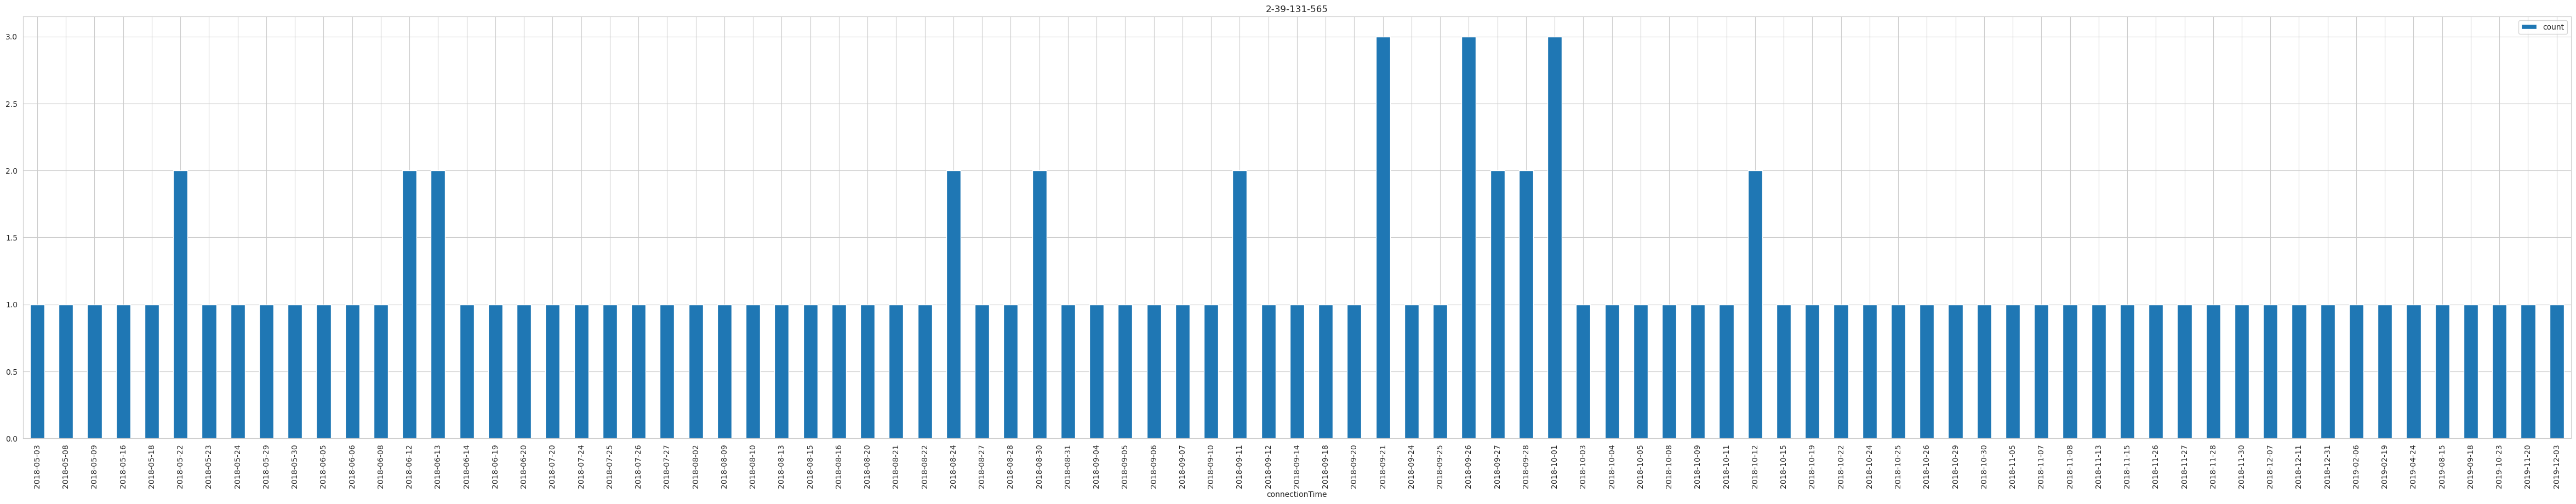

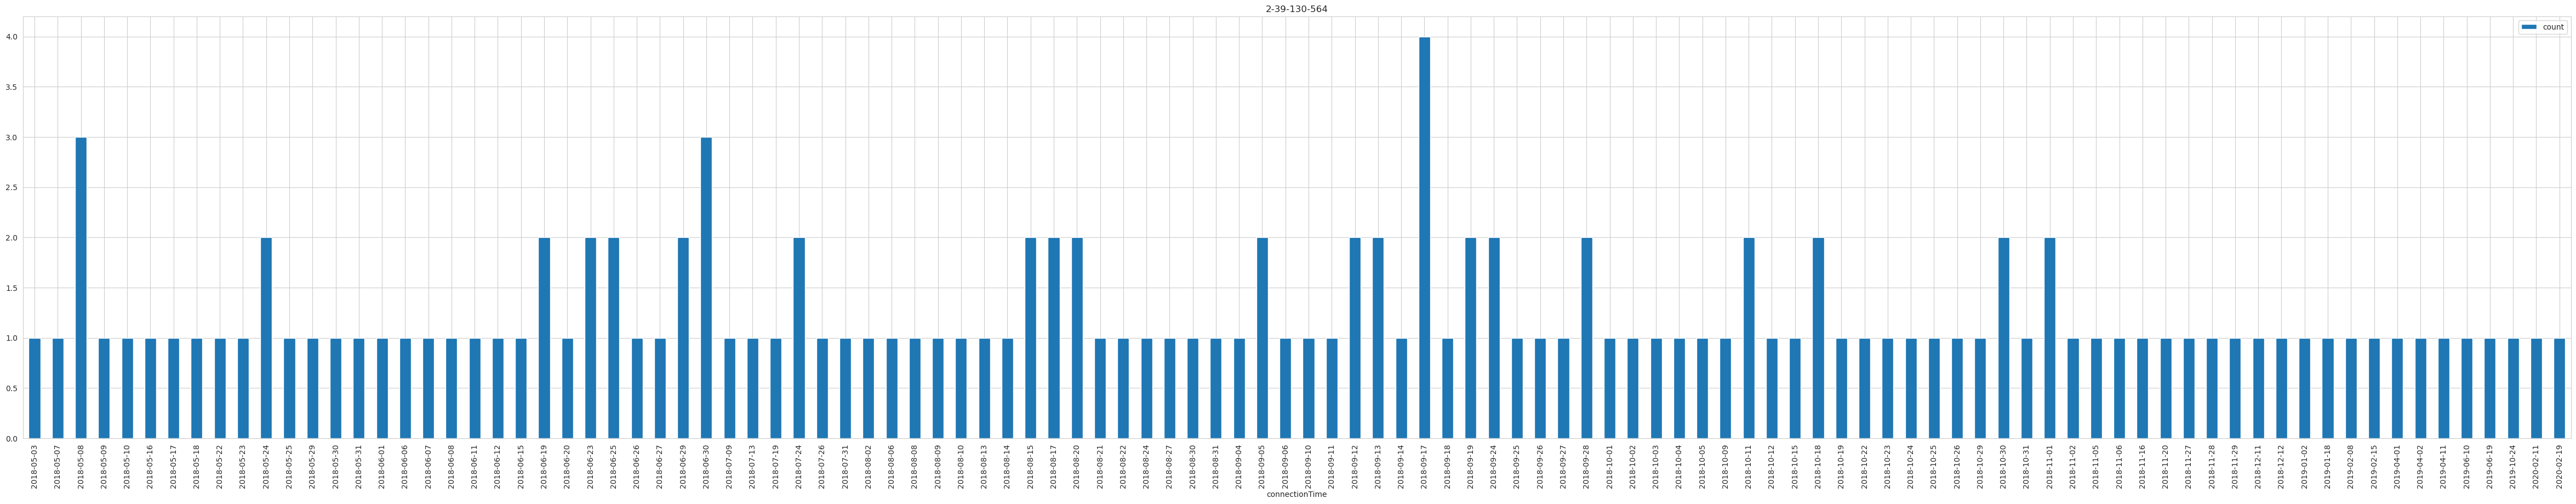

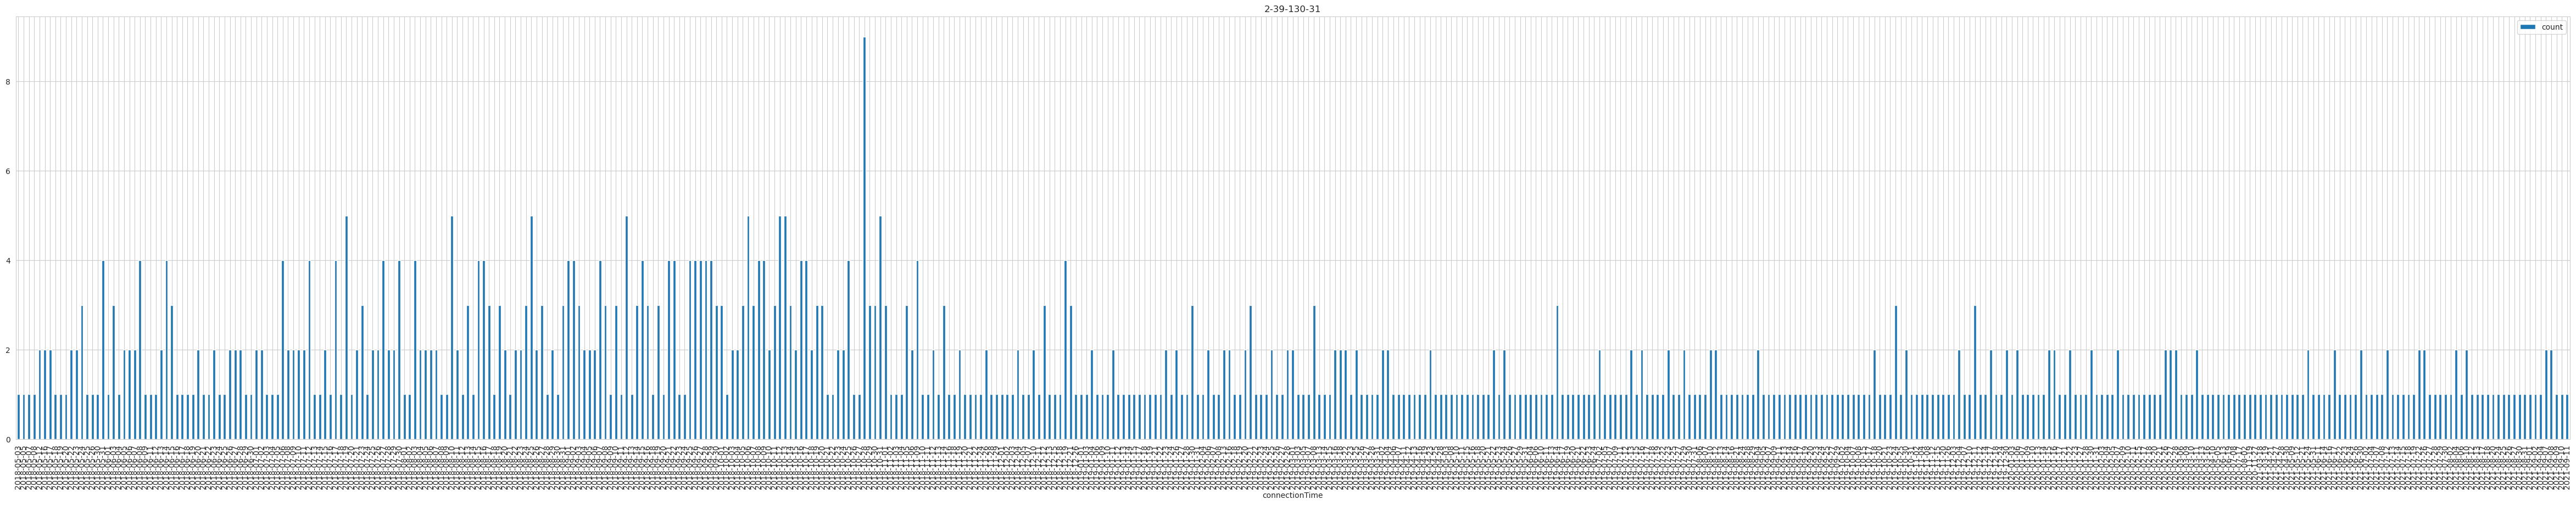

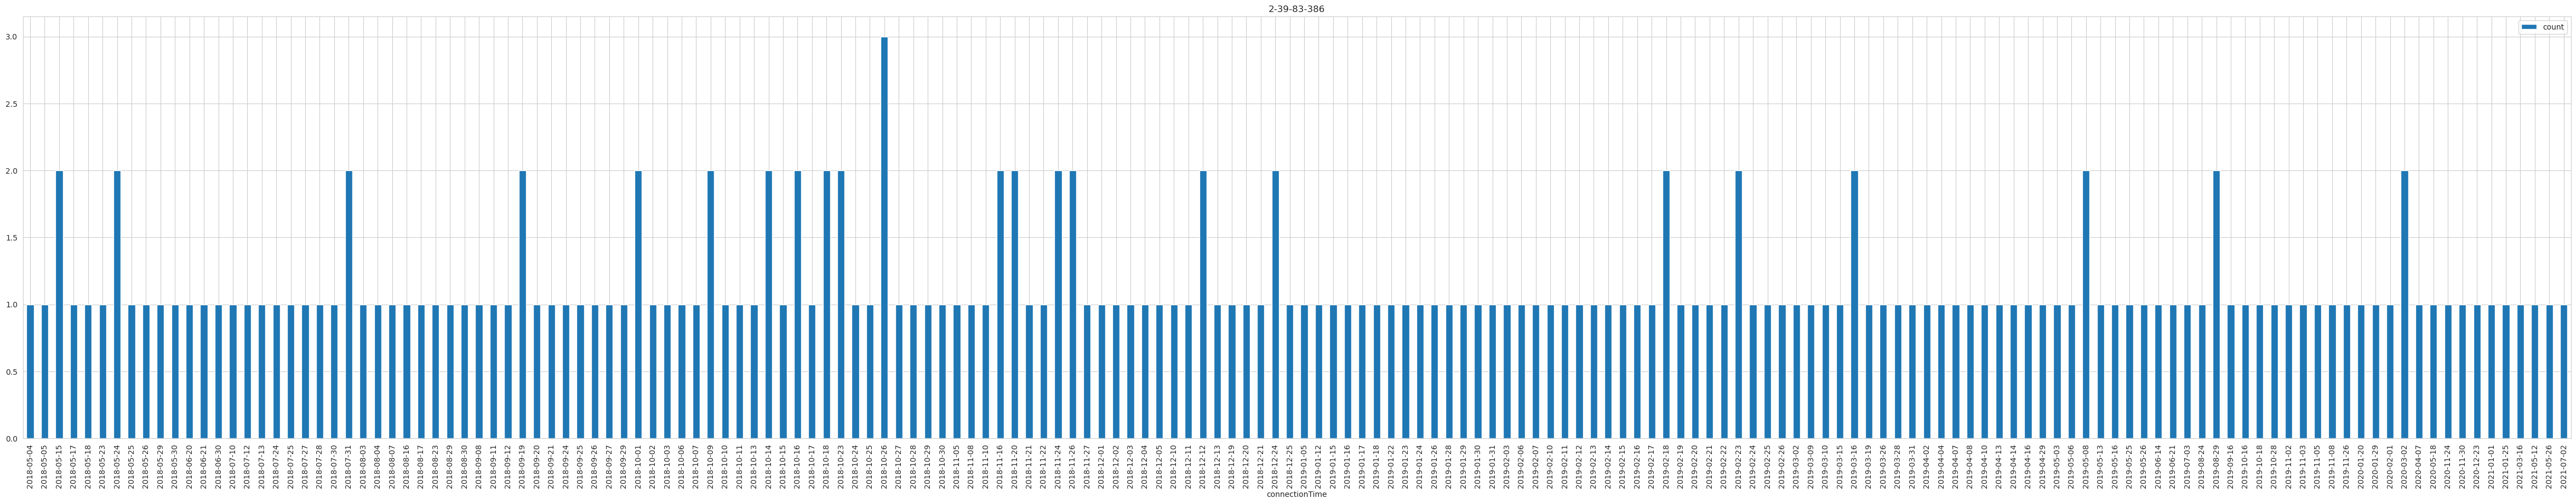

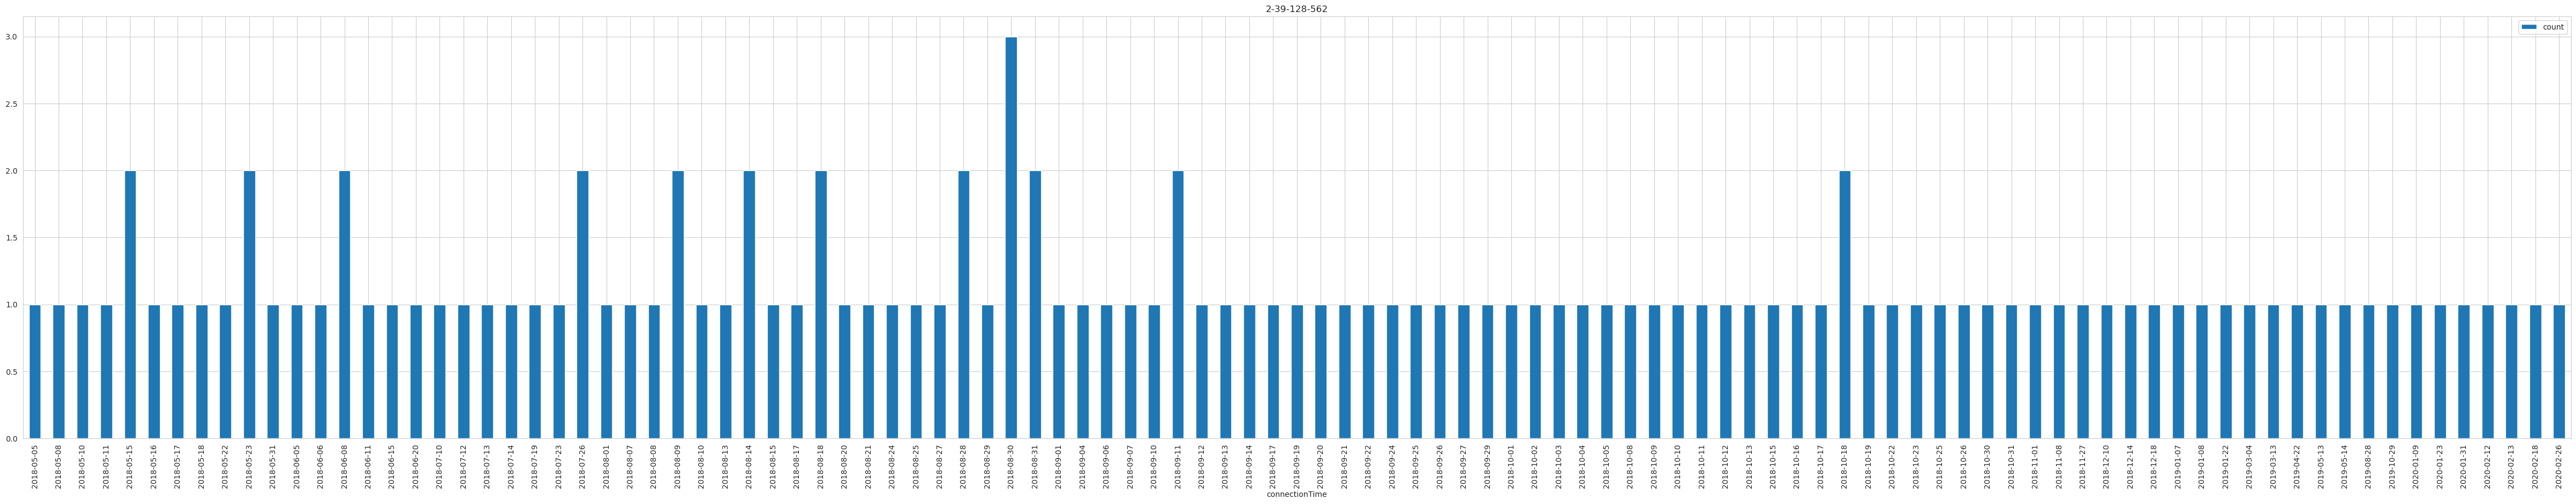

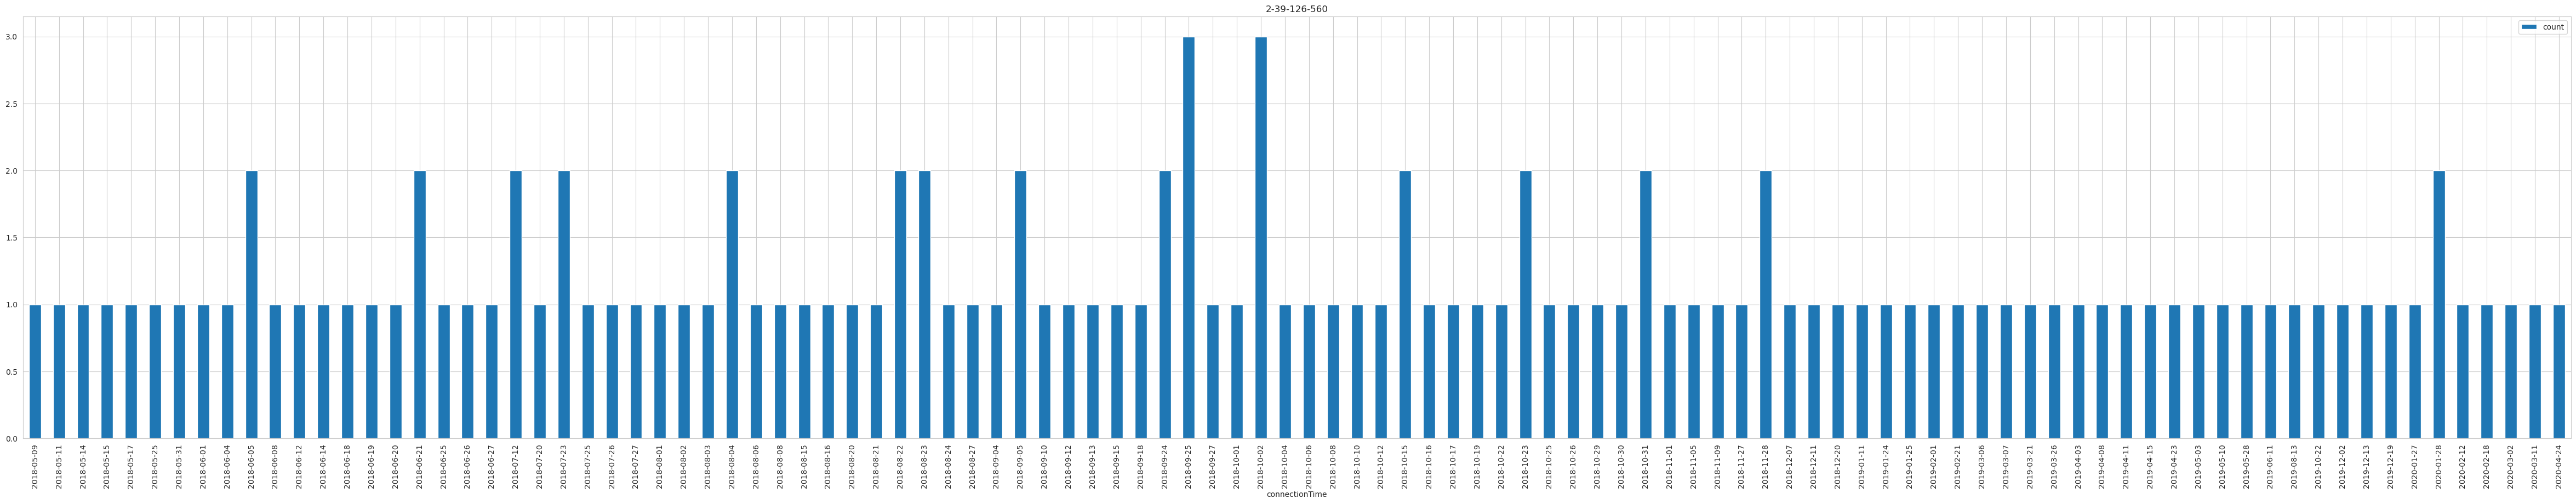

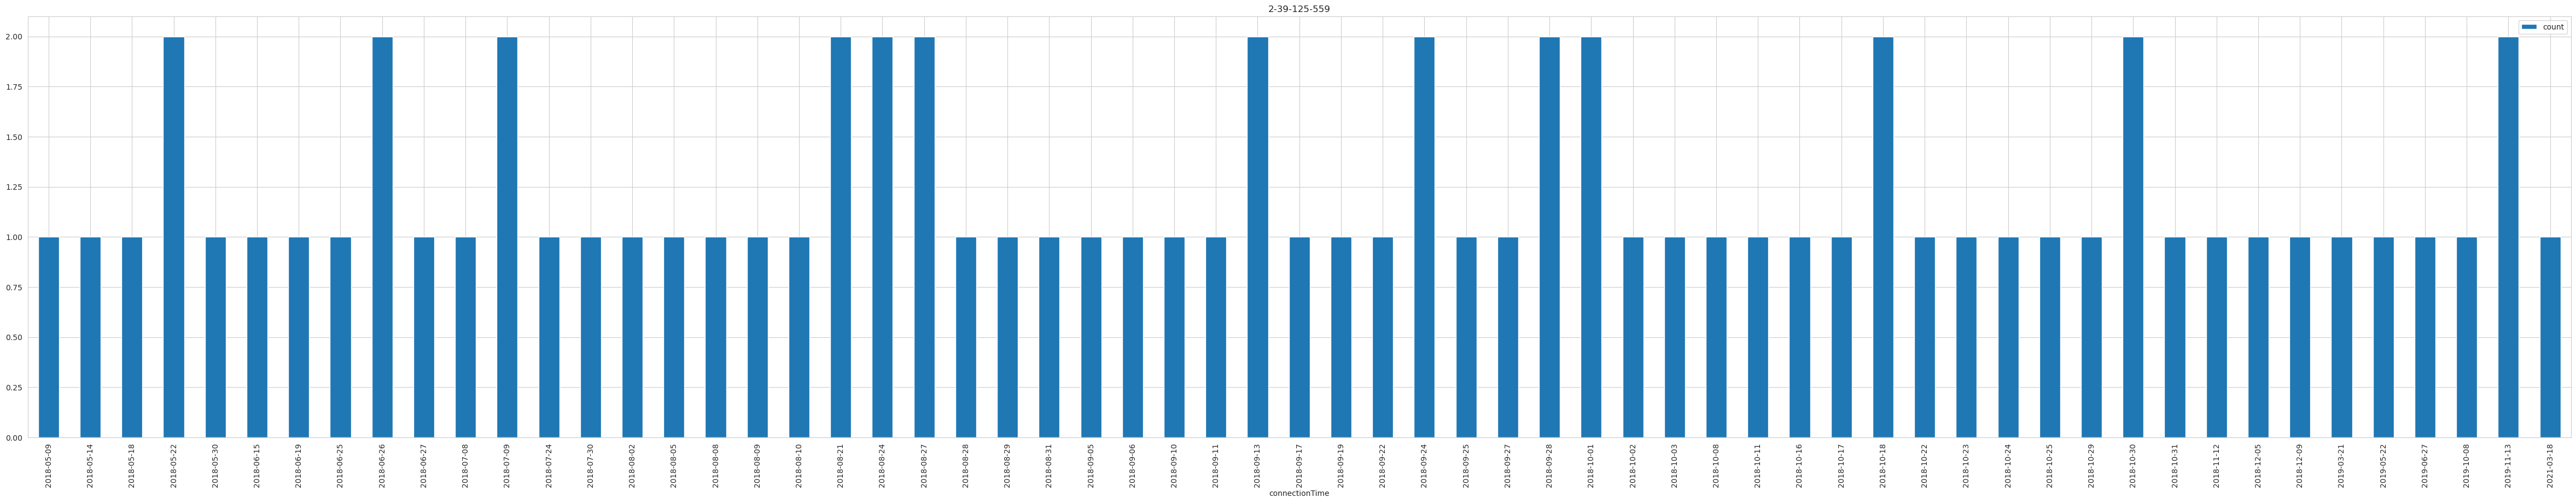

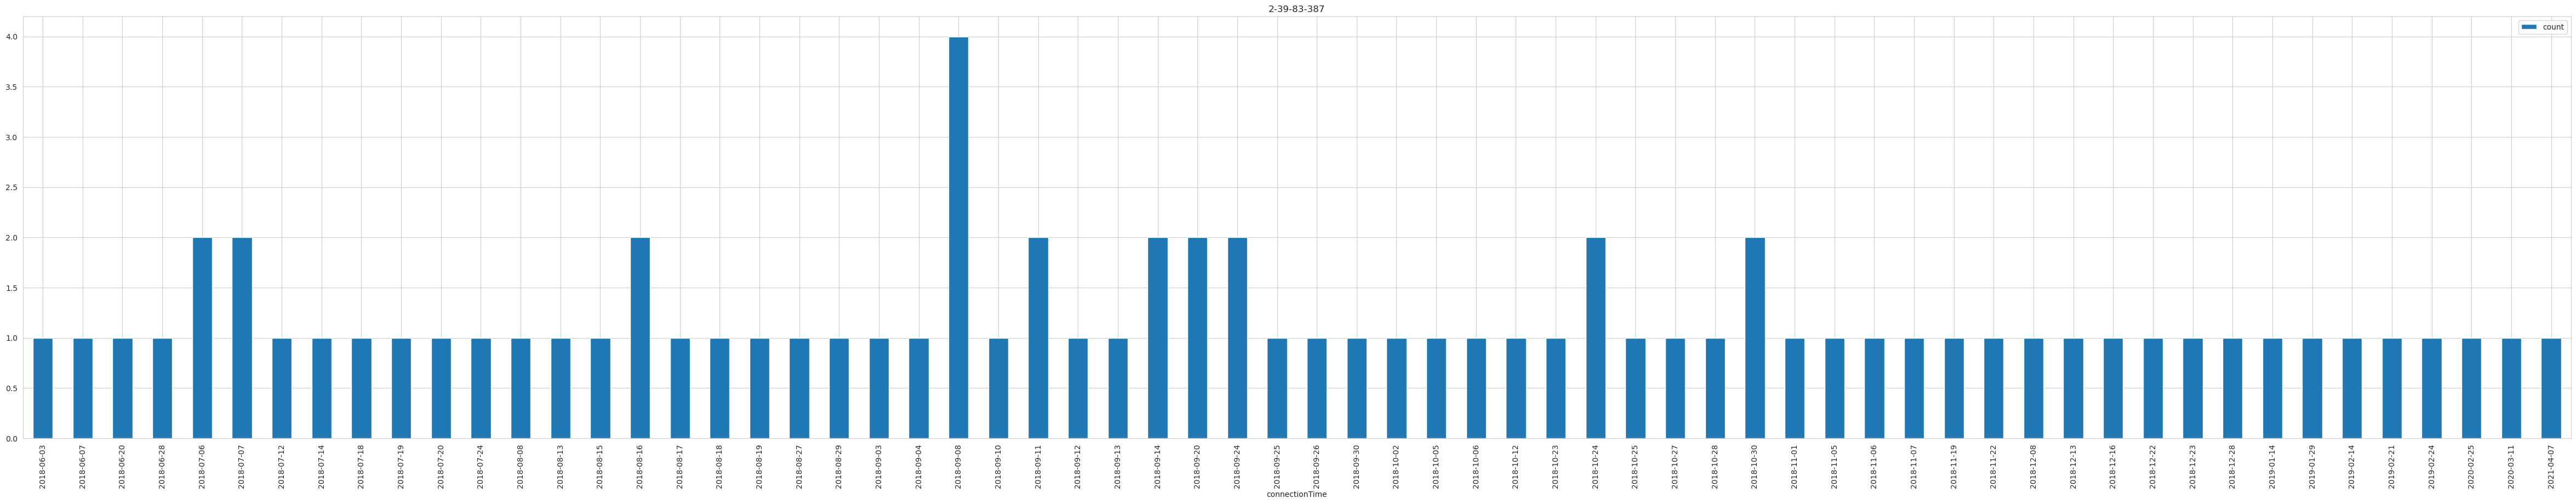

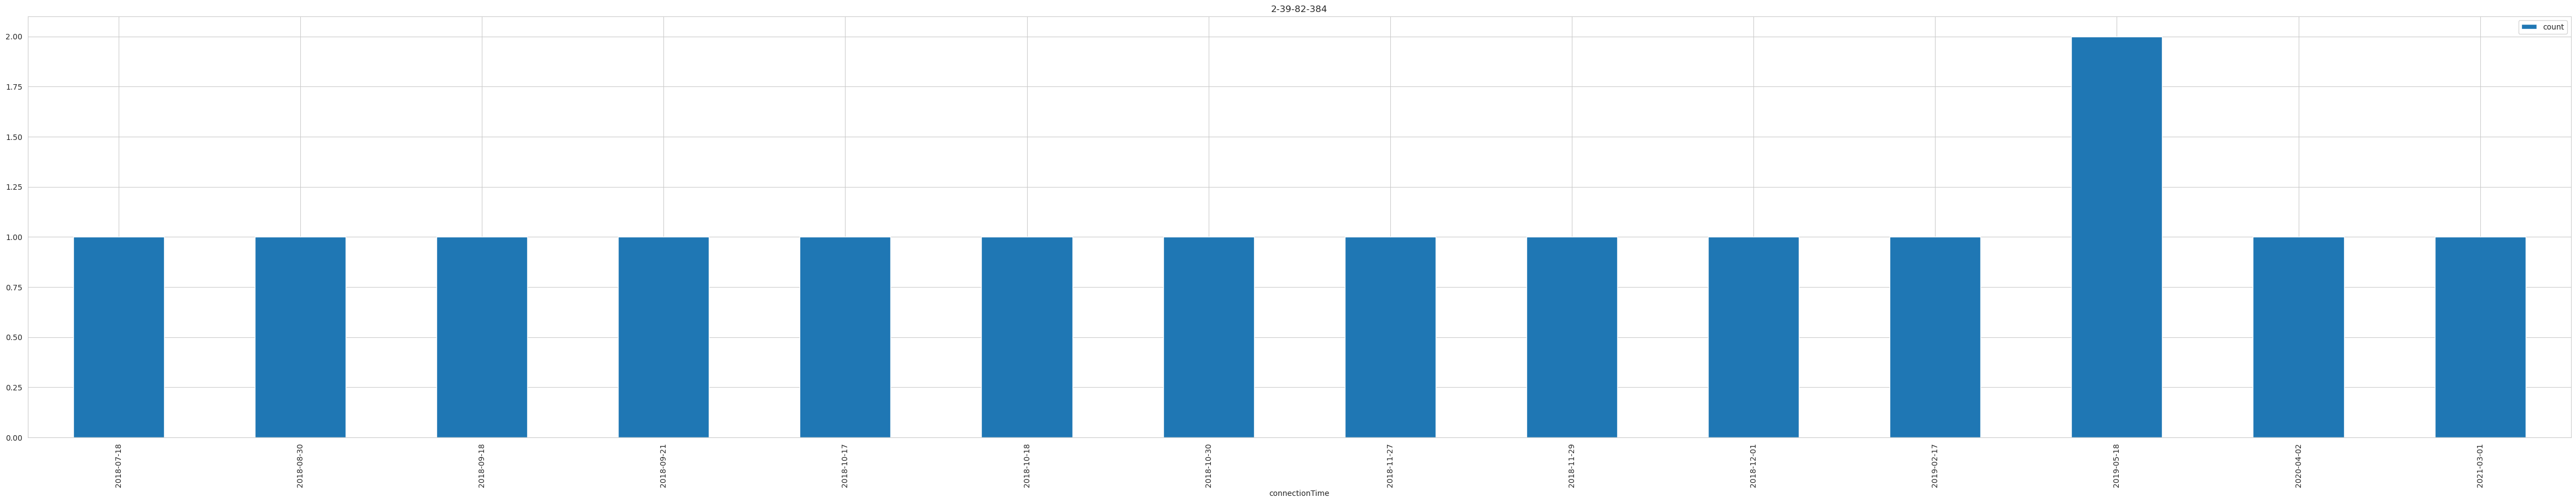

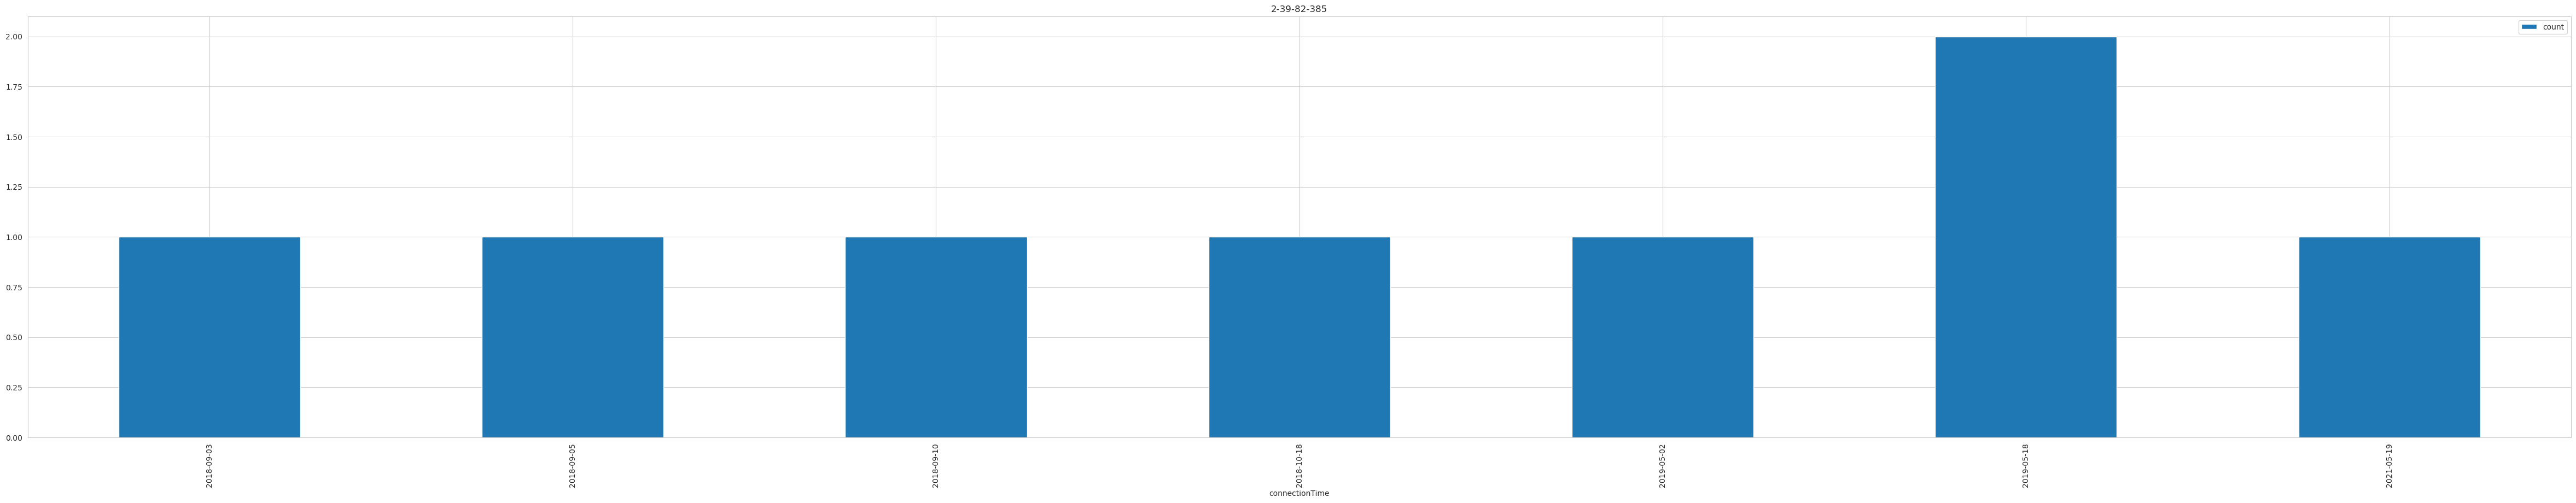

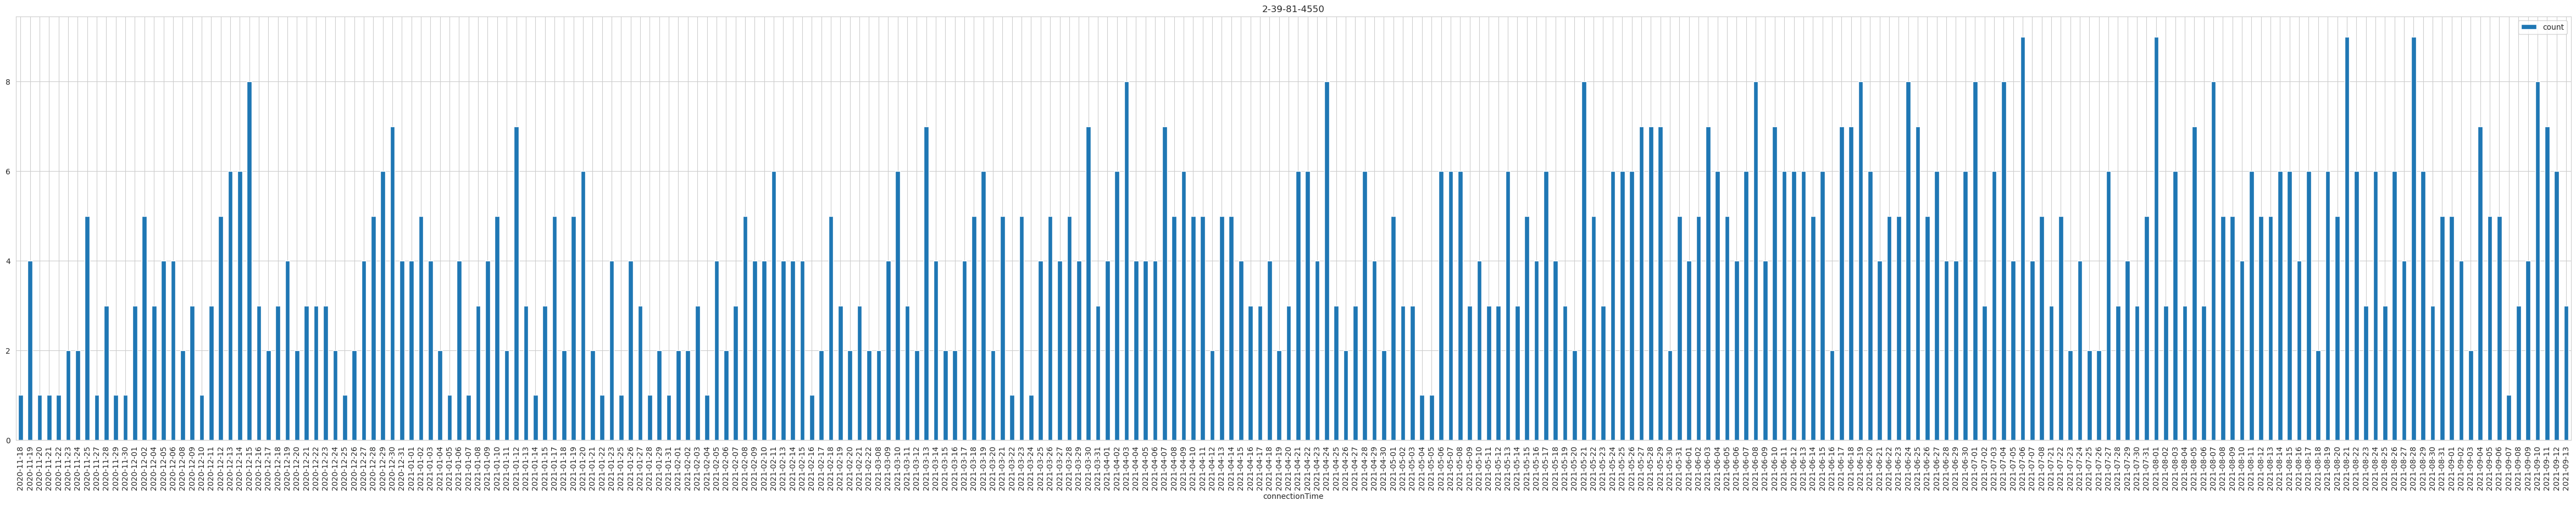

In [12]:
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"] = (60, 10)

for id in uses.stationID.unique():
    uses.loc[uses['stationID'] == id].plot.bar(x="connectionTime", y="count", title=id)
    

<Axes: >

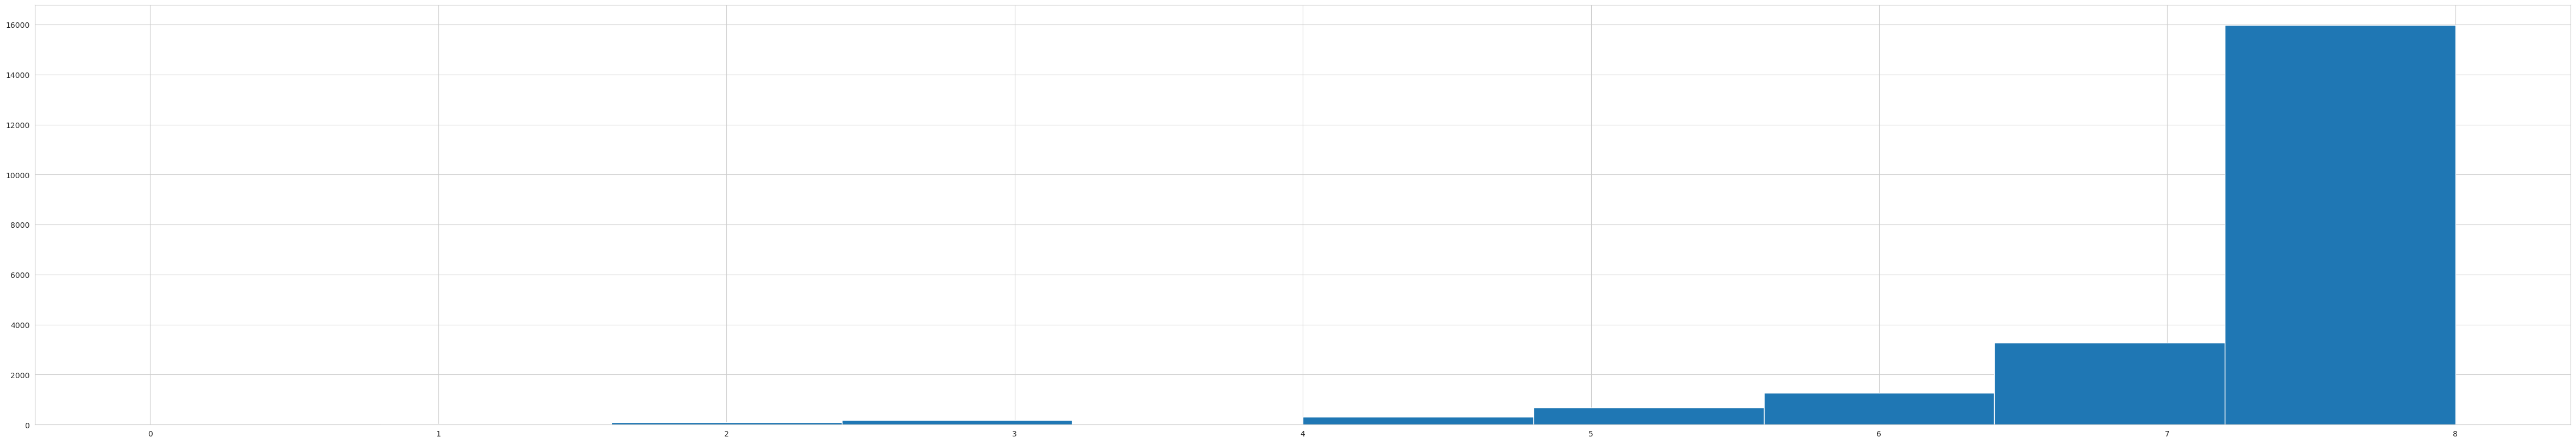

In [16]:
y.sum(axis=1).hist()

<Axes: >

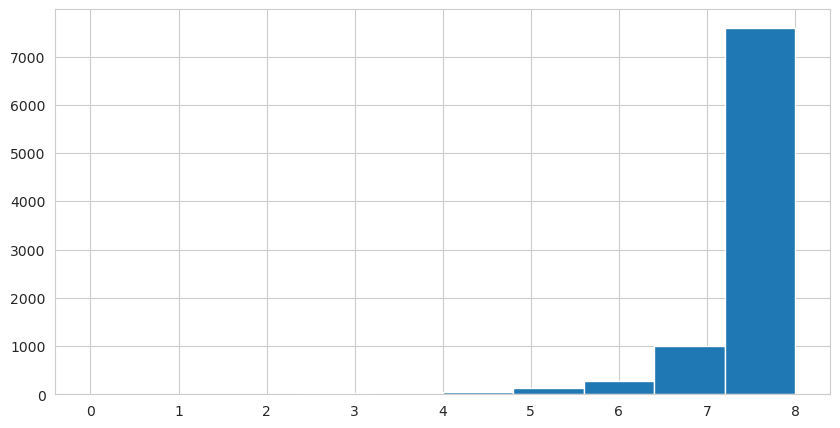

In [25]:
plt.rcParams["figure.figsize"] = (10, 5)
y[(y.index.hour >8) & (y.index.hour < 19)].sum(axis=1).hist()

In [45]:
df_ct['connectionTime'].min()
df_ct['connectionTime'].max()

Timestamp('2021-09-13 06:31:02+0000', tz='UTC')

In [90]:
tmp = df_ct.copy()
tmp.set_index('connectionTime', inplace=True)
start_date = '2018-05-01'; end_date = '2021-09-14'
tmp = tmp.sort_index().loc[start_date:end_date,:]

space_cols = tmp.spaceID.unique()
space_cols = (list(space_cols.astype('str')))

y = pd.DataFrame(index=pd.date_range(start_date,end_date, inclusive='both', freq='h', tz=0),columns=space_cols)
y[space_cols] = 1

print('there is a problem here. Some charging sessions have the EXACT same start time (see index 335)', tmp.iloc[335:337, 0:2])
print('the solution is to go through the dataframe by index number, using iloc, instead of by connection time using .loc')
disconnect_col = np.where(tmp.columns == 'disconnectTime')[0][0]
session_col = np.where(tmp.columns == 'sessionID')[0][0]
space_col = np.where(tmp.columns == 'spaceID')[0][0]

print(f'so we use the column number instead of the column name, hence why we disconnect is {disconnect_col}, session is {session_col}, and space is {space_col}')

for i in range(len(tmp)):
    start_ = tmp.index[i]
    end_ = tmp.iloc[i, disconnect_col] 
    session_ = tmp.iloc[i, session_col]
    space_ = tmp.iloc[i, space_col]
    # print(start_,'\t', end_,'\t', session_, '\t', space_)
    try:
        y.loc[start_:end_,space_] = 0
    except:
        print('bad value:')
        print(i, '\t', start_,'\t', end_,'\t', session_, '\t', space_)

there is a problem here. Some charging sessions have the EXACT same start time (see index 335)                                                 _id  \
connectionTime                                        
2018-05-07 20:47:49+00:00  5bc917d0f9af8b0dc677b8d1   
2018-05-07 20:47:49+00:00  5bc917d0f9af8b0dc677b8d2   

                                                        sessionID  
connectionTime                                                     
2018-05-07 20:47:49+00:00  2_39_89_439_2018-05-07 20:47:49.332393  
2018-05-07 20:47:49+00:00  2_39_125_21_2018-05-07 20:47:49.457562  
the solution is to go through the dataframe by index number, using iloc, instead of by connection time using .loc
so we use the column number instead of the column name, hence why we disconnect is 6, session is 1, and space is 3


In [91]:
tmp.iloc[335:337, :]

_id  \
connectionTime                                        
2018-05-07 20:47:49+00:00  5bc917d0f9af8b0dc677b8d1   
2018-05-07 20:47:49+00:00  5bc917d0f9af8b0dc677b8d2   

                                                        sessionID  \
connectionTime                                                      
2018-05-07 20:47:49+00:00  2_39_89_439_2018-05-07 20:47:49.332393   
2018-05-07 20:47:49+00:00  2_39_125_21_2018-05-07 20:47:49.457562   

                             stationID spaceID  siteID  clusterID  \
connectionTime                                                      
2018-05-07 20:47:49+00:00  2-39-89-439  CA-501       2         39   
2018-05-07 20:47:49+00:00  2-39-125-21  CA-311       2         39   

                                     disconnectTime  kWhDelivered  \
connectionTime                                                      
2018-05-07 20:47:49+00:00 2018-05-08 01:32:46+00:00         3.870   
2018-05-07 20:47:49+00:00 2018-05-07 23:52:21+00:00         7.642   

                                   doneChargingTime userID  ...  \
connectionTime                                              ...   
2018-05-07 20:47:49+00:00 2018-05-07 20:47:49+00:00   None  ...   
2018-05-07 20:47:49+00:00 2018-05-07 22:24:56+00:00   None  ...   

                           paymentRequired  requestedDeparture  kWhRequested  \
connectionTime                                                                 
2018-05-07 20:47:49+00:00             None                None           NaN   
2018-05-07 20:47:49+00:00             None                None           NaN   

                           connectionTimeHour connectionTimeDay  \
connectionTime                                                    
2018-05-07 20:47:49+00:00                  20                 7   
2018-05-07 20:47:49+00:00                  20                 7   

                          disconnectTimeHour disconnectTimeDay  \
connectionTime                                                   
2018-05-07 20:47:49+00:00                  1                 8   
2018-05-07 20:47:49+00:00                 23                 7   

                           doneChargingTimeHour  doneChargingTimeDay  \
connectionTime                                                         
2018-05-07 20:47:49+00:00                  20.0                  7.0   
2018-05-07 20:47:49+00:00                  22.0                  7.0   

                           is_holiday  
connectionTime                         
2018-05-07 20:47:49+00:00       False  
2018-05-07 20:47:49+00:00       False  

[2 rows x 25 columns]

In [83]:
y_s = y.sum(axis=1).rename('available_spots')

Text(0.5, 0, 'hour')

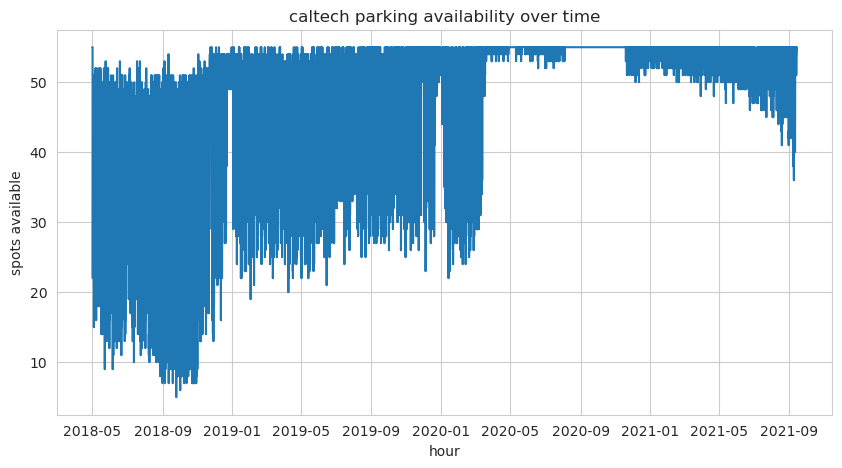

In [92]:
plt.plot(y_s.index, y_s.values)
plt.title('caltech parking availability over time')
plt.ylabel('spots available')
plt.xlabel('hour')

<Axes: >

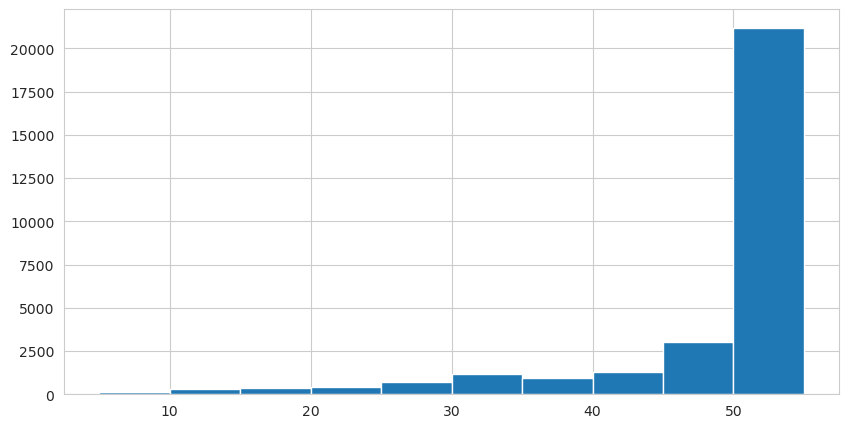

In [96]:
y_s.hist()